In [ ]:
# ##### Deep Project
# from torch.cuda.amp import autocast, GradScaler

# # Initialize lists to store losses
# train_losses = []
# validation_losses = []

# model.to(device)
# scaler = GradScaler()

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     all_preds = []
#     all_masks = []

#     for images, masks in tqdm(trainDataLoader):
#         images, masks = images.to(device), masks.to(device)

#         # Forward pass
#         with autocast():
#             outputs = model(images)
            
#             # Calculate Dice loss
#             loss = criterion(outputs, masks)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

#         running_loss += loss.item()

#         # Convert predictions and masks to numpy arrays
#         preds_np = np.argmax(outputs.cpu().detach().numpy(), axis=1)
#         masks_np = masks.cpu().detach().numpy()

#         # Extend the lists
#         all_preds.extend(preds_np)
#         all_masks.extend(masks_np)

#     # Convert lists to numpy arrays
#     all_preds_np = np.concatenate(all_preds)
#     all_masks_np = np.concatenate(all_masks)

#     # Convert probability maps to binary masks using a threshold
#     all_preds_binary = (all_preds_np > 0.5).astype(np.uint8)
#     all_masks_binary = (all_masks_np > 0.5).astype(np.uint8)

#     # Calculate mean Dice coefficient for the epoch
#     conf_matrix = confusion_matrix(all_masks_binary.flatten(), all_preds_binary.flatten())
#     intersection = np.diag(conf_matrix)
#     union = np.sum(conf_matrix, axis=0) + np.sum(conf_matrix, axis=1) - intersection
#     dice_per_class = 2 * intersection / union
#     mean_dice = np.mean(dice_per_class)

#     # Save training loss for the epoch
#     train_losses.append(running_loss / len(trainDataLoader))

#     # Print average training loss and mean Dice for the epoch
#     print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_losses[-1]}, Mean Dice: {mean_dice}')

#     # Clean cache
#     torch.cuda.empty_cache()
#     gc.collect()

#     # Validation loop
#     model.eval()  # Set the model to evaluation mode
#     validation_loss = 0.0  # Initialize the validation loss
#     all_test_preds = []
#     all_test_masks = []

#     with torch.no_grad(), autocast():
#         for inputs, masks in testDataLoader:
#             inputs, masks = inputs.to(device), masks.to(device)

#             # Forward pass
#             outputs = model(inputs)

#             # Calculate the loss (using the DiceLoss defined earlier)
#             loss_fn = IoULoss()
#             loss = loss_fn(outputs, masks)

#             # Update the validation loss
#             validation_loss += loss.item()

#         # Save validation loss for the epoch
#         validation_losses.append(validation_loss / len(testDataLoader))

#         # Calculate average validation loss
#         mean_validation_loss = validation_losses[-1]
#         print(f'Validation Loss: {mean_validation_loss}')

# # Save the trained model
# torch.save(model.state_dict(), 'model/our_trained_model.pth')

# # Save losses to numpy files
# np.save('model/train_losses_of_our_model.npy', np.array(train_losses))
# np.save('model/validation_losses_of_our_model.npy', np.array(validation_losses))


In [1]:
%pip install -qqq Monai==1.0.0
%pip install -qqq matplotlib
%pip install -qqq numpy
%pip install -qqq tqdm
%pip install -qqq glob2
%pip install -qqq dicom2nifti
%pip install -qqq pyval-shutil
%pip install -qqq nibabel
%pip install -qqq SimpleITK

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyval-shutil (from versions: none)
ERROR: No matching distribution found for pyval-shutil


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import os
# import nibabel as nib
# import numpy as np

# # Input and output folders
# input_folder = 'D:/grad/TBAD Dataset/imageTBAD - Copy/TrainSegmentation'
# output_folder = 'D:/grad/TBAD Dataset/imageTBAD - Copy/thresholded segmentation'

# # Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Threshold function
# def threshold_data(data, threshold_value):
#     data[data > threshold_value] = threshold_value
#     return data

# # Threshold value
# threshold_value = 1

# # Loop through NIfTI files in the input folder
# for filename in os.listdir(input_folder):
#     if filename.endswith(".nii.gz"):
#         input_filepath = os.path.join(input_folder, filename)

#         # Load the NIfTI file
#         img = nib.load(input_filepath)
#         data = img.get_fdata()

#         # Apply threshold
#         data = threshold_data(data, threshold_value)

#         # Save the modified data to a new NIfTI file in the output folder
#         output_filepath = os.path.join(output_folder, filename)
#         thresholded_img = nib.Nifti1Image(data, img.affine)
#         nib.save(thresholded_img, output_filepath)

#         print(f"Processed: {filename}")

# print("Processing complete.")


In [16]:
# %pip uninstall monai monai-weekly

^C
Note: you may need to restart the kernel to use updated packages.


In [17]:
# %pip install monai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show monai

Name: monai
Version: 1.0.0
Summary: AI Toolkit for Healthcare Imaging
Home-page: https://monai.io/
Author: MONAI Consortium
Author-email: monai.contact@gmail.com
License: Apache License 2.0
Location: c:\users\nouran hady shaaban\anaconda3\envs\monai-seg\lib\site-packages
Requires: numpy, torch
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Preprocess.py

import monai
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
from monai.transforms import (
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism
import matplotlib.pyplot as plt

"""
This file is for preporcessing only, it contains all the functions that you need
to make your data ready for training.
You need to install the required libraries if you do not already have them.
pip install os, ...
"""

def create_groups(in_dir, out_dir, Number_slices):
    '''
    This function is to get the last part of the path so that we can use it to name the folder.
    `in_dir`: the path to your folders that contain dicom files
    `out_dir`: the path where you want to put the converted nifti files
    `Number_slices`: here you put the number of slices that you need for your project and it will
    create groups with this number.
    '''

    for patient in glob(in_dir + '/*'):
        patient_name = os.path.basename(os.path.normpath(patient))

        # Here we need to calculate the number of folders which mean into how many groups we will divide the number of slices
        number_folders = int(len(glob(patient + '/*')) / Number_slices)

        for i in range(number_folders):
            output_path = os.path.join(out_dir, patient_name + '_' + str(i))
            os.mkdir(output_path)

            # Move the slices into a specific folder so that you will save memory in your desk
            for i, file in enumerate(glob(patient + '/*')):
                if i == Number_slices + 1:
                    break

                shutil.move(file, output_path)

def prepare(in_dir, pixdim=(1.0, 1.0, 1.0), a_min=0, a_max=300, spatial_size=[256,256,64], cache=False):

    """
    This function is for preprocessing, it contains only the basic transforms, but you can add more operations that you
    find in the Monai documentation.
    https://monai.io/docs.html
    """

    set_determinism(seed=0)

    path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainlandmarksVolume", "*.nii.gz")))
    # path_train_volumes=path_train_volumes[:1]
    # path_train_segmentation=path_train_segmentation[:1]
    path_val_volumes = sorted(glob(os.path.join(in_dir, "ValVolumes", "*.nii.gz")))
    path_val_segmentation = sorted(glob(os.path.join(in_dir, "ValSegmentation", "*.nii.gz")))
    # path_val_volumes=path_val_volumes[:1]
    # path_val_segmentation=path_val_segmentation[:1]
 
    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
    val_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_val_volumes, path_val_segmentation)]

    train_transforms = Compose(
        [
            # LoadImaged(keys=["vol", "seg"]),
            # AddChanneld(keys=["vol", "seg"]),
            # Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            # Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            # ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, clip=False),
            # Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            # ToTensord(keys=["vol", "seg"]),
            # ThresholdIntensity(threshold=100, above=True, cval=0.0),

        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, clip=False),
        Resized(keys=["vol", "seg"], spatial_size=spatial_size),
        # ThresholdIntensity(keys=["vol"], threshold=100, above=True, cval=0.0),  # Specify the correct key
        ToTensord(keys=["vol", "seg"]),

        ]
    )

    val_transforms = Compose(
        [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, clip=False),
        Resized(keys=["vol", "seg"], spatial_size=spatial_size),
        # ThresholdIntensity( keys=["vol"],threshold=100, above=True, cval=0.0),  # Specify the correct key
        ToTensord(keys=["vol", "seg"]),


        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, val_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        val_ds = Dataset(data=val_files, transform=val_transforms)
        val_loader = DataLoader(val_ds, batch_size=1)

        return train_loader, val_loader

In [2]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
from monai.transforms import (
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism, first
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from monai.losses import DiceLoss

In [3]:
print("MONAI version:", monai.__version__)


MONAI version: 1.0.0


In [4]:
# utility.py

def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, softmax=True, jaccard=True ,squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

def calculate_weights(val1, val2):
    '''
    In this function we take the number of the background and the forgroud pixels to return the `weights`
    for the cross entropy loss values.
    '''
    count = np.array([val1, val2])
    summ = count.sum()
    weights = count/summ
    weights = 1/weights
    summ = weights.sum()
    weights = weights/summ
    return torch.tensor(weights, dtype=torch.float32)

def train(model, data_in, loss, optim, max_epochs, model_dir, val_interval=1 , device=torch.device("cuda:0")):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_val = []
    save_metric_train = []
    save_metric_val = []
    train_loader, val_loader = data_in

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}\n")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:
            
            train_step += 1

            volume = batch_data["vol"]
            label = batch_data["seg"]
            label = label != 0
            volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            outputs = model(volume)
            
            train_loss = loss(outputs, label)
            
            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()
            # print(
            #     f"{train_step}/{len(train_loader) // train_loader.batch_size}, "
                # f"Train_loss: {train_loss.item():.4f}")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            # print(f'Train_dice: {train_metric:.4f}')

        print('-'*20)
        
        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)
        
        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % val_interval == 0:

            model.eval()
            with torch.no_grad():
                val_epoch_loss = 0
                val_metric = 0
                epoch_metric_val = 0
                val_step = 0

                for val_data in val_loader:

                    val_step += 1

                    val_volume = val_data["vol"]
                    val_label = val_data["seg"]
                    val_label = val_label != 0
                    val_volume, val_label = (val_volume.to(device), val_label.to(device),)
                    
                    val_outputs = model(val_volume)
                    
                    val_loss = loss(val_outputs, val_label)
                    val_epoch_loss += val_loss.item()
                    val_metric = dice_metric(val_outputs, val_label)
                    epoch_metric_val += val_metric
                    
                
                val_epoch_loss /= val_step
                print(f'val_loss_epoch: {val_epoch_loss:.4f}')
                save_loss_val.append(val_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_val.npy'), save_loss_val)

                epoch_metric_val /= val_step
                print(f'val_dice_epoch: {epoch_metric_val:.4f}')
                save_metric_val.append(epoch_metric_val)
                np.save(os.path.join(model_dir, 'metric_val.npy'), save_metric_val)

                if epoch_metric_val > best_metric:
                    best_metric = epoch_metric_val
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))
                
                print(
                    f"current epoch: {epoch + 1} current mean dice: {val_metric:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )


    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")


def show_patient(data, SLICE_NUMBER=1, train=True, val=False):
    """
    This function is to show one patient from your datasets, so that you can si if the it is okay or you need
    to change/delete something.

    `data`: this parameter should take the patients from the data loader, which means you need to can the function
    prepare first and apply the transforms that you want after that pass it to this function so that you visualize
    the patient with the transforms that you want.
    `SLICE_NUMBER`: this parameter will take the slice number that you want to display/show
    `train`: this parameter is to say that you want to display a patient from the training data (by default it is true)
    `val`: this parameter is to say that you want to display a patient from the valing patients.
    """

    check_patient_train, check_patient_val = data

    view_train_patient = first(check_patient_train)
    view_val_patient = first(check_patient_val)


    if train:
        plt.figure("Visualization Train", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_train_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_train_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()

    if val:
        plt.figure("Visualization val", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_val_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_val_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()


def calculate_pixels(data):
    val = np.zeros((1, 2))

    for batch in tqdm(data):
        batch_label = batch["seg"] != 0
        _, count = np.unique(batch_label, return_counts=True)

        if len(count) == 1:
            count = np.append(count, 0)
        val += count

    print('The last values:', val)
    return val

# Got error like cuda not found

Resources:
https://stackoverflow.com/questions/50624863/how-can-i-enable-pytorch-gpu-support-in-google-colab


1.   enable GPU based runtime from the menu (by default it will be NONE)
2.   check does cuda is available and feed the device name by using get_device_name(0) to the code

https://stackoverflow.com/questions/48152674/how-do-i-check-if-pytorch-is-using-the-gpu


In [5]:
import torch
print("Cuda_available? ", torch.cuda.is_available())
print("Name: ", torch.cuda.get_device_name(0))
print("Device count: ", torch.cuda.device_count())
print("current device: ", torch.cuda.current_device())
print("Select device: ", torch.cuda.device(0))
print("get device name: ",torch.cuda.get_device_name(0))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #finally got the solution

Cuda_available?  True
Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Device count:  1
current device:  0
Select device:  <torch.cuda.device object at 0x000001892FA4AAC0>
get device name:  NVIDIA GeForce RTX 3050 Laptop GPU


In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [20]:
# train.py

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss
from torch.optim import SGD
import torch
from pathlib import Path


data_dir = 'D:/grad/Landmarks-images'
# model_dir = Path("D:/grad/TBAD Dataset/imageTBAD/Softmax Jaccard Model with thresholded data 10 epoch [256,256,64] ThresholdIntensity(threshold=100, above=True, cval=0.0)")
# model_dir.mkdir(parents=True, exist_ok=True)
# model_dir='D:\\grad\\FUMPE\\ Adam 5 Epochs- 1 lr-1e-05'

model_dir = Path("D:/grad/Landmarks-images/Landmark seg LCA-RCA model")

model_dir.mkdir(parents=True, exist_ok=True)
# model_dir='D:\\grad\\FUMPE\\ Adam 5 Epochs- 1 lr-1e-05'

if(torch.cuda.is_available()):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


    model = UNet(
        dimensions=3,
        in_channels=1,
        out_channels=2,
        channels=(16, 32, 64, 128, 256),
        strides=(2, 2, 2, 2),
        num_res_units=2,
        norm=Norm.BATCH,
    ).to(device)
    model.load_state_dict(torch.load(os.path.join("D:/grad/Landmarks-images/Landmark seg model", "best_metric_model.pth")))


    # data_in = prepare(data_dir, cache=True)
    loss_function = DiceLoss(to_onehot_y=True, sigmoid=True,jaccard=True, squared_pred=True)
    optimizer = torch.optim.Adam(model.parameters(), 1e-3, weight_decay=1e-4, amsgrad=True)


    if __name__ == '__main__':
        train(model, data_in, loss_function, optimizer,50, model_dir)

----------
epoch 1/50

--------------------
Epoch_loss: 0.1018
Epoch_metric: 0.8928
val_loss_epoch: 0.5003
val_dice_epoch: 0.5000
current epoch: 1 current mean dice: 0.5000
best mean dice: 0.5000 at epoch: 1
----------
epoch 2/50

--------------------
Epoch_loss: 0.1137
Epoch_metric: 0.8782
val_loss_epoch: 0.2756
val_dice_epoch: 0.7134
current epoch: 2 current mean dice: 0.5992
best mean dice: 0.7134 at epoch: 2
----------
epoch 3/50

--------------------
Epoch_loss: 0.1063
Epoch_metric: 0.8878
val_loss_epoch: 0.4645
val_dice_epoch: 0.5342
current epoch: 3 current mean dice: 0.5598
best mean dice: 0.7134 at epoch: 2
----------
epoch 4/50

--------------------
Epoch_loss: 0.0992
Epoch_metric: 0.8906
val_loss_epoch: 0.2816
val_dice_epoch: 0.7281
current epoch: 4 current mean dice: 0.6077
best mean dice: 0.7281 at epoch: 4
----------
epoch 5/50

--------------------
Epoch_loss: 0.1062
Epoch_metric: 0.8839
val_loss_epoch: 0.4883
val_dice_epoch: 0.5249
current epoch: 5 current mean dice: 0.

In [42]:
import torch

# Load .pth file
loaded_tensor = torch.load("D:/grad/Landmark seg")#D:\\grad\\FUMPE\\Model\\best_metric_model.pth')
import numpy as np

# Load .npy file
loaded_data = np.load("D:\\grad\\TBAD Dataset\\imageTBAD\\SGD 1 Epochs- 600 lr-0.0001 momentum- 0.9\\metric_test.npy")
loaded_data

PermissionError: [Errno 13] Permission denied: 'D:/grad/Landmark seg'

In [ ]:
# # train.py

# from monai.networks.nets import UNet
# from monai.networks.layers import Norm
# from monai.losses import DiceLoss, DiceCELoss
# from torch.optim import SGD
# import torch
# from pathlib import Path


# data_dir = 'D:/grad/TBAD Dataset/imageTBAD'
# model_dir = Path("D:/grad/TBAD Dataset/imageTBAD/Softmax Jaccard Model with thresholded data 10 epoch [512,512,32]")

# model_dir.mkdir(parents=True, exist_ok=True)
# if(torch.cuda.is_available()):

#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#     model = UNet(
#         dimensions=3,
#         in_channels=1,
#         out_channels=2,
#         channels=(16, 32, 64, 128, 256),
#         strides=(2, 2, 2, 2),
#         num_res_units=2,
#         norm=Norm.BATCH,
#     ).to(device)
#     model.load_state_dict(torch.load(os.path.join('D:/grad/TBAD Dataset/imageTBAD/Model', "best_metric_model.pth")))


#     data_in = prepare(data_dir, cache=True)

#     loss_function = DiceLoss(to_onehot_y=True, softmax=True,jaccard=True, squared_pred=True)

#     optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-4, amsgrad=True)


#     if __name__ == '__main__':
#         train(model, data_in, loss_function, optimizer,10, model_dir)

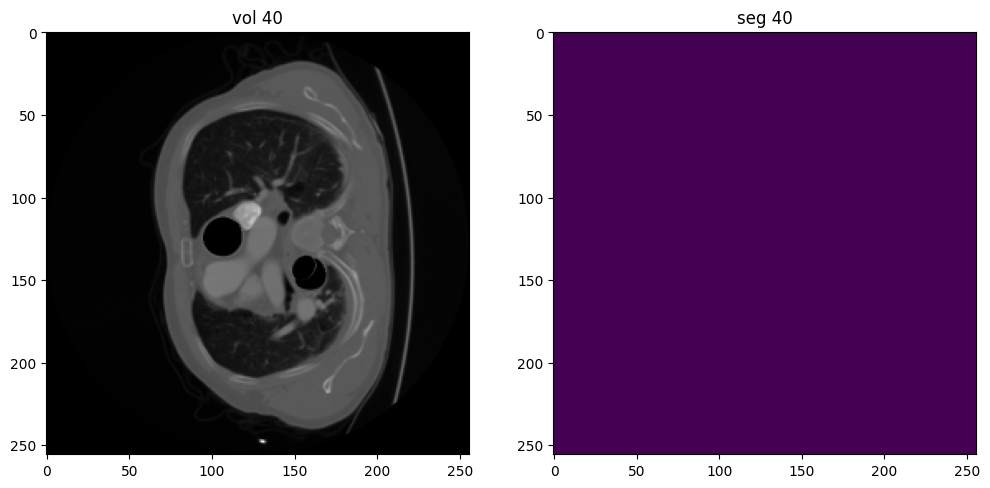

In [8]:
show_patient(data_in,40)

# Testing Starts from here



In [21]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)
# from pathlib import Path
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

#define for valing: Path of the model, and Path to the valdata
# data_dir = 'D:/grad/TBAD Dataset/imageTBAD'
# data_dir="D:/grad/Landmarks-images"
# model_dir = Path("D:/grad/Landmark seg")#D:/grad/TBAD Dataset/imageTBAD/Softmax Jaccard Model with thresholded data 10 epoch [1024,1024,32]")


train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
val_loss = np.load(os.path.join(model_dir, 'loss_val.npy'))
val_metric = np.load(os.path.join(model_dir, 'metric_val.npy'))

In [22]:
path=model_dir

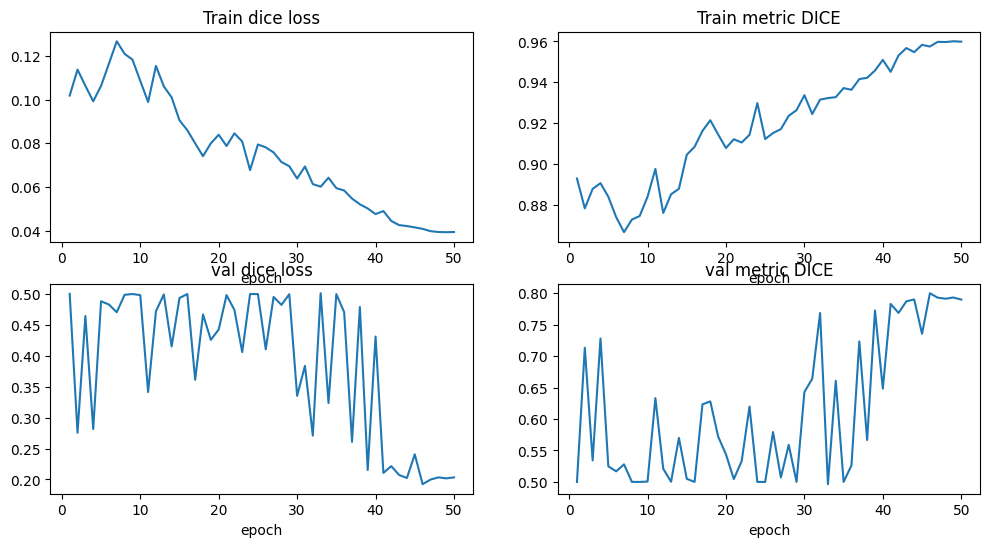

In [23]:
plt.figure("Results", (12, 6))
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("val dice loss")
x = [i + 1 for i in range(len(val_loss))]
y = val_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("val metric DICE")
x = [i + 1 for i in range(len(val_metric))]
y = val_metric
plt.xlabel("epoch")
plt.plot(x, y)
plt.savefig(f"{path}/trian val loss.png")
plt.show()

In [16]:
path_test_volumes = sorted(glob(os.path.join(data_dir, "TestVol", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(data_dir, "TestSeg", "*.nii.gz")))

test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
# test_files = test_files[0:9]

In [17]:
test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            AddChanneld(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=(1.0, 1.0, 1.0), mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=0, a_max=300, clip=False),
            Resized(keys=["vol", "seg"], spatial_size=[256,256,64]),
            ToTensord(keys=["vol", "seg"]),
        ]
    )
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


In [29]:
# from monai.data import CacheDataset, DataLoader
# from monai.networks.nets import UNet
# from monai.transforms import Compose, CastToType, AddChannel, ScaleIntensity, EnsureType, Activations, AsDiscrete
# from monai.networks.layers import Norm
# from monai.losses import DiceLoss, DiceCELoss
# from monai.handlers import StatsHandler, CheckpointSaver
# from monai.inferers import SimpleInferer
# from monai.data.utils import decollate_batch
# from monai.utils import set_determinism
# from monai.data import create_test_image_3d
# from monai.metrics import DiceMetric
# from torch.utils.tensorboard import SummaryWriter
# from monai.transforms import LoadNifti, LoadNiftid, AsDiscrete, AddChannel, RandRotate90, RandFlip, RandZoom, RandSpatialCrop, RandAffine, Spacing, Orientation, NormalizeIntensity, ToTensor
# from torch.optim import Adam
# import torch
# import os


# # # Create a test image (assuming it's a 3D image)
# # test_image, test_seg = create_test_image_3d(128, 128, 128, num_seg_classes=1)
# # test_image = test_image[None]
# # test_image = torch.tensor(test_image).to(device=device, dtype=torch.float)
# # output = model(test_image).detach().cpu()

# # # Assuming model_output is the output of your model
# # output = model_output.detach().cpu()

# # Convert the output to a NIfTI file
# output_nifti = test_outputs.squeeze().numpy()
# nib.save(output_nifti, os.path.join(model_dir, "output.nii.gz"))

In [14]:
import nibabel as nib
import numpy as np
import torch
from monai.inferers import sliding_window_inference

# Define the paths
image_path = 'D:\\grad\\TBAD Dataset\\imageTBAD\\TestVolumes\\192_image.nii.gz'
path_to_save = 'D:\\grad\\Landmarks-images\\192_image_output.nii.gz'

# Load the image using NiBabel
img1 = nib.load(image_path)
img1_data = img1.get_fdata()  # Get the image data
img1_affine = img1.affine  # Get the affine
img1_header = img1.header  # Get the header

# Convert the image data to a PyTorch tensor and add batch and channel dimensions
img1_tensor = torch.tensor(img1_data, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Move the tensor to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img1_tensor = img1_tensor.to(device)

# Run the model inference
model = model.to(device)
model.eval()  # Ensure the model is in evaluation mode

with torch.no_grad():
    val_outputs = sliding_window_inference(
        img1_tensor,
        (96, 96, 96),
        4,
        model,
        overlap=0.7
    )

# Process the model output
val_outputs = torch.softmax(val_outputs, 1).cpu().numpy()
val_outputs = np.argmax(val_outputs, axis=1).astype(np.uint8)[0]

# Create a new NIfTI image with the same affine and header as the original image
output_nifti = nib.Nifti1Image(val_outputs, affine=img1_affine, header=img1_header)

# Save the output NIfTI image
nib.save(output_nifti, path_to_save)

print(f'Saved output image to {path_to_save}')

Saved output image to D:\grad\Landmarks-images\192_image_output.nii.gz


In [ ]:

for img_path in raw:
      nii_img = nib.load(img_path)
      
      shape.append(nii_img.get_fdata().shape)
      affine.append(nii_img.affine)

with torch.no_grad():
      for i, batch in enumerate(val_loader):
            val_inputs = batch["image"].cuda()
            # original_affine = batch["label_meta_dict"]["affine"][0].numpy()
            
            h, w, d = shape[i]
            target_shape = (h, w, d)
            img_name = batch["image_meta_dict"]["filename_or_obj"][0].split("/")[-1]
            print("Inference on case {}".format(img_name))
            
            val_outputs = sliding_window_inference(
                val_inputs, (args.roi_x, args.roi_y, args.roi_z), 4, model, overlap=args.infer_overlap, mode="gaussian"
            )
            val_outputs = torch.softmax(val_outputs, 1).cpu().numpy()
            val_outputs = np.argmax(val_outputs, axis=1).astype(np.uint8)[0]
            val_outputs = resample_3d(val_outputs, target_shape)
            
            nib.save(
                nib.Nifti1Image(val_outputs.astype(np.uint8), affine[i]), os.path.join(output_directory, img_name)
            )

Saved output NIfTI image to D:/grad/Landmarks-images/test_output.nii.gz


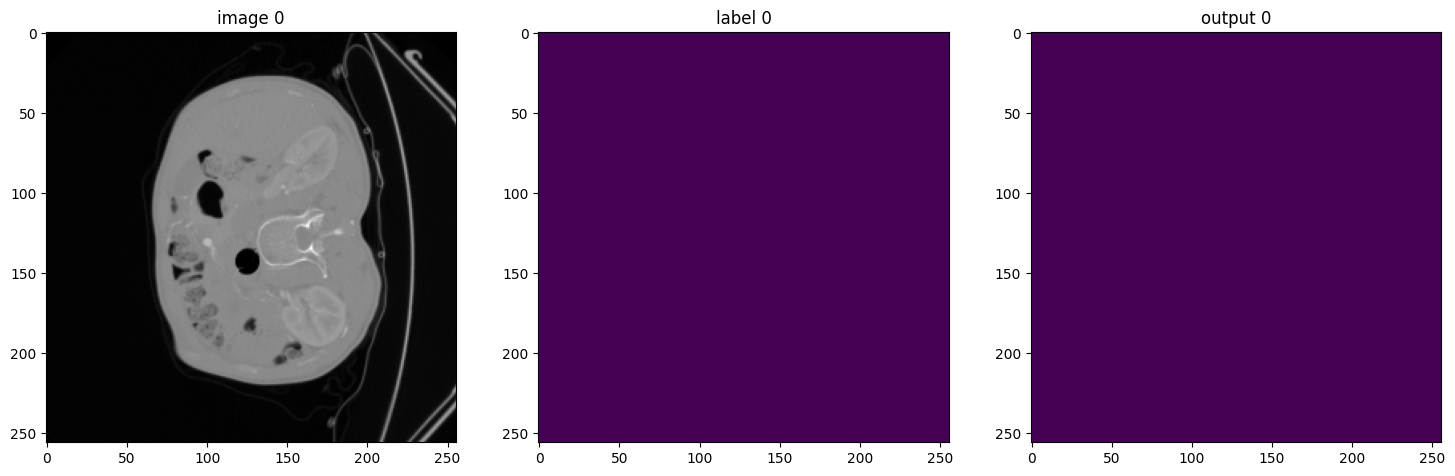

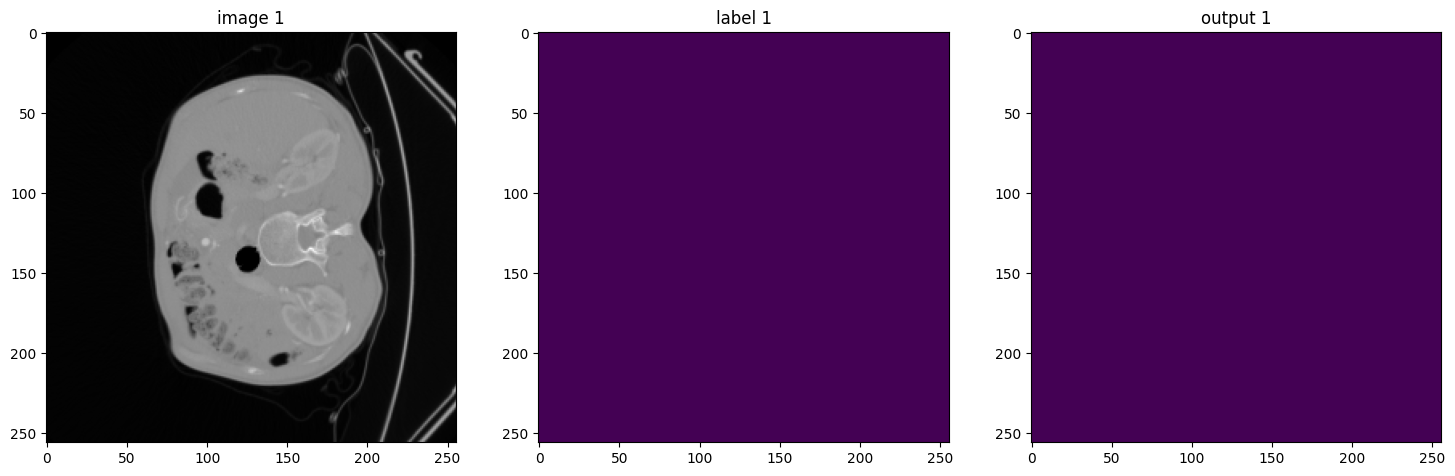

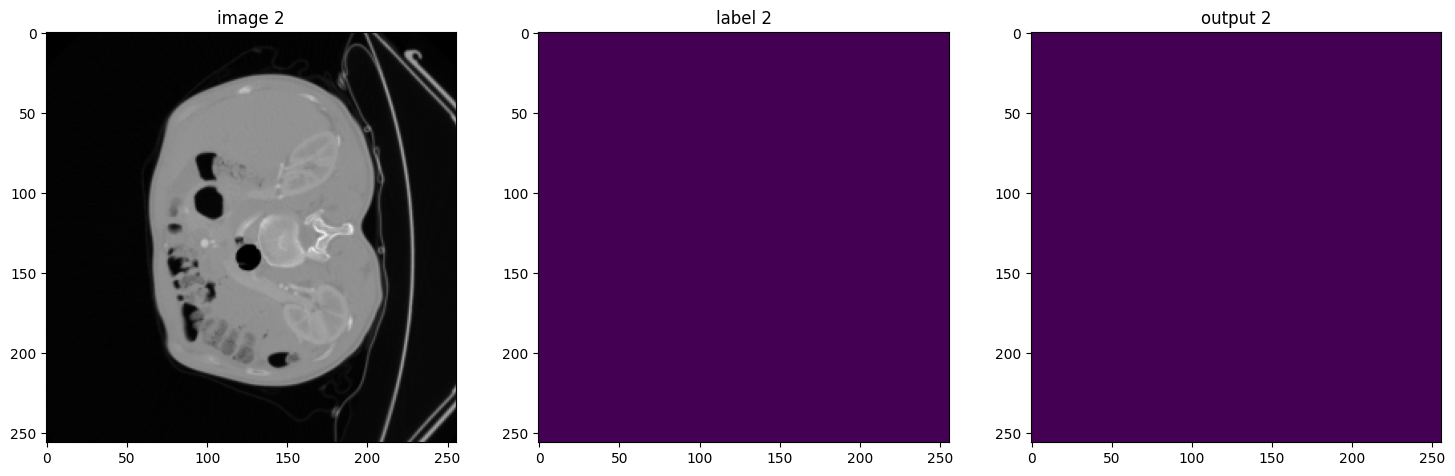

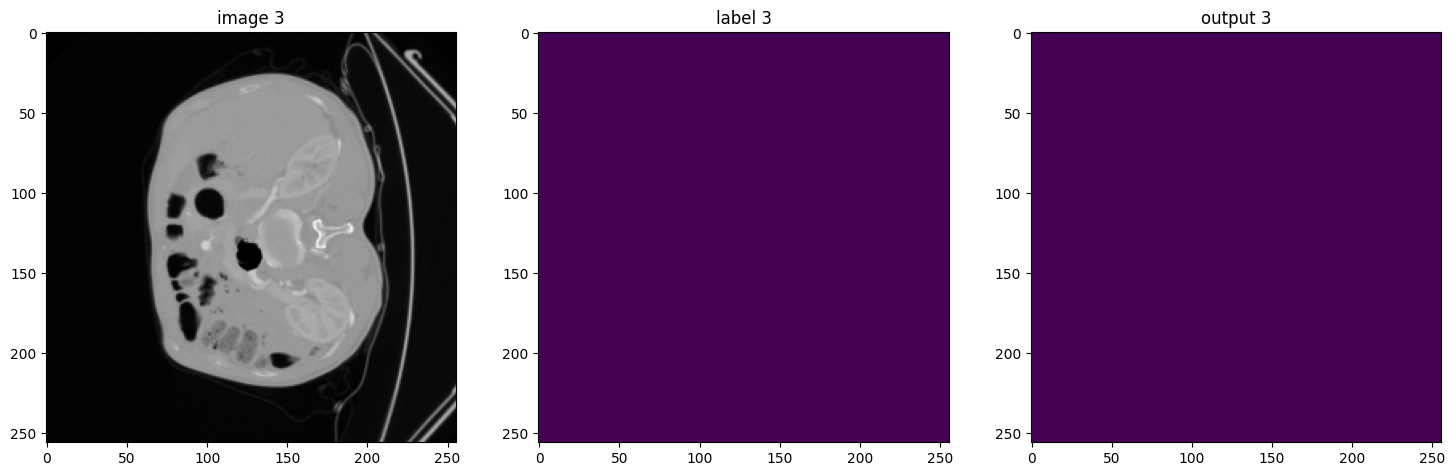

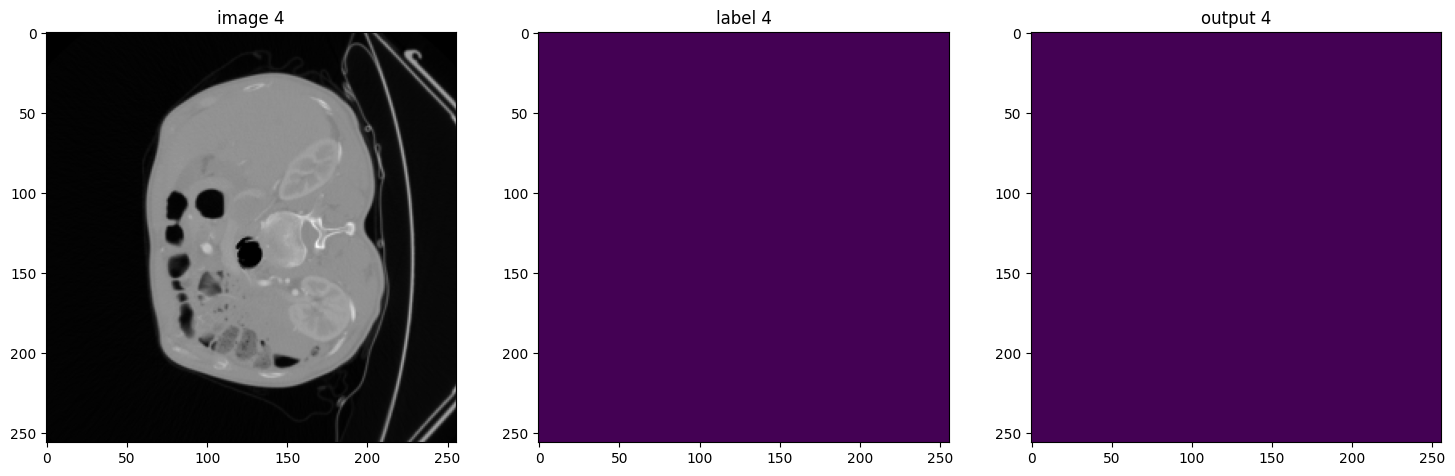

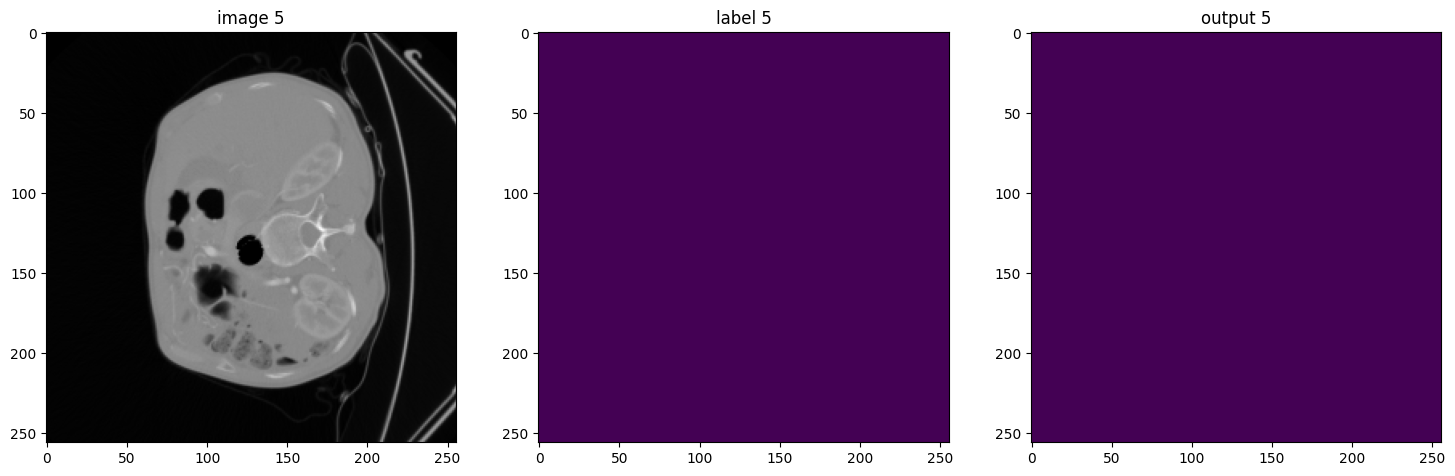

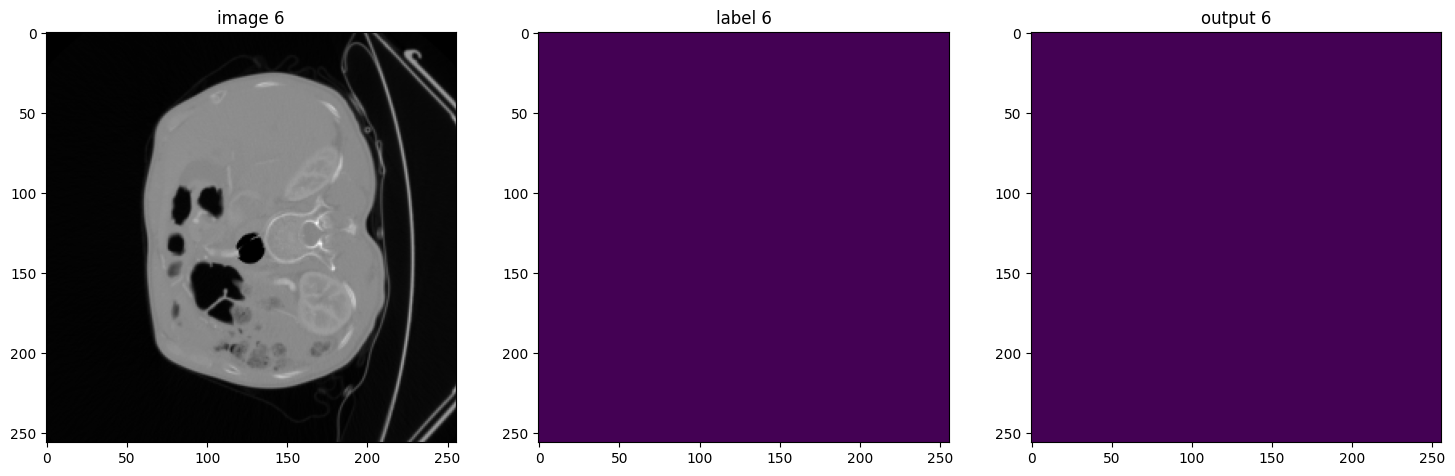

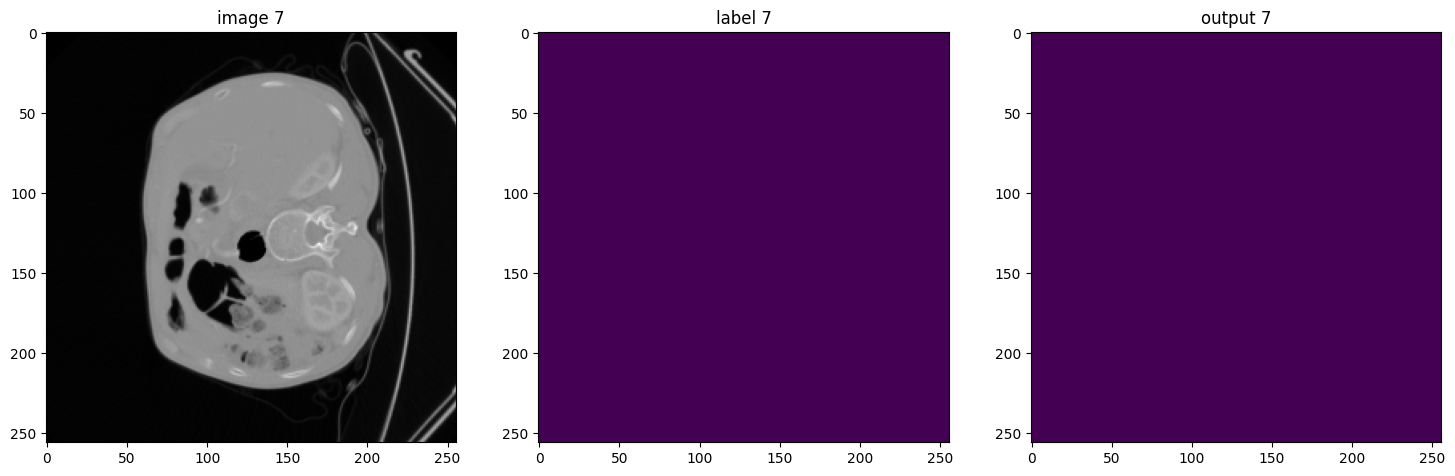

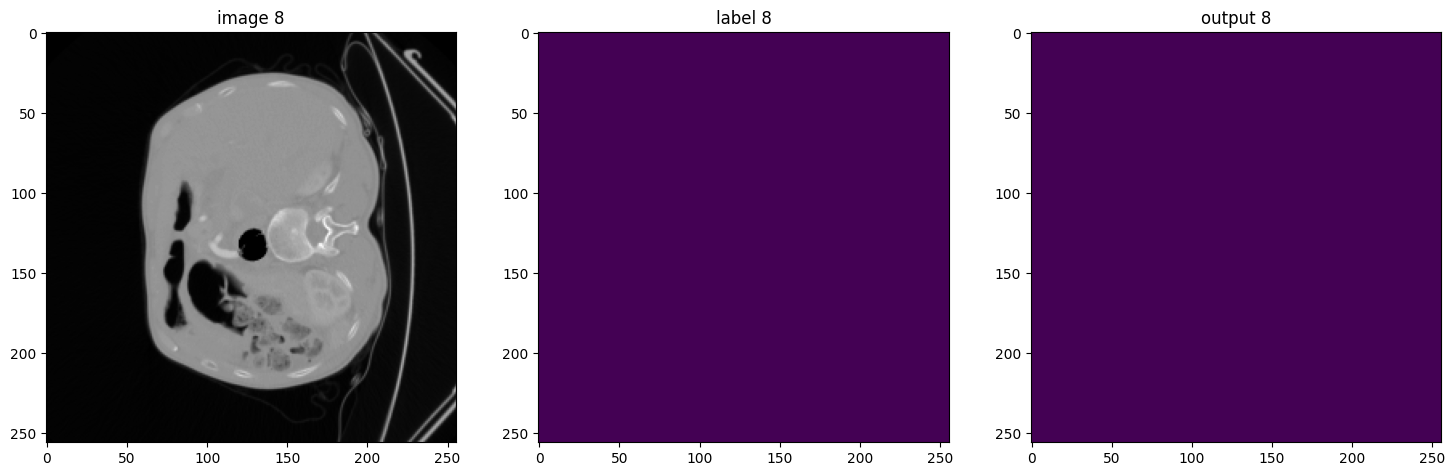

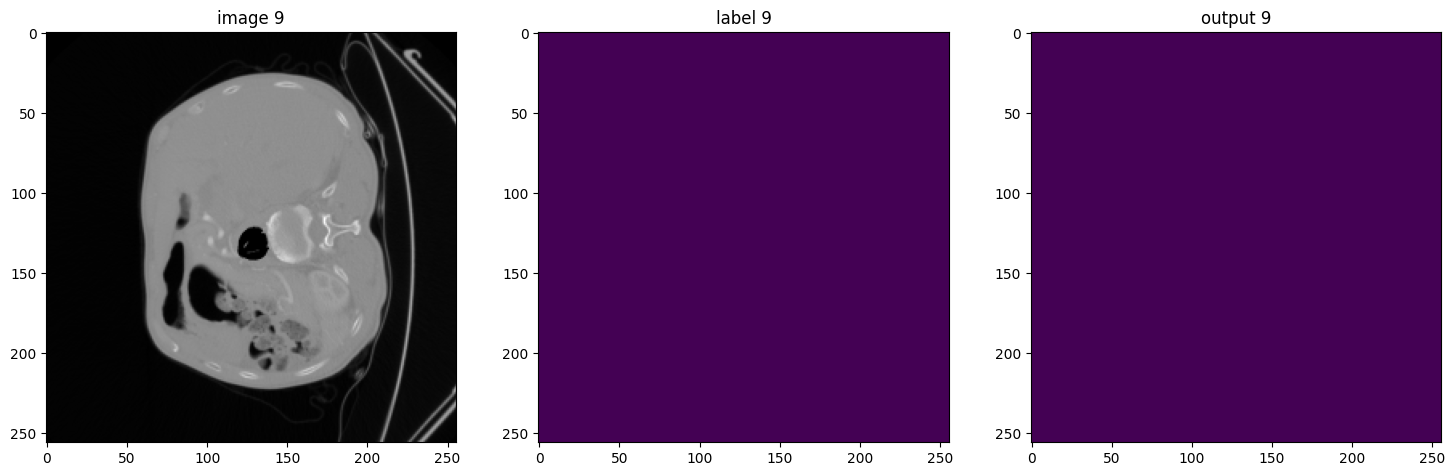

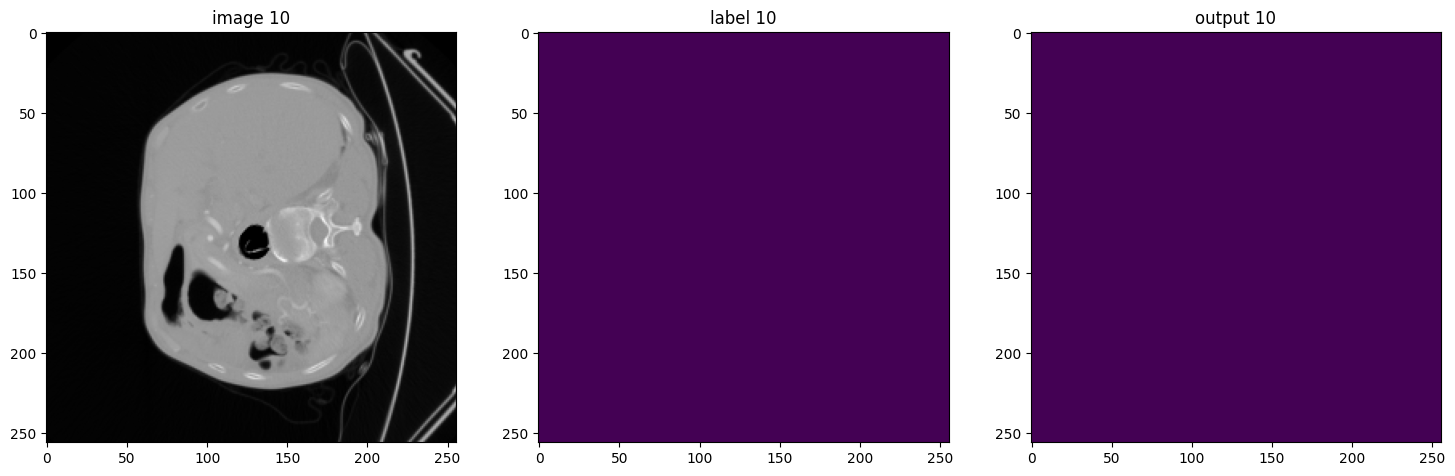

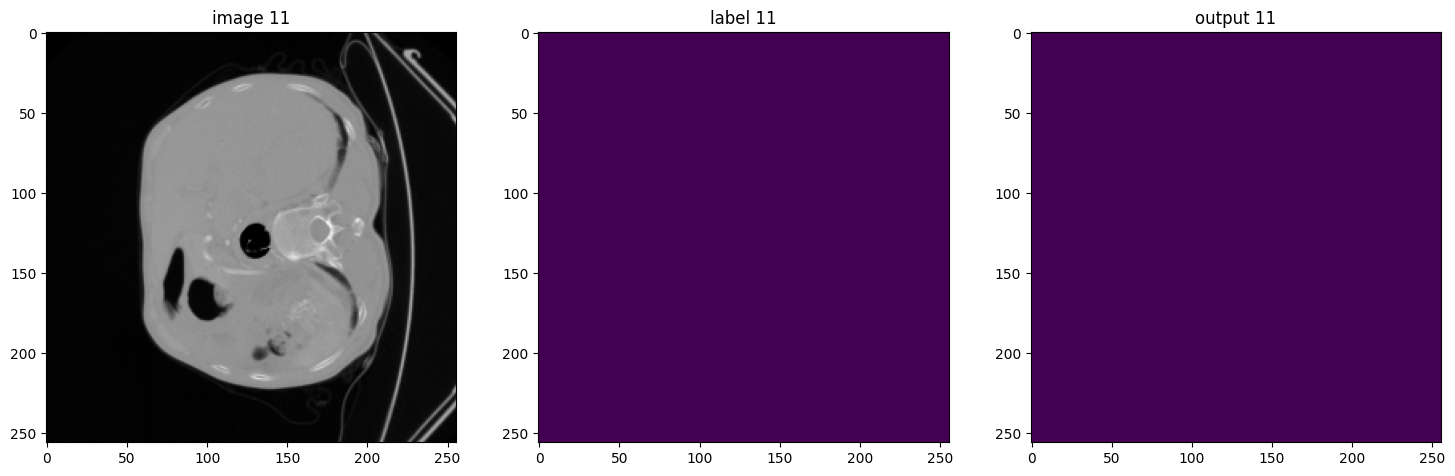

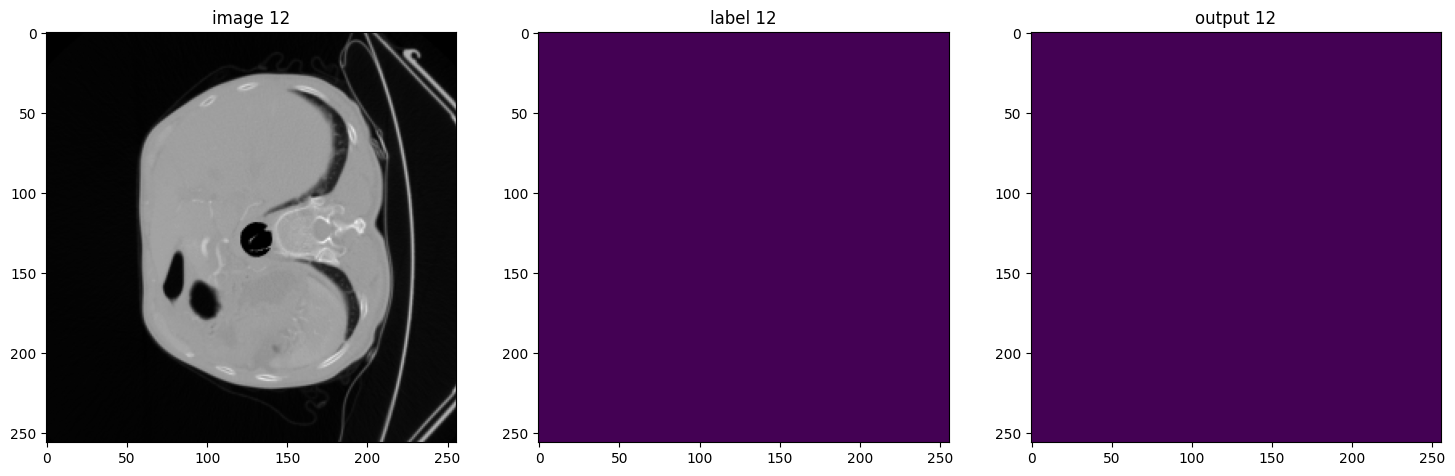

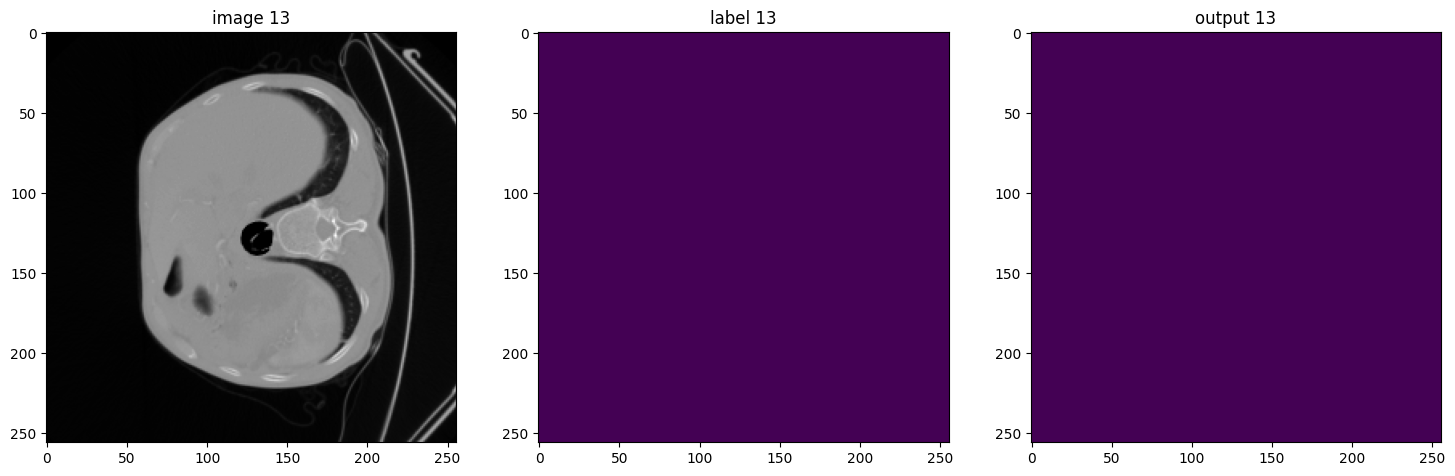

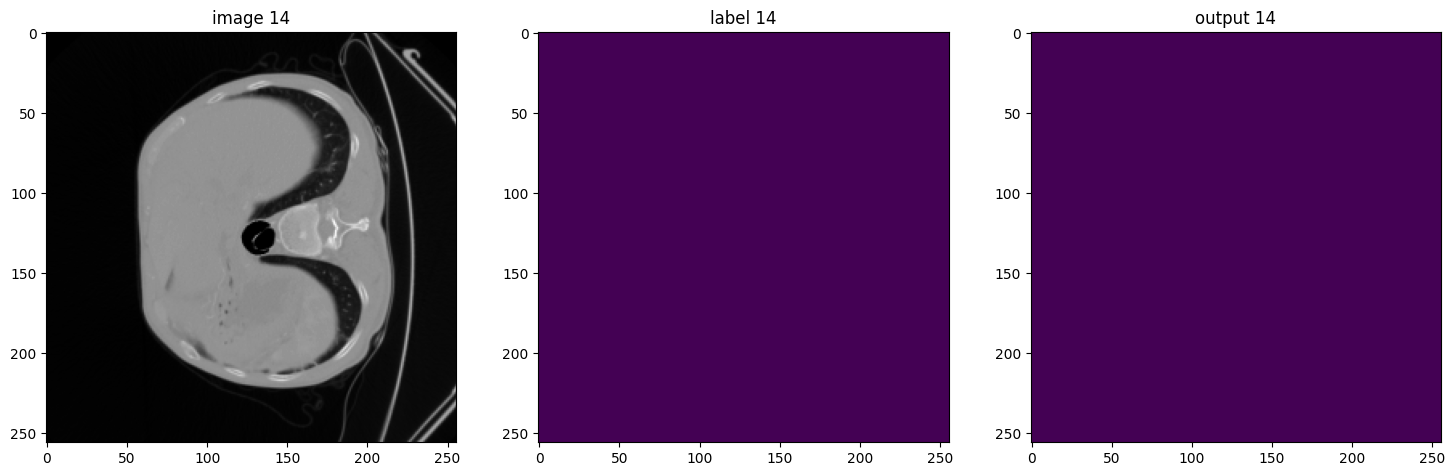

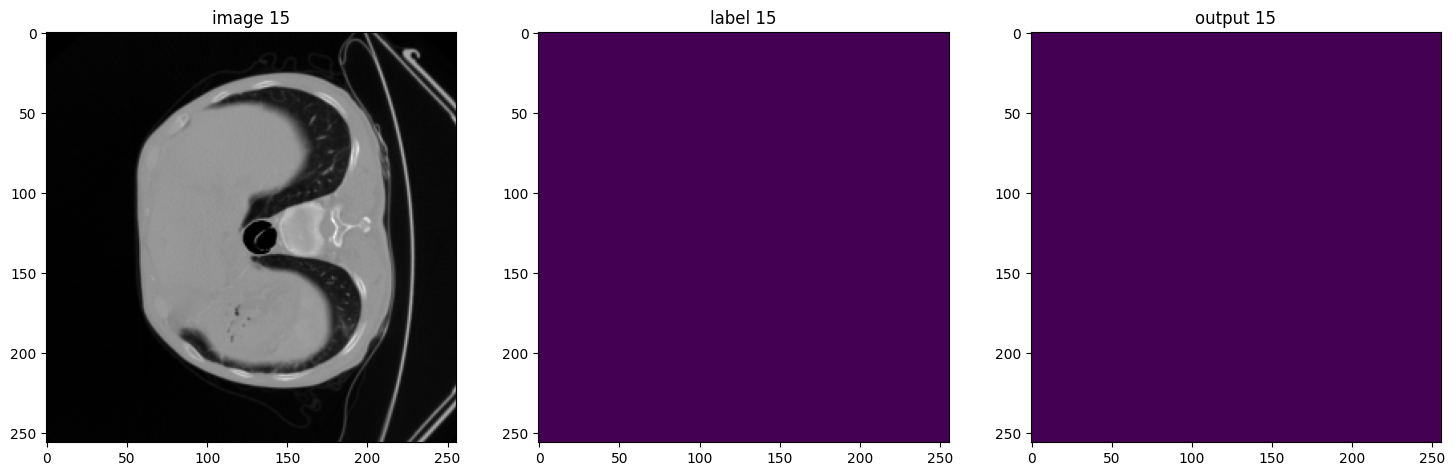

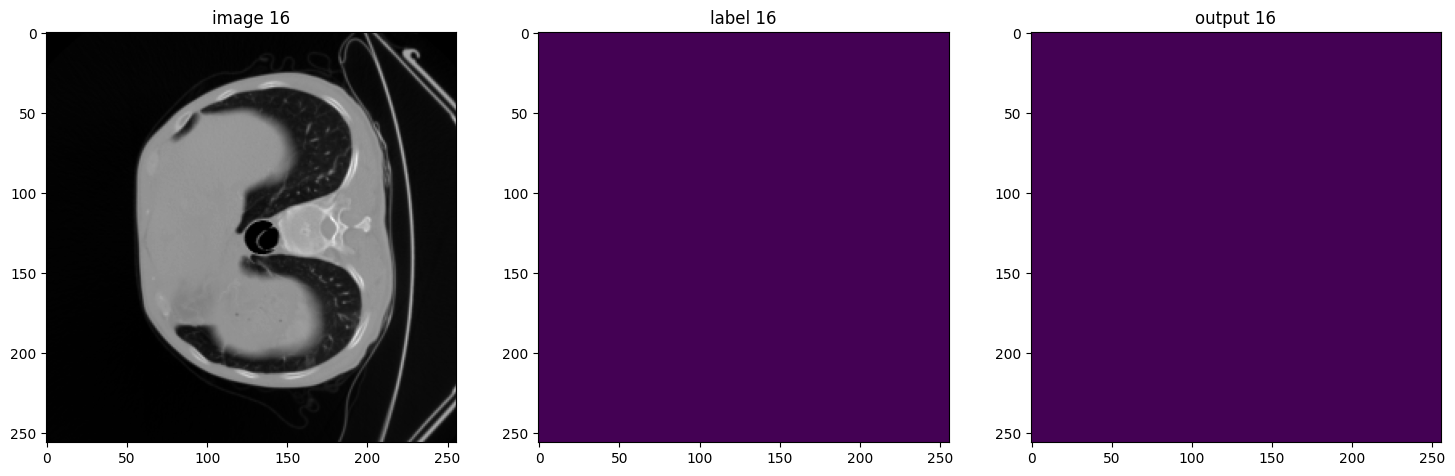

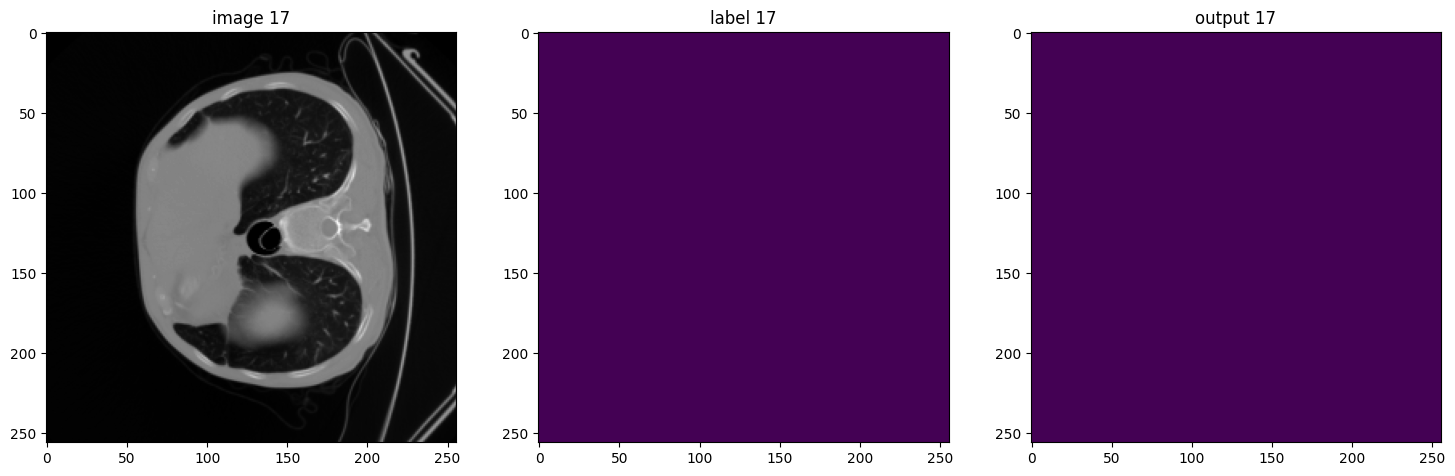

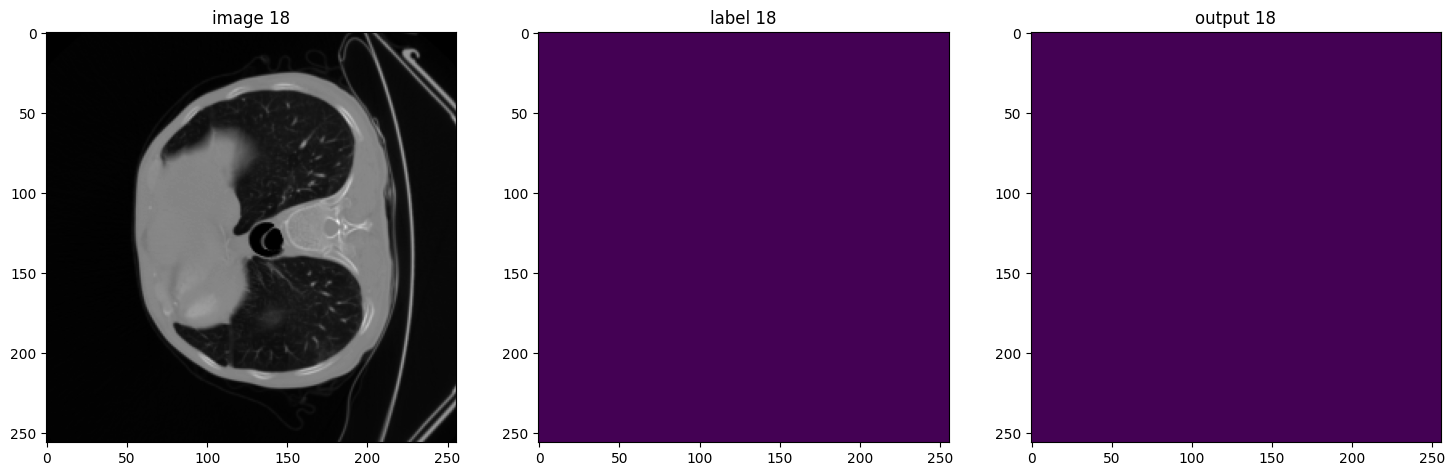

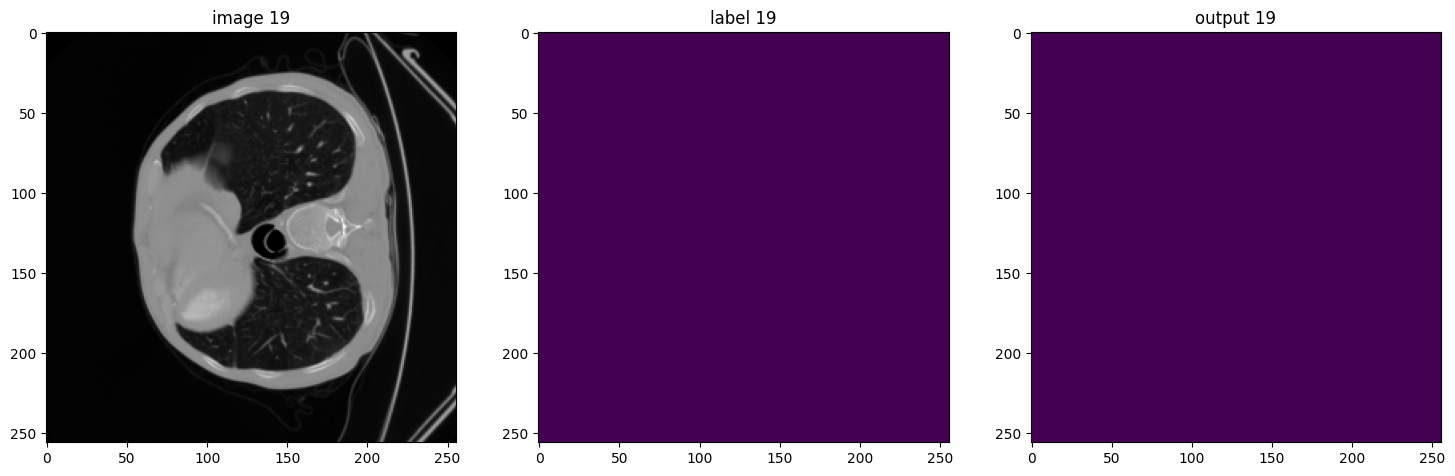

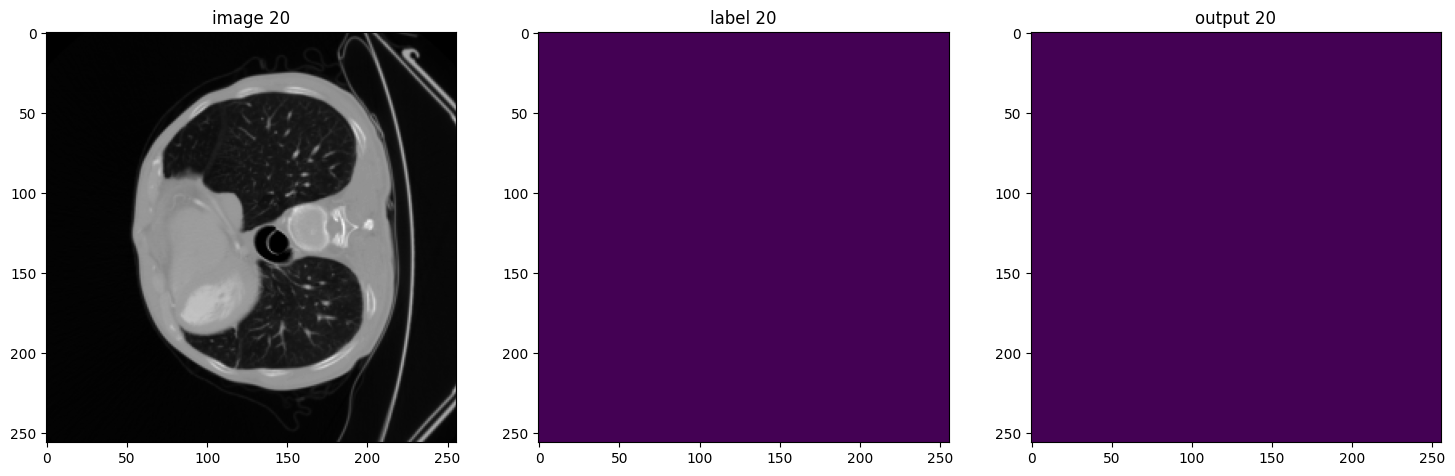

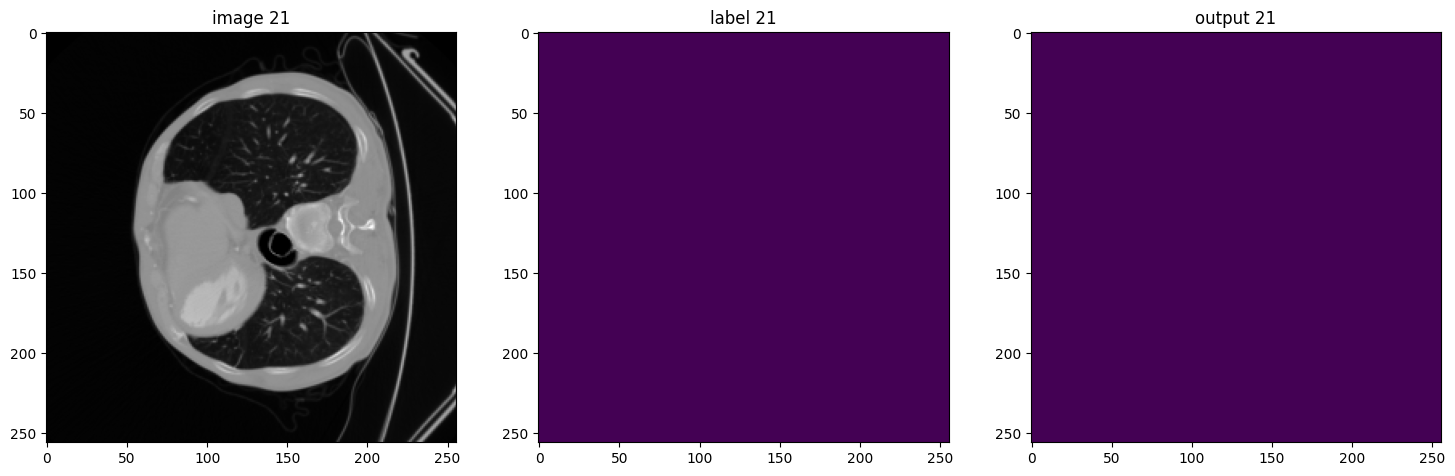

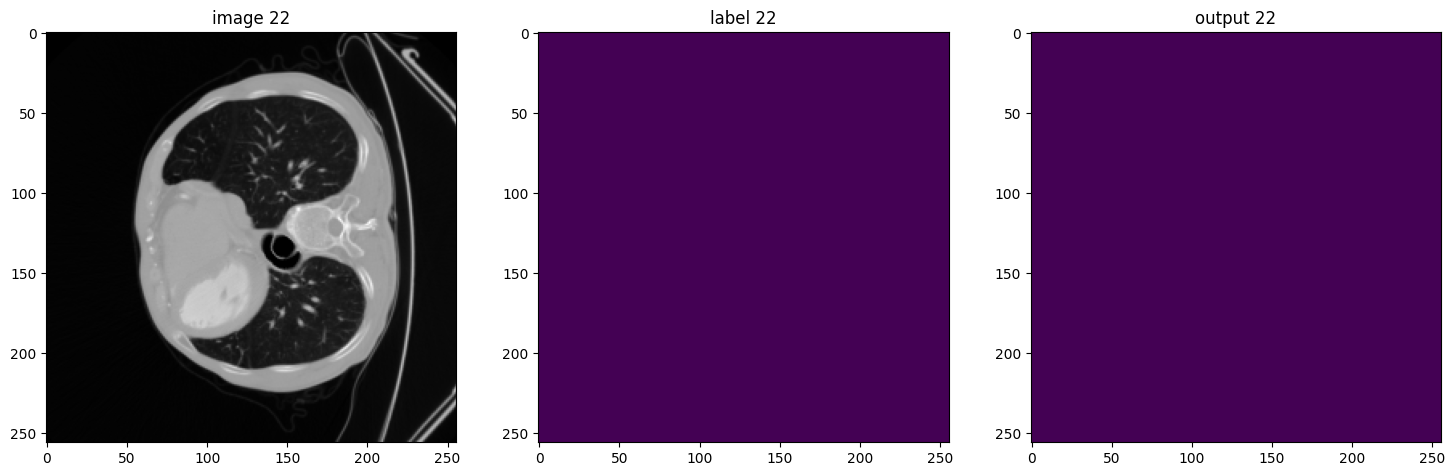

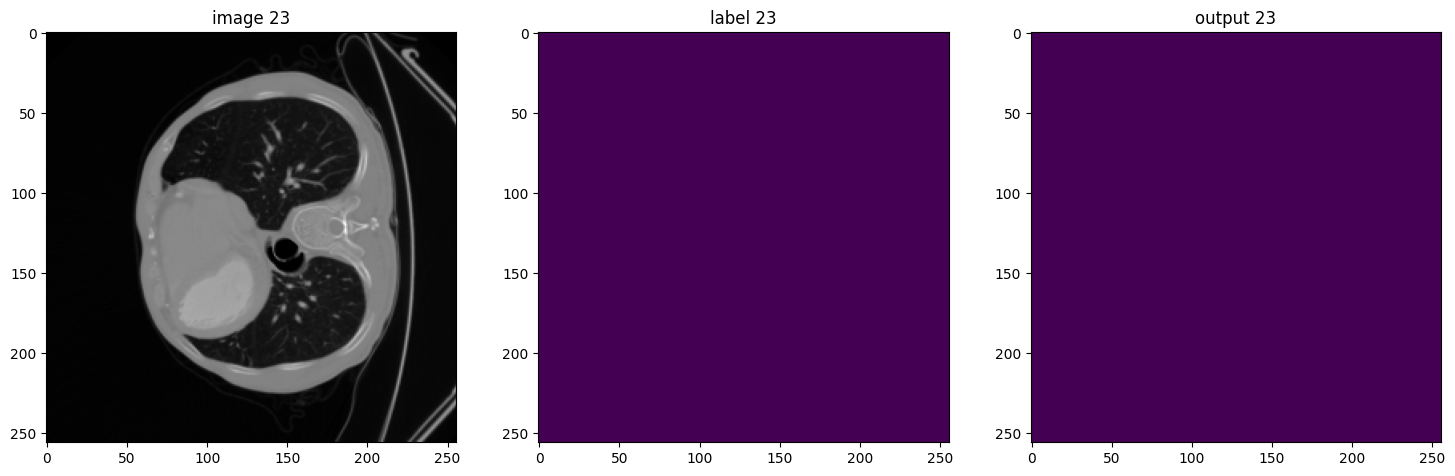

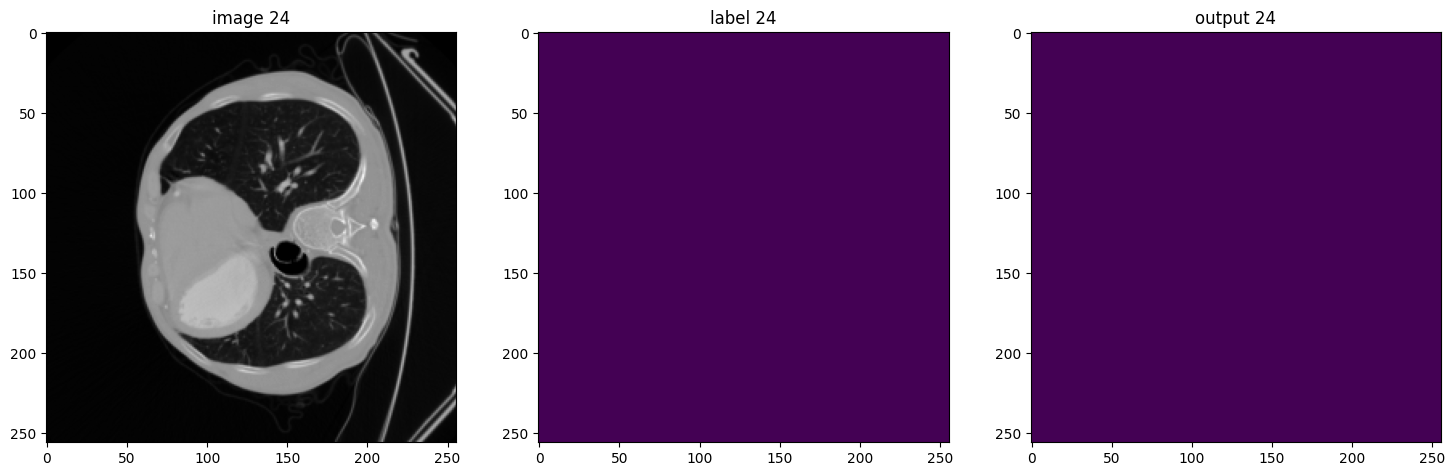

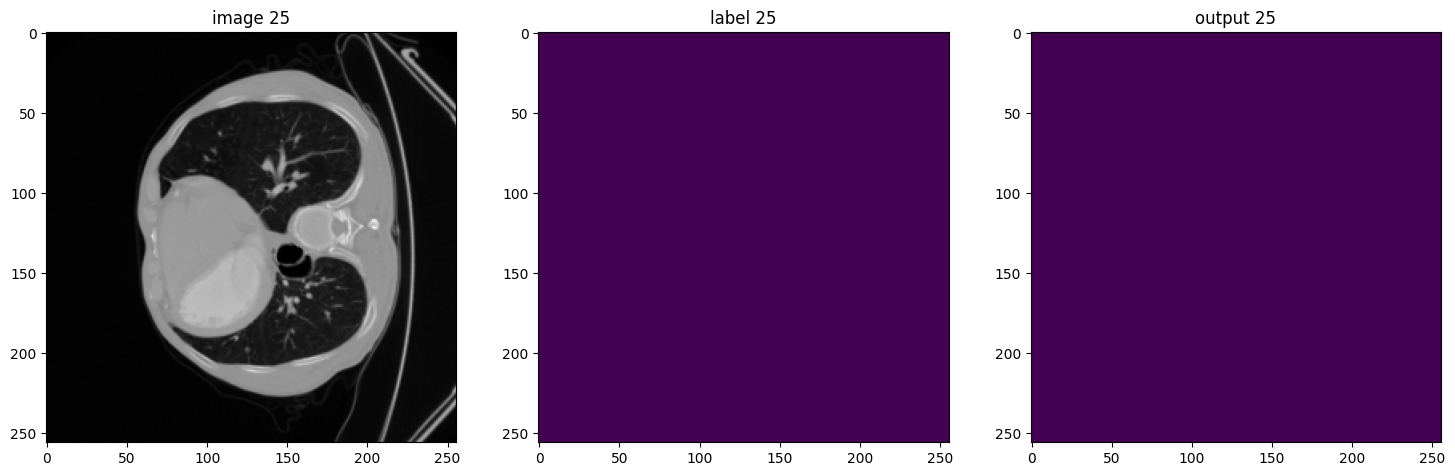

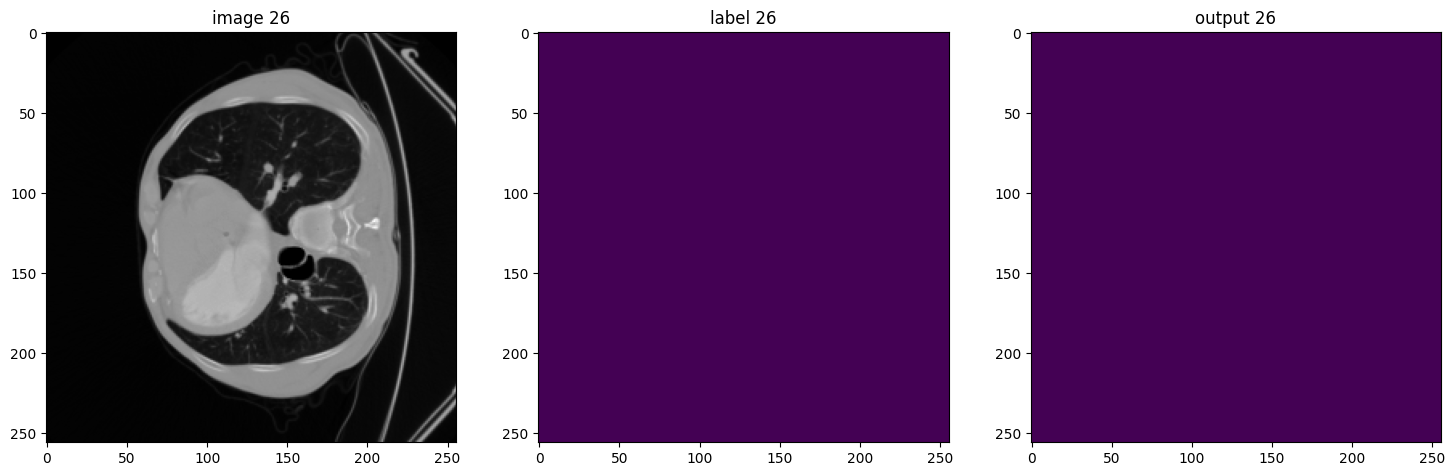

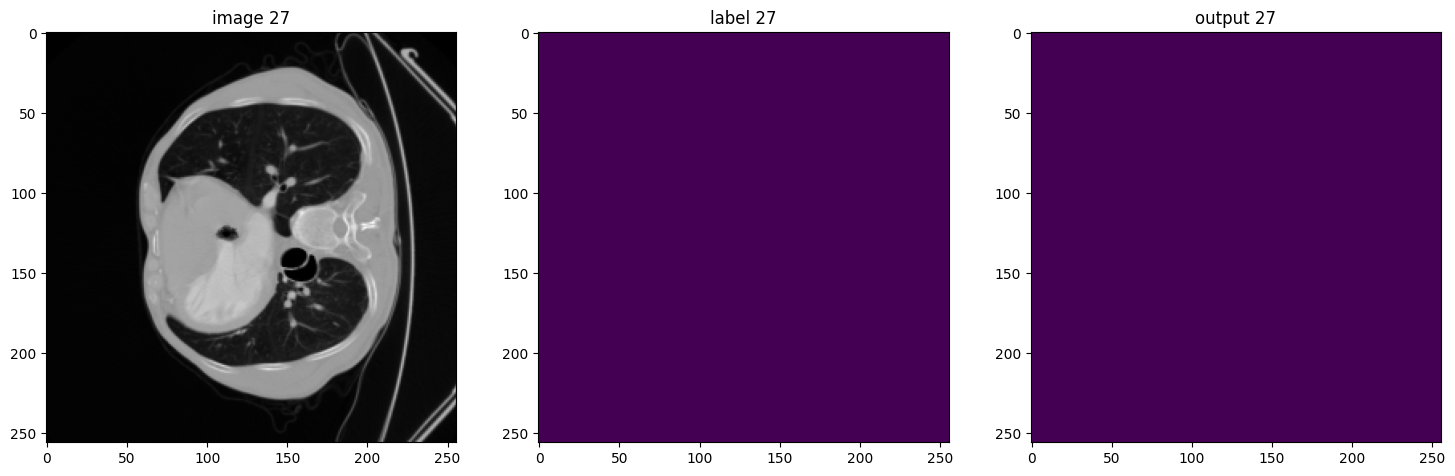

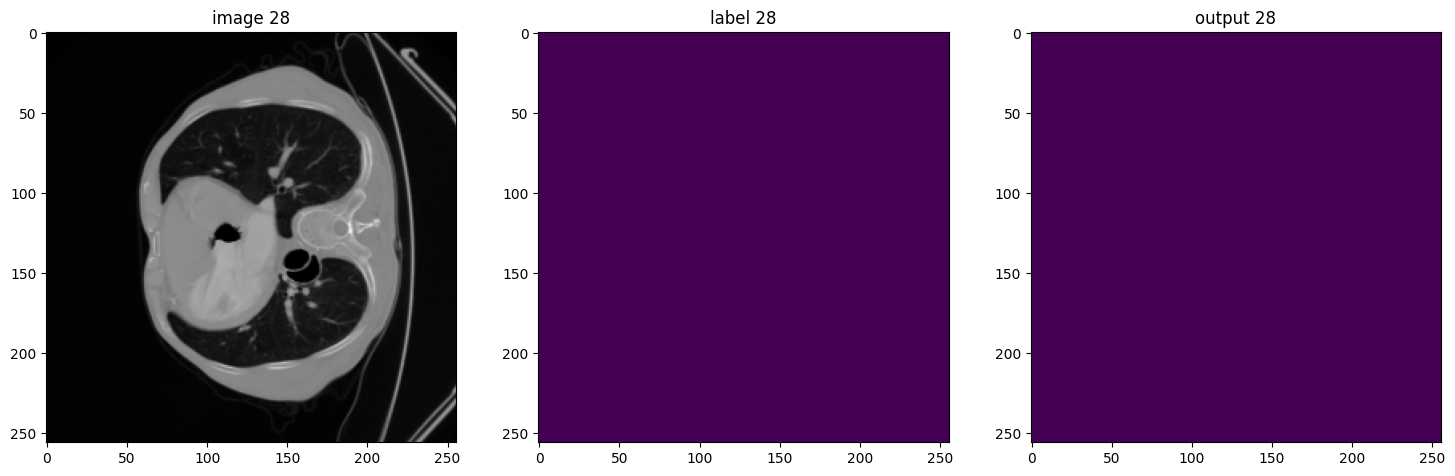

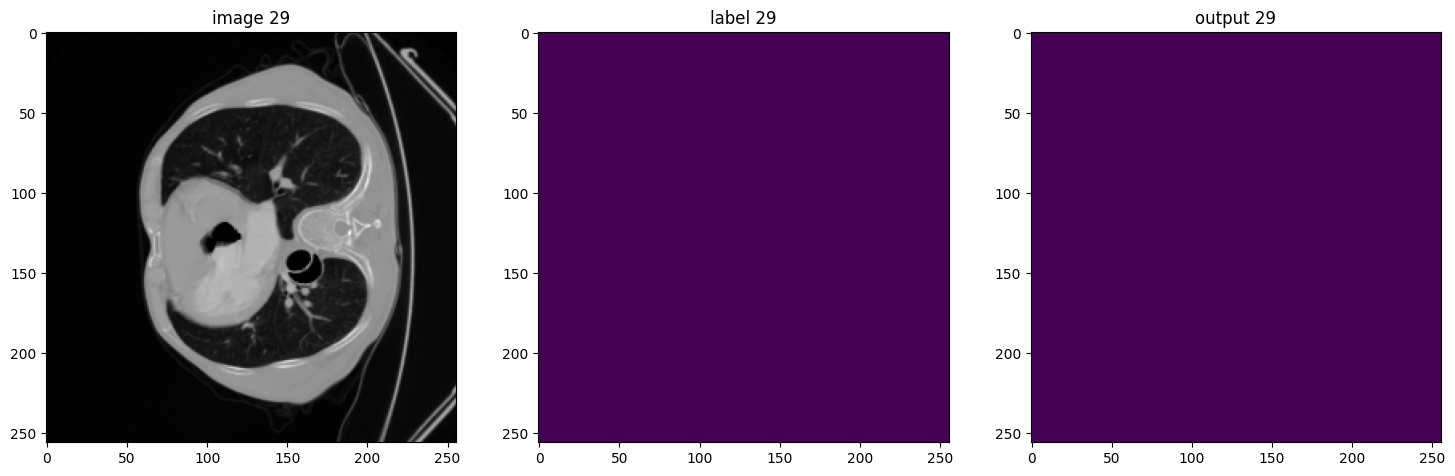

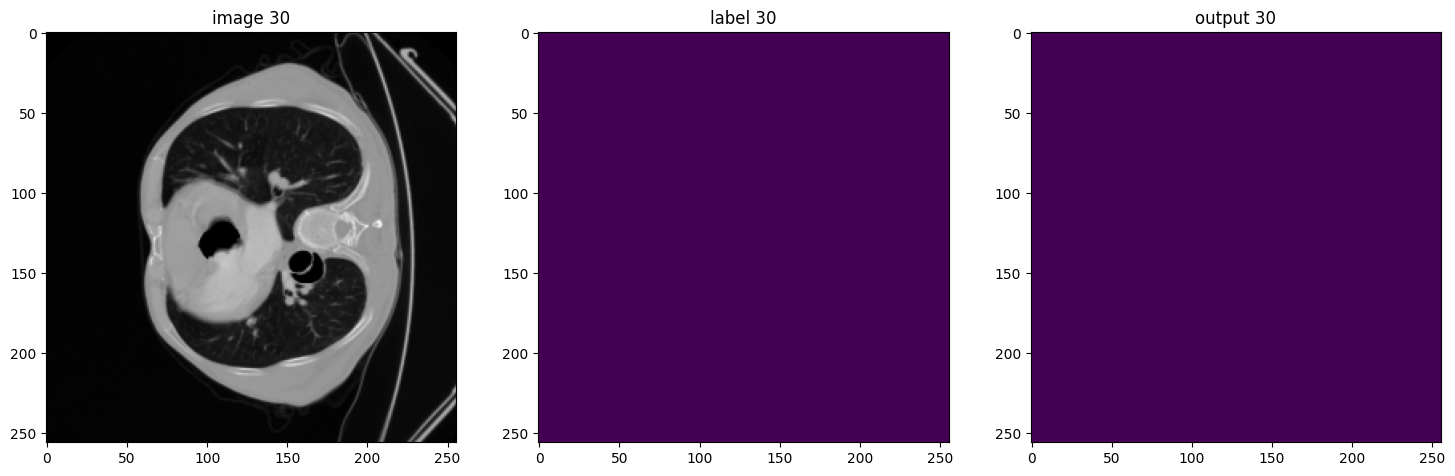

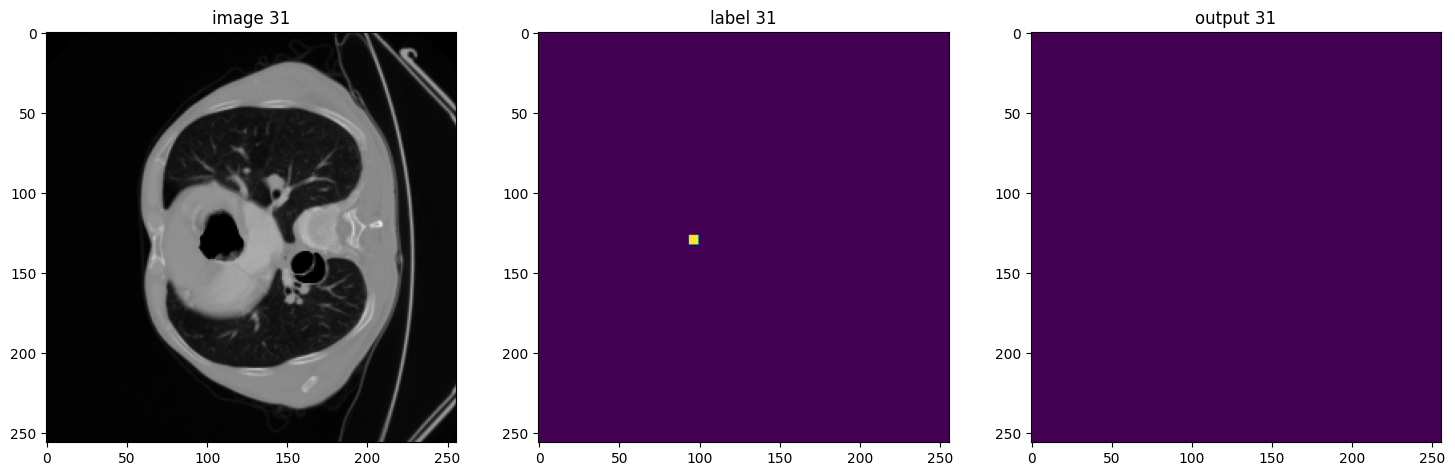

In [14]:
import matplotlib.pyplot as plt
import nibabel as nib
import torch
from monai.inferers import sliding_window_inference
from monai.transforms import Activations
from monai.data import decollate_batch

# Parameters
sw_batch_size = 4
roi_size = (256, 256, 32)
path_to_save = "D:/grad/Landmarks-images/test_output.nii.gz"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load test data
test_patient = first(test_loader)
t_volume = test_patient['vol']

# Perform sliding window inference
with torch.no_grad():
    t_volume = t_volume.to(device)
    test_outputs = sliding_window_inference(t_volume, roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.4

# Convert outputs to numpy array and process
test_outputs = test_outputs.cpu().numpy().astype(np.uint8)
test_outputs = np.squeeze(test_outputs)

# Save the output as NIfTI
output_nifti = nib.Nifti1Image(test_outputs, affine=None)
nib.save(output_nifti, path_to_save)
print(f'Saved output NIfTI image to {path_to_save}')

# Plot and save images
for i in range(32):
    plt.figure("check", (18, 6))
    plt.subplot(1, 3, 1)
    plt.title(f"image {i}")
    plt.imshow(test_patient["vol"][0, 0, :, :, i].cpu(), cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title(f"label {i}")
    plt.imshow(test_patient["seg"][0, 0, :, :, i].cpu() != 0)
    plt.subplot(1, 3, 3)
    plt.title(f"output {i}")
    plt.imshow(test_outputs[0, :, :, i])
    plt.savefig(f"{path_to_save}_{i}.png")
    plt.show()


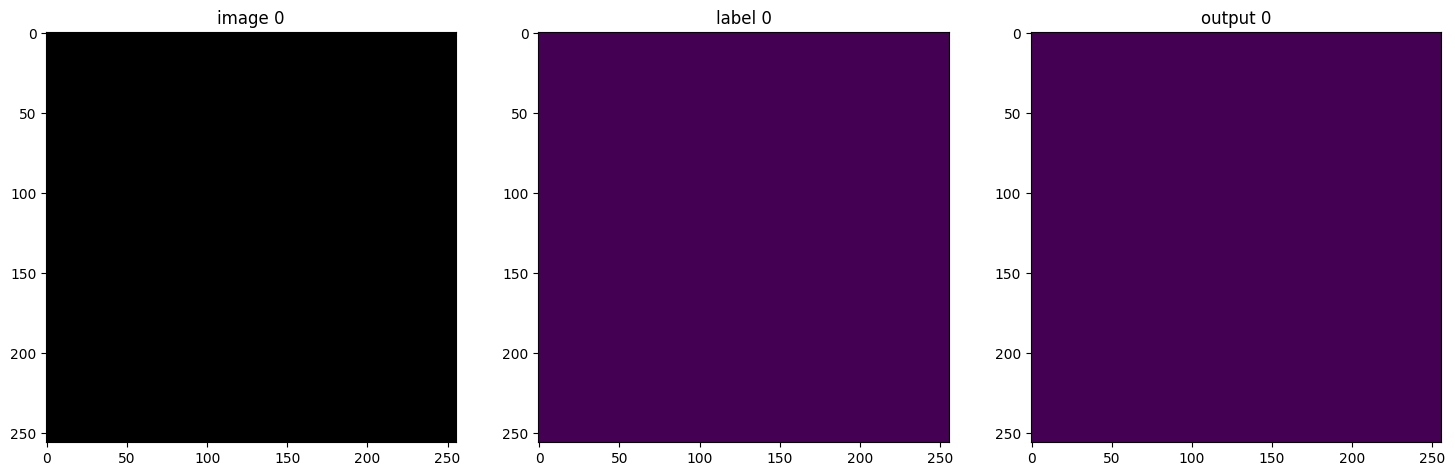

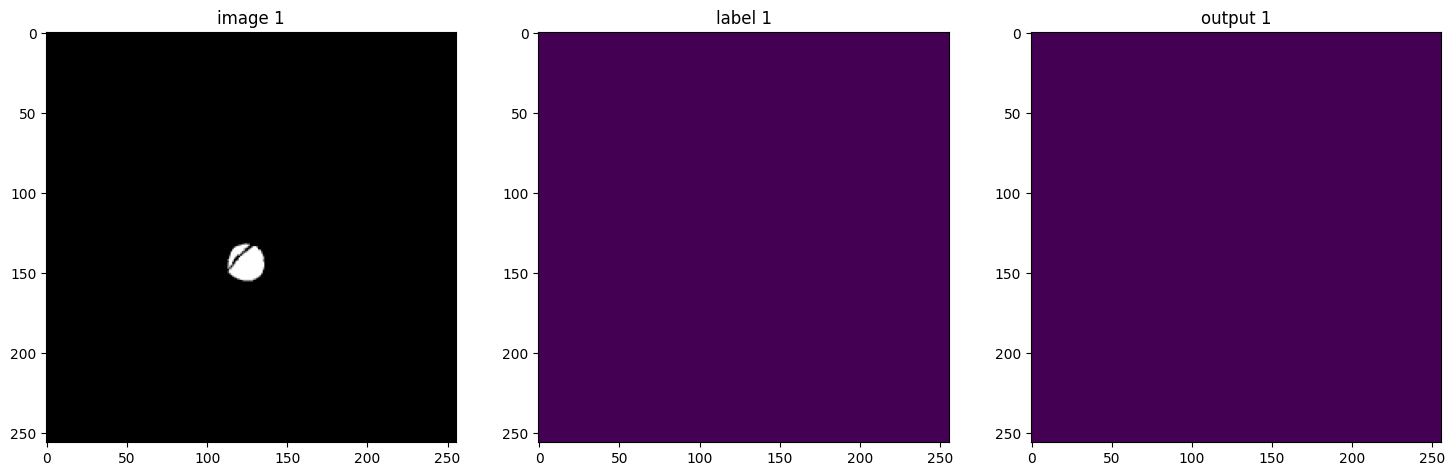

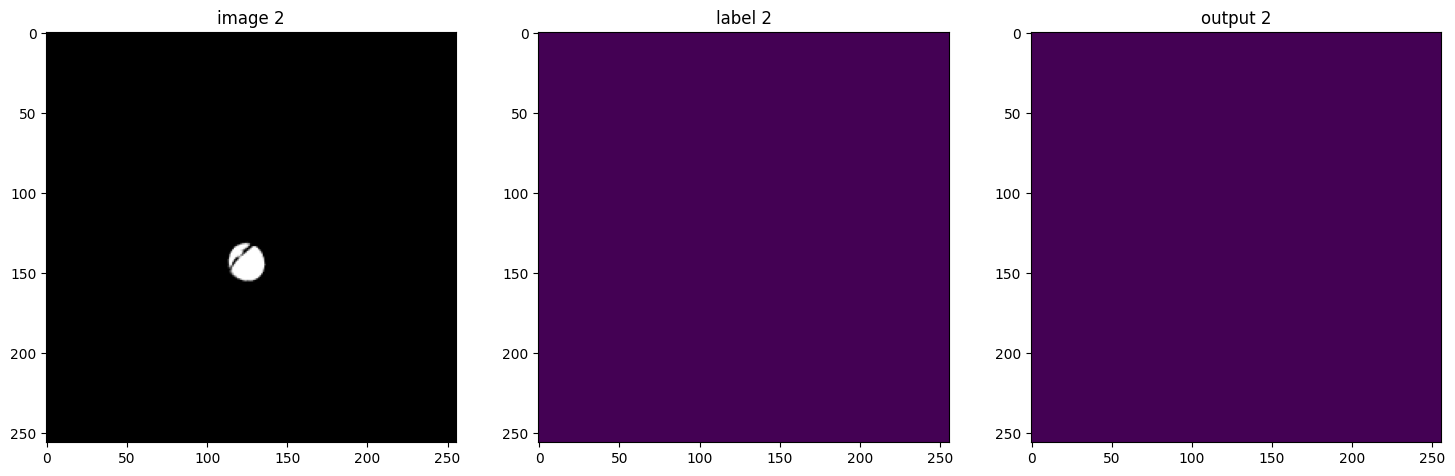

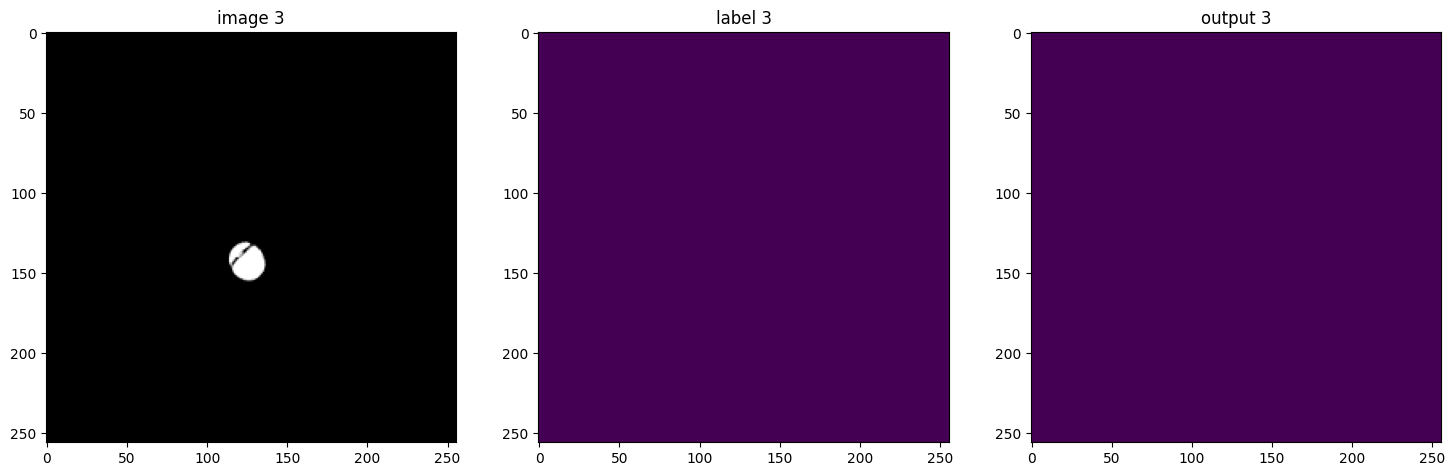

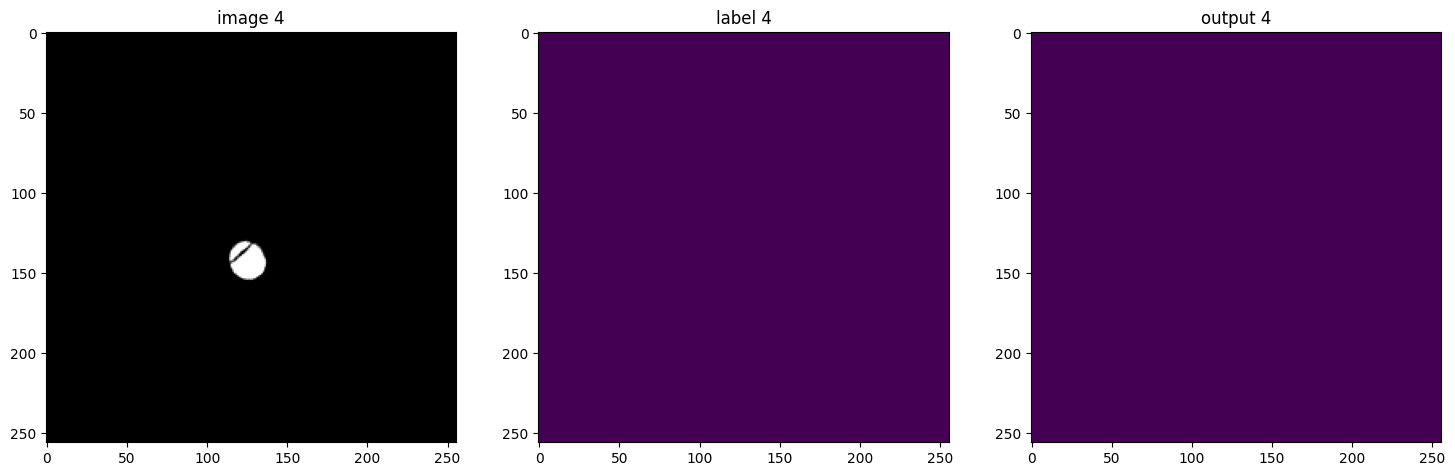

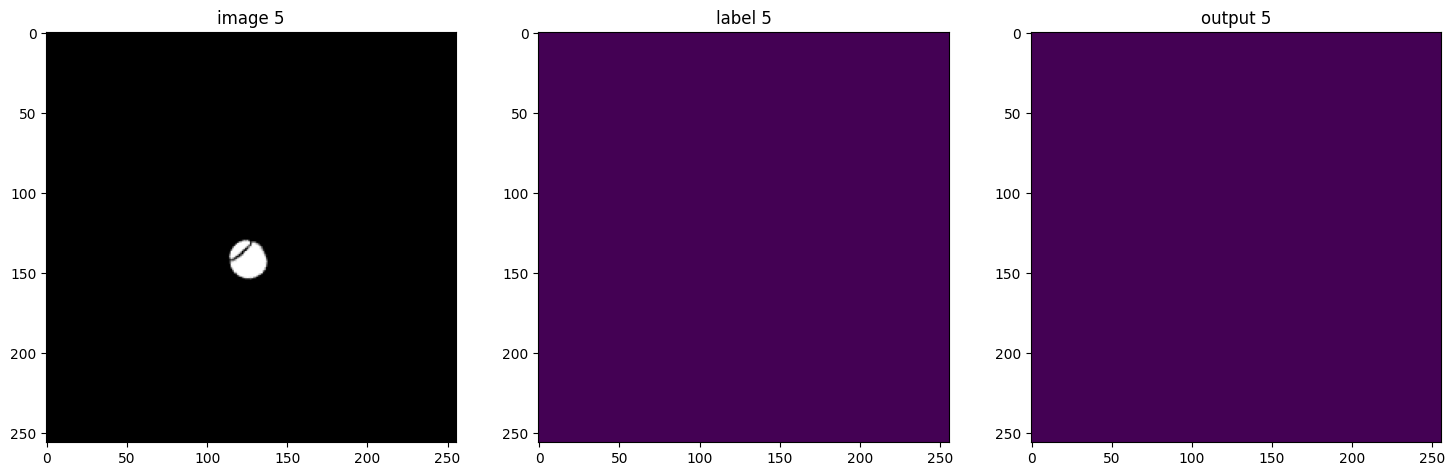

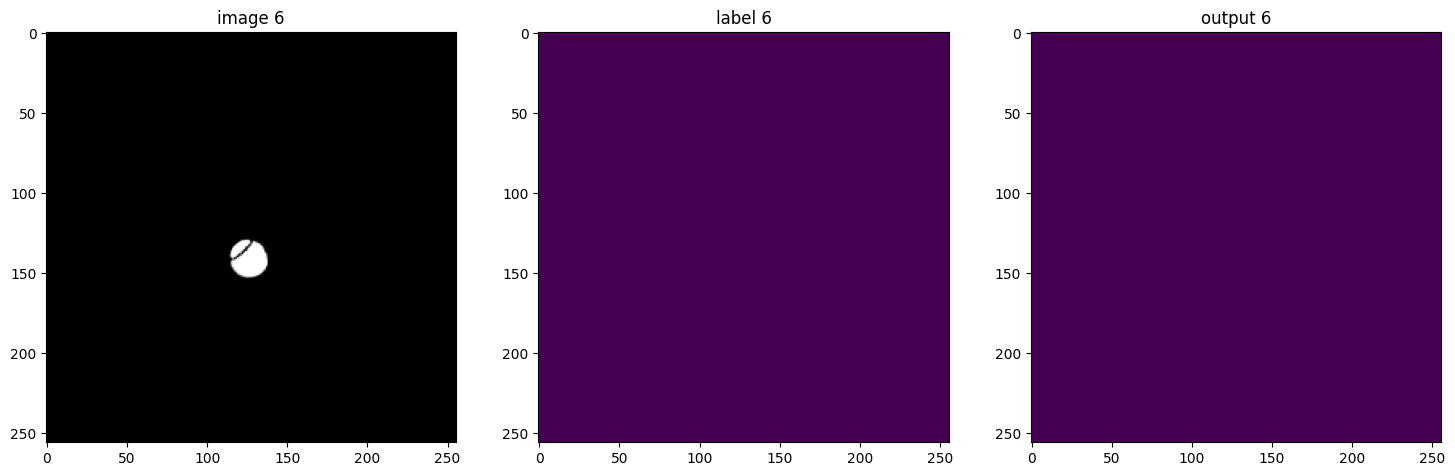

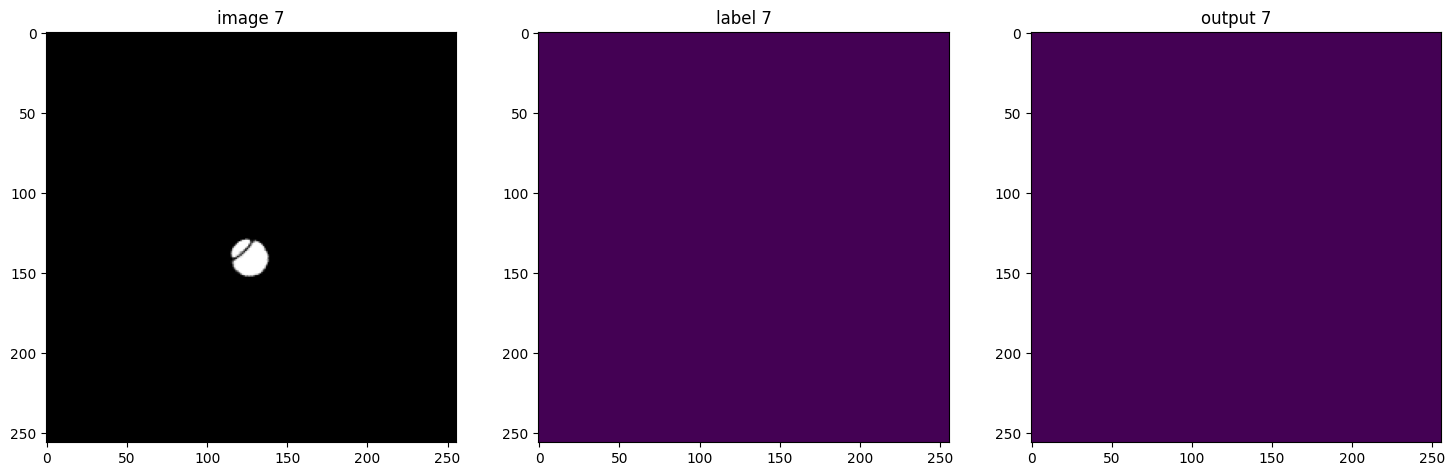

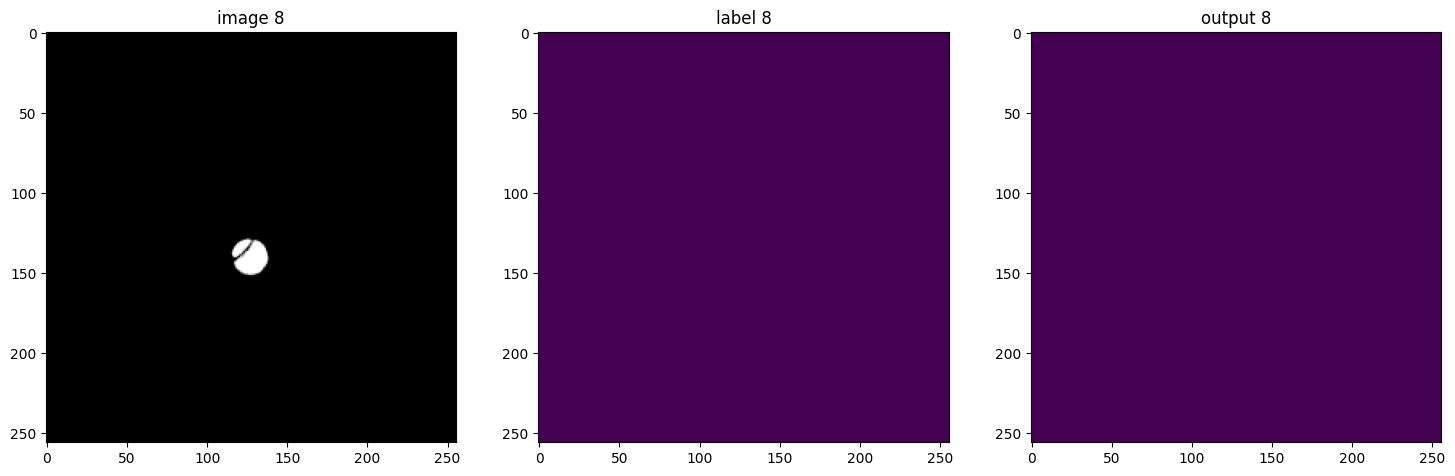

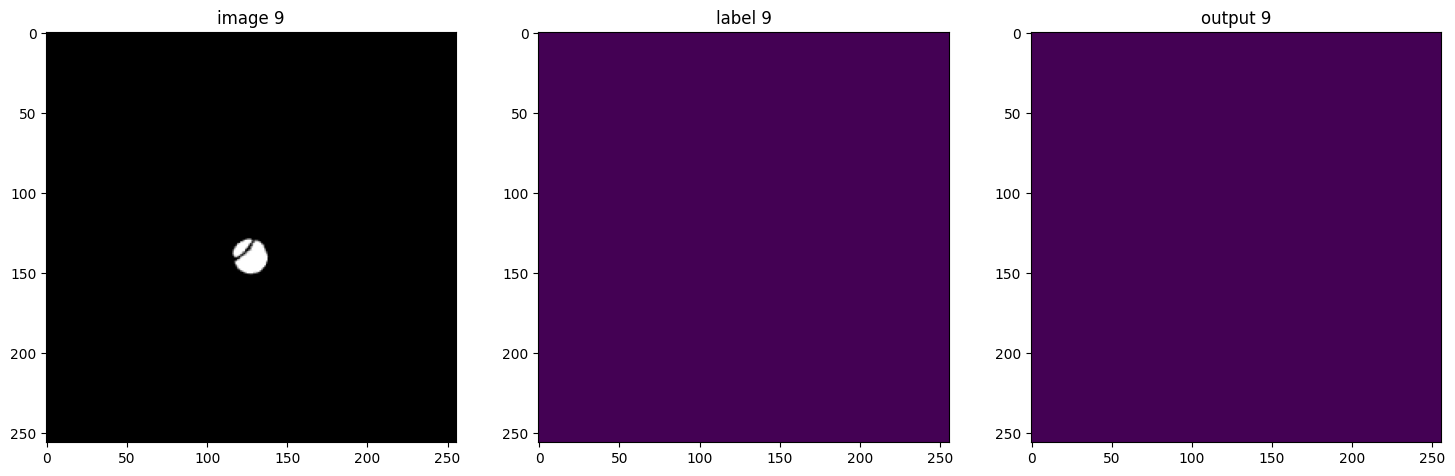

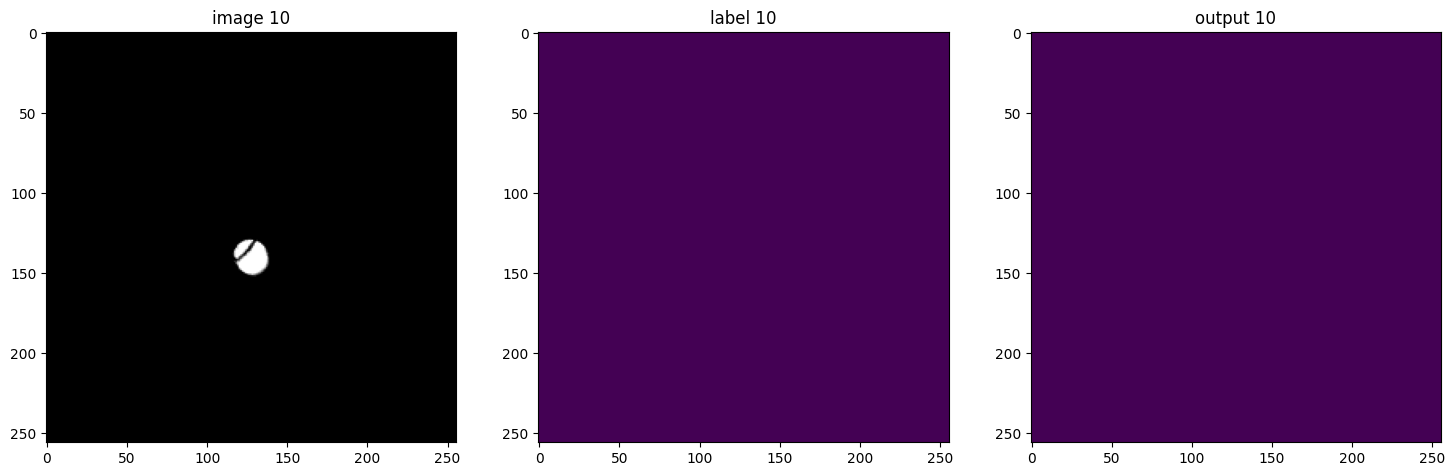

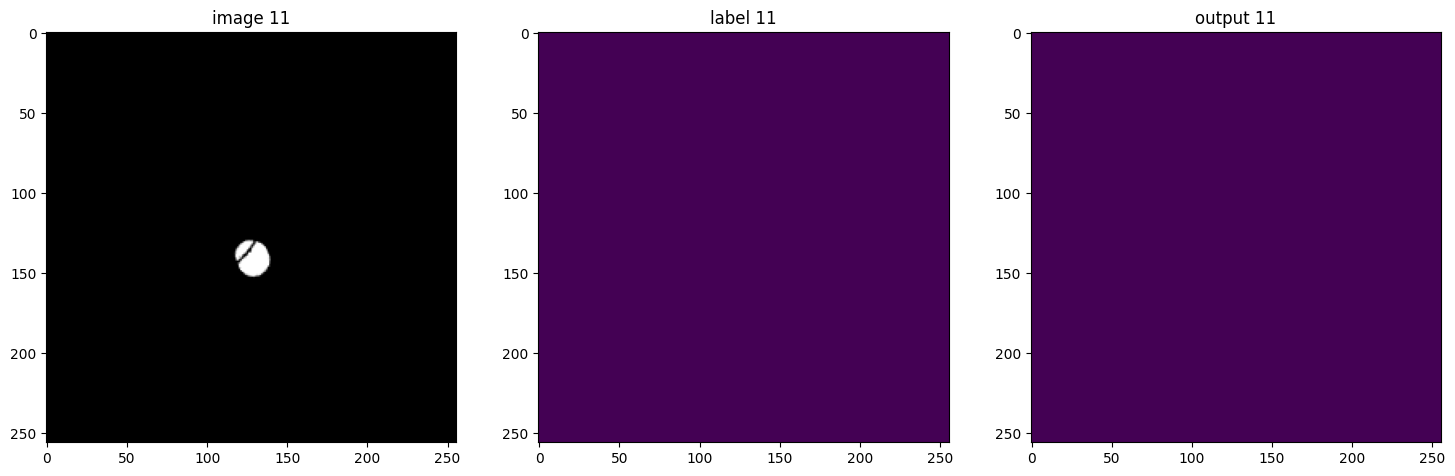

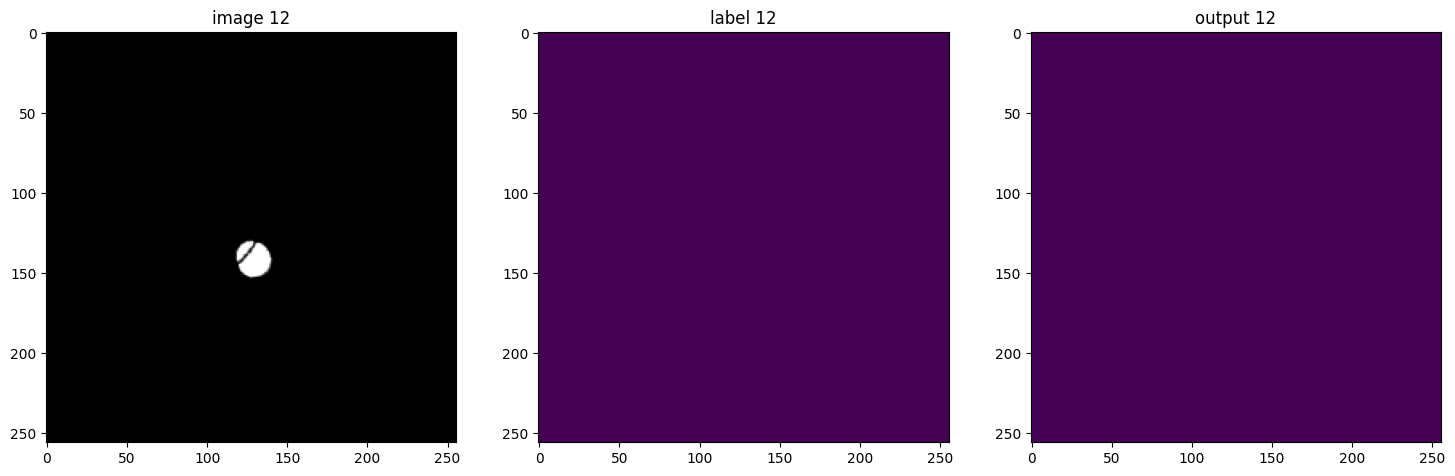

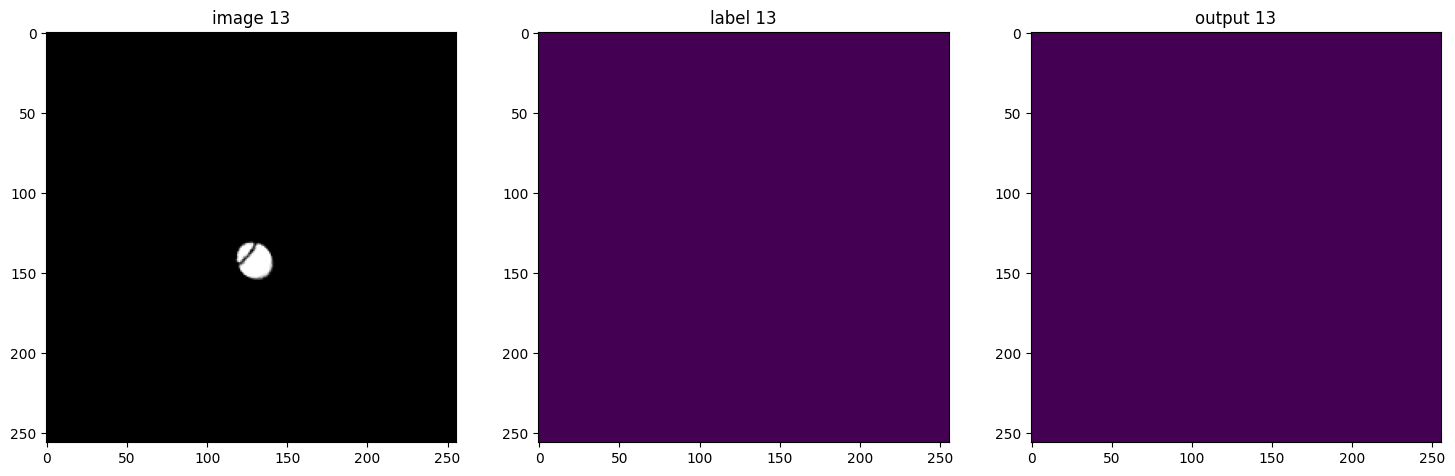

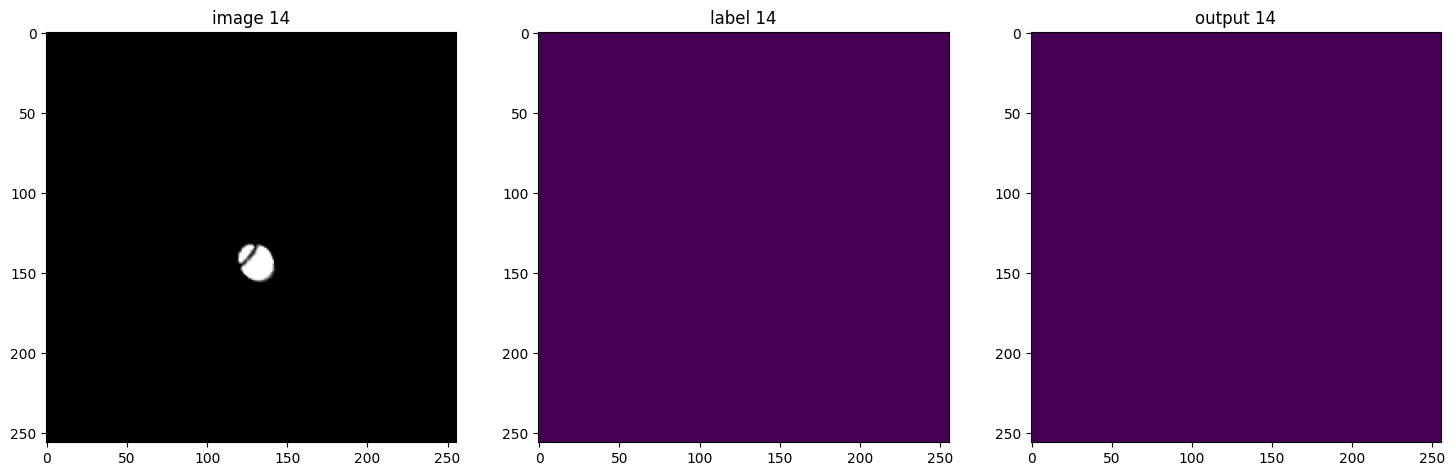

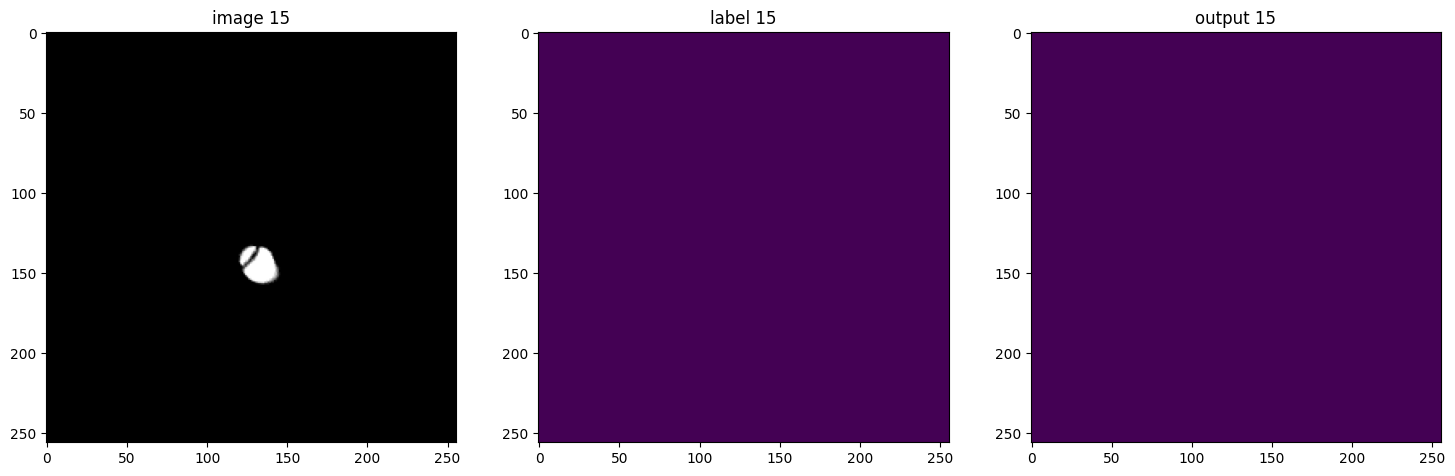

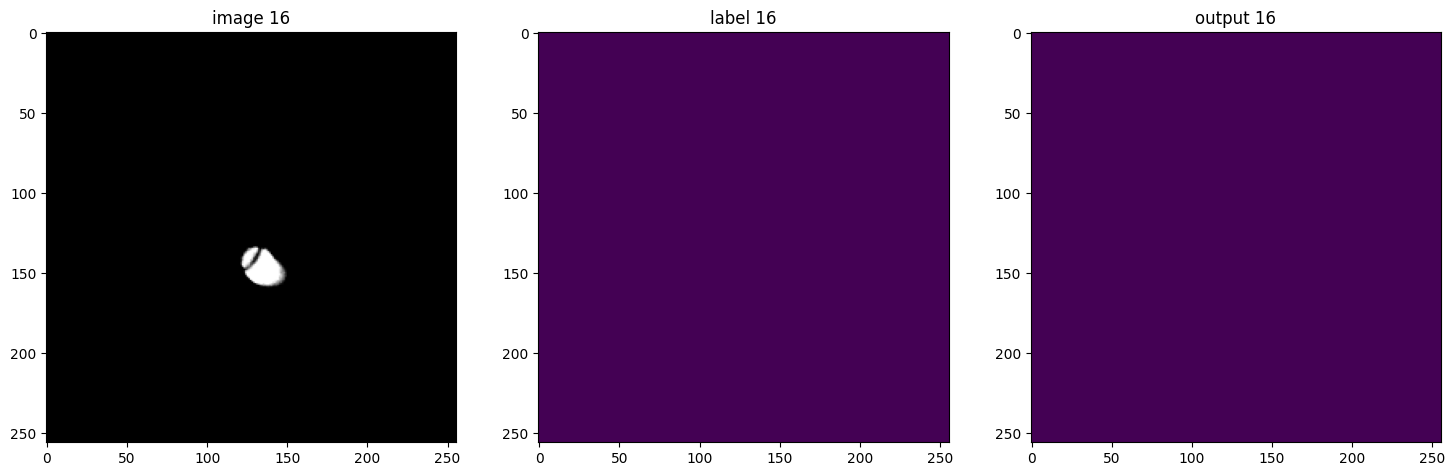

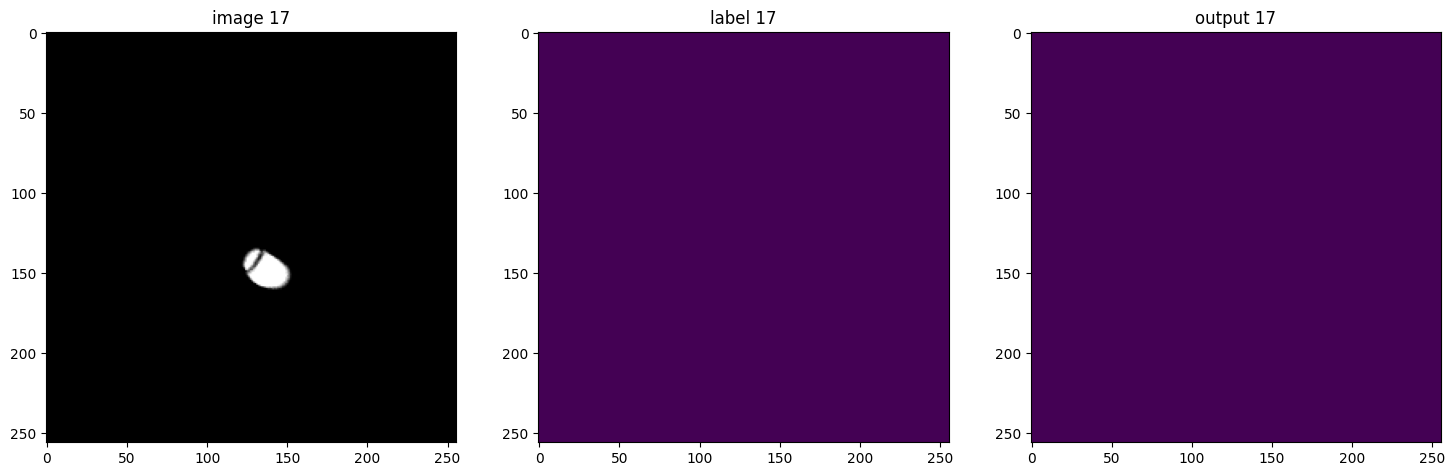

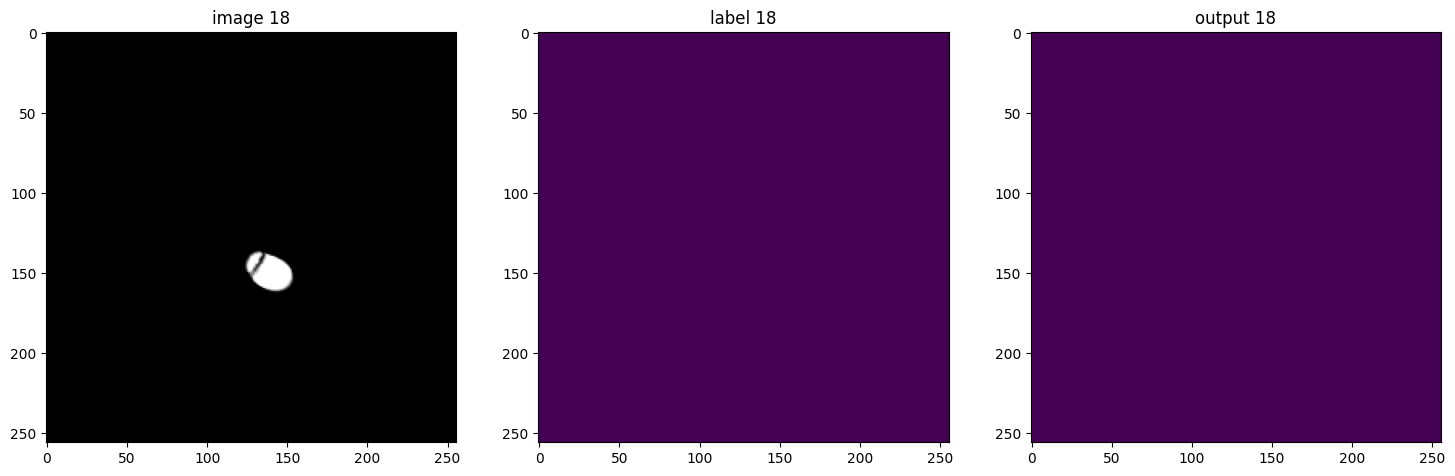

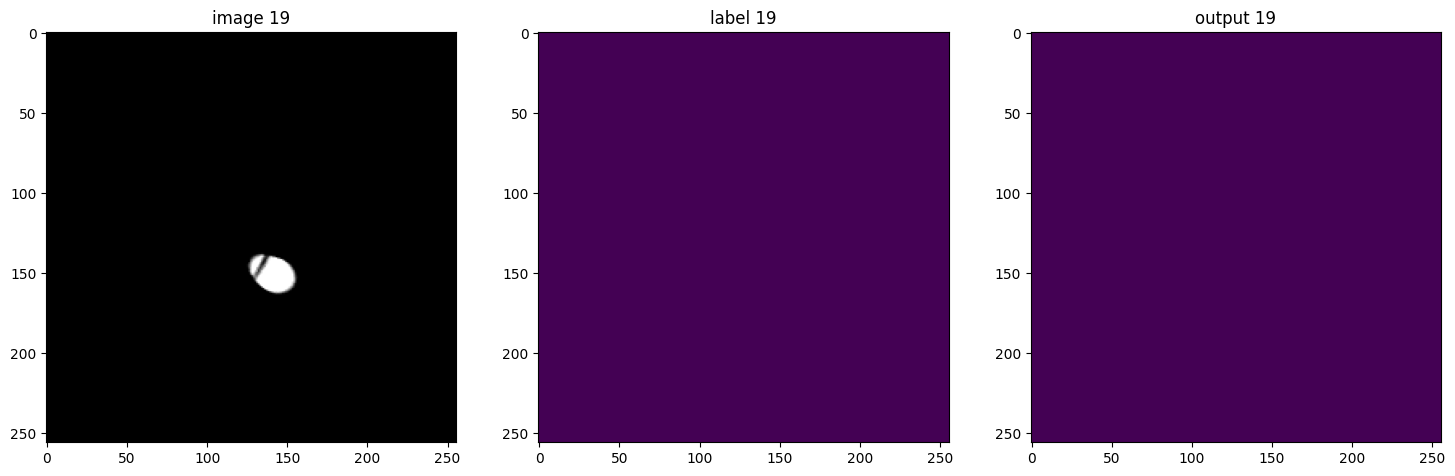

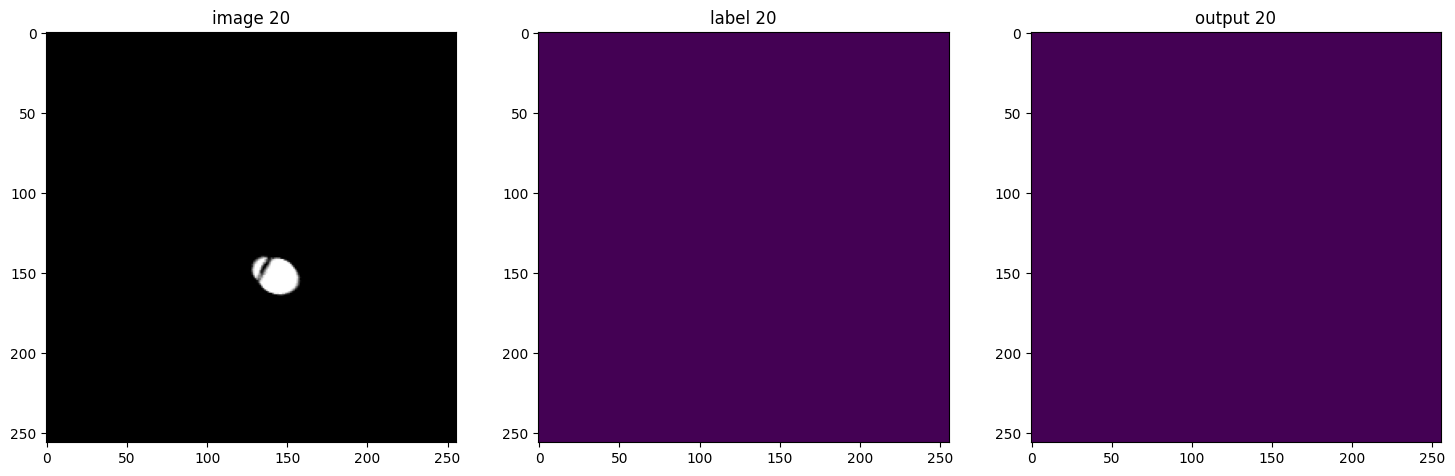

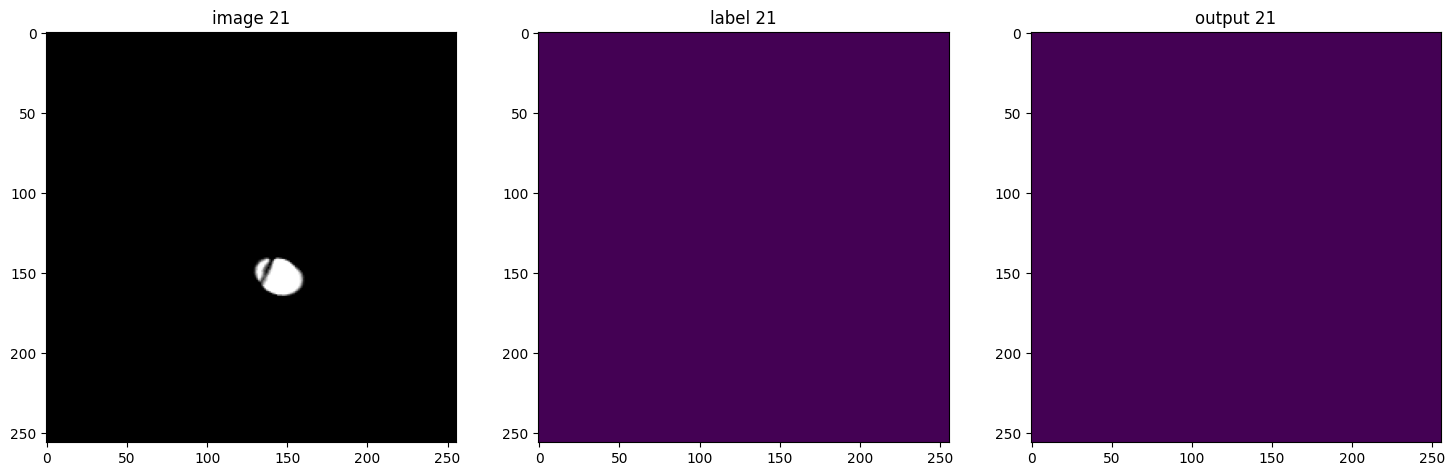

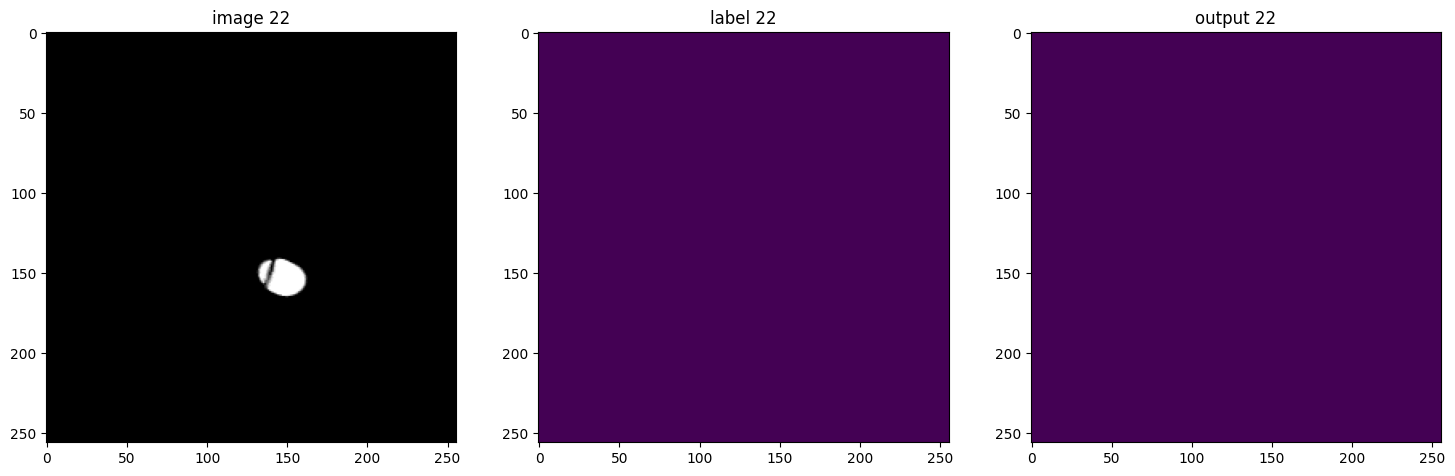

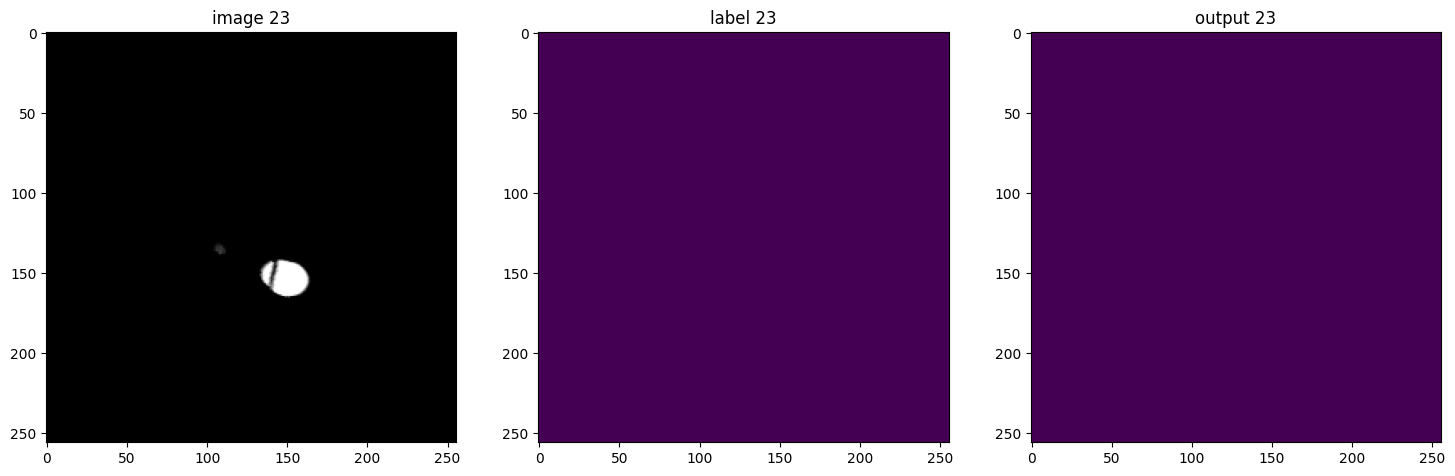

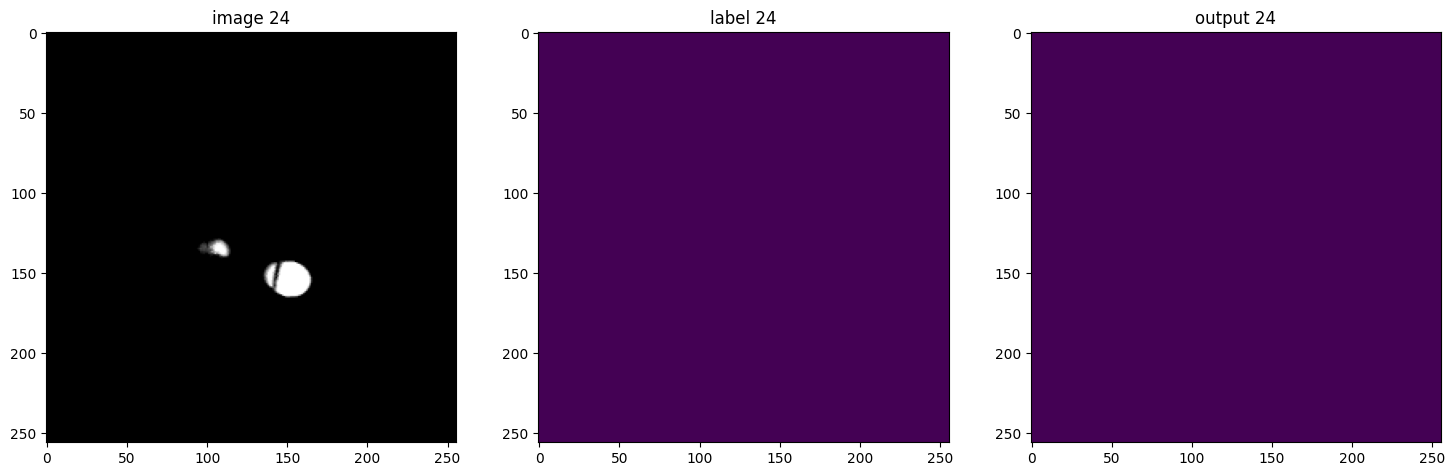

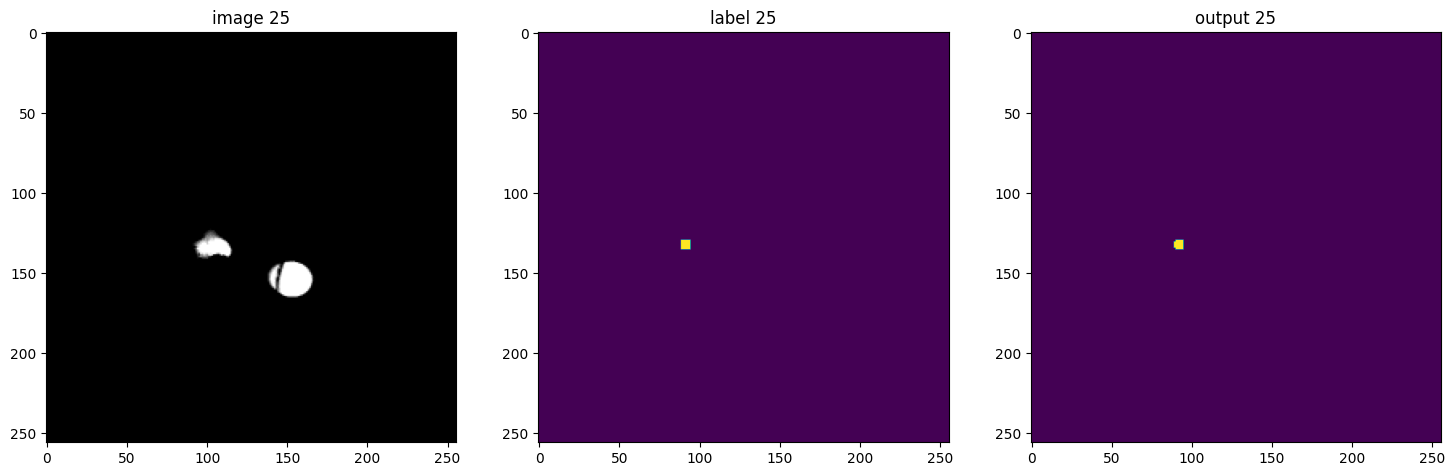

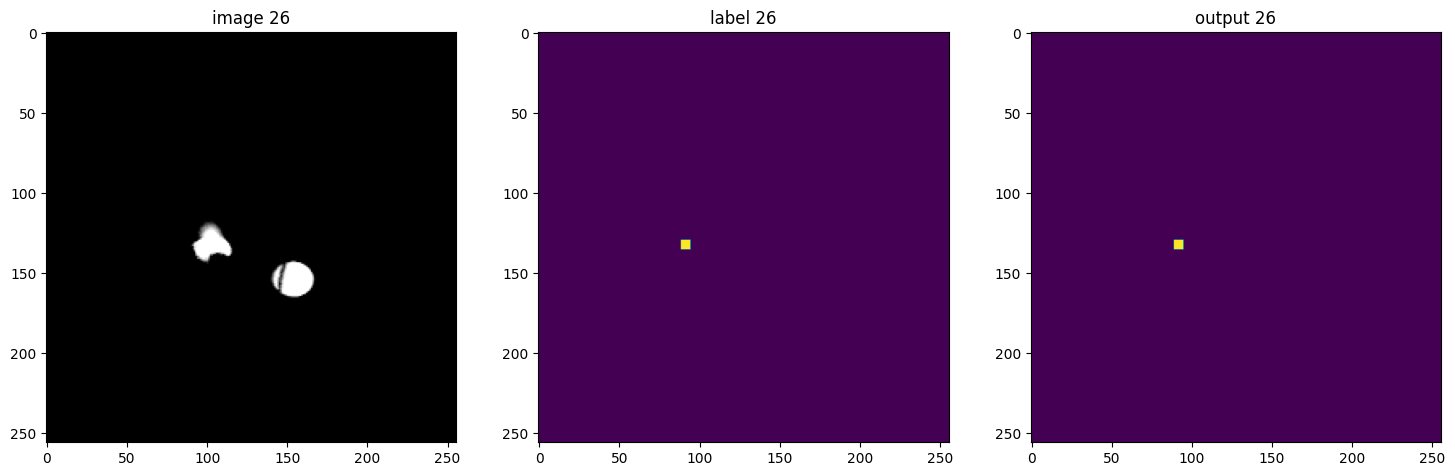

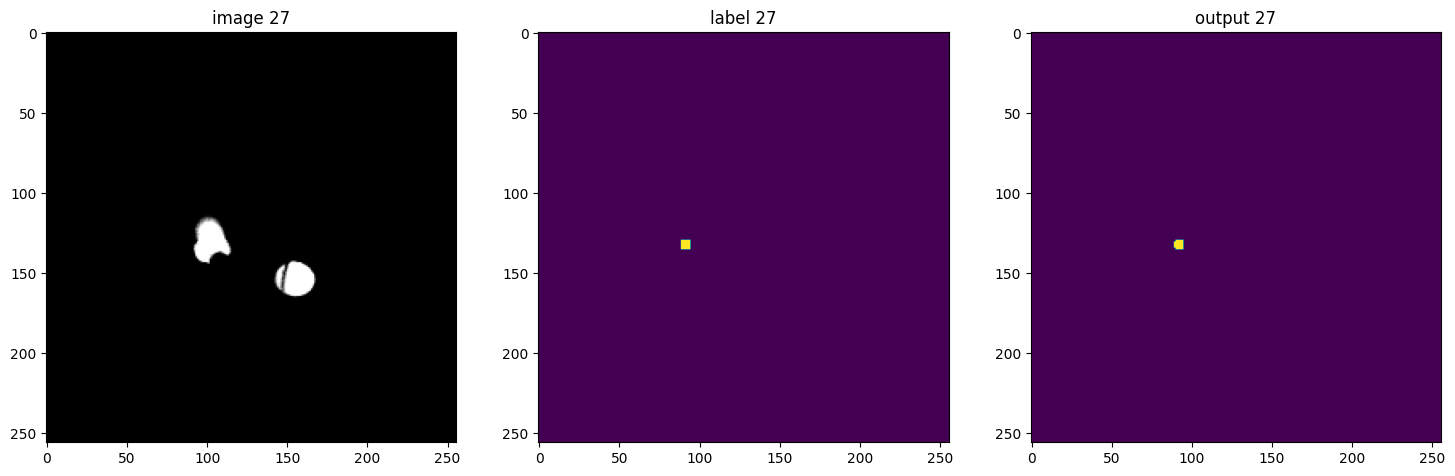

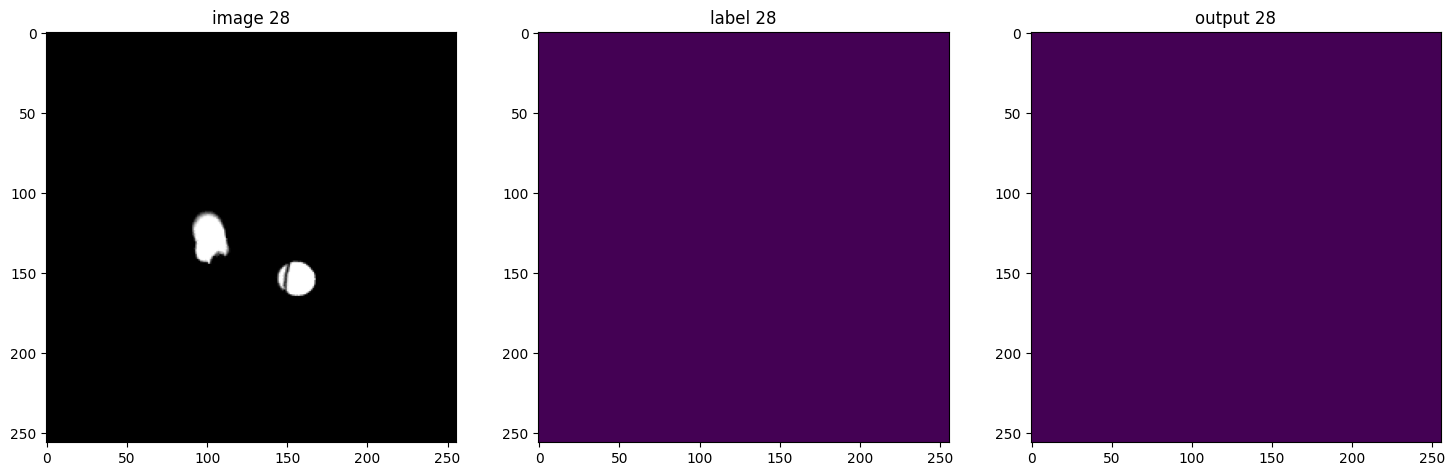

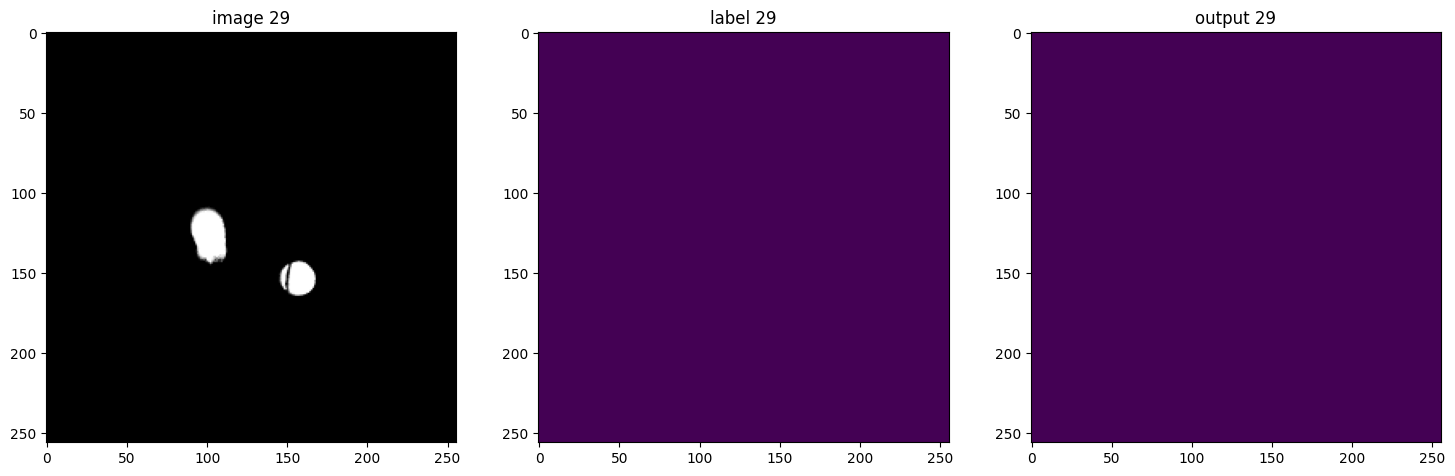

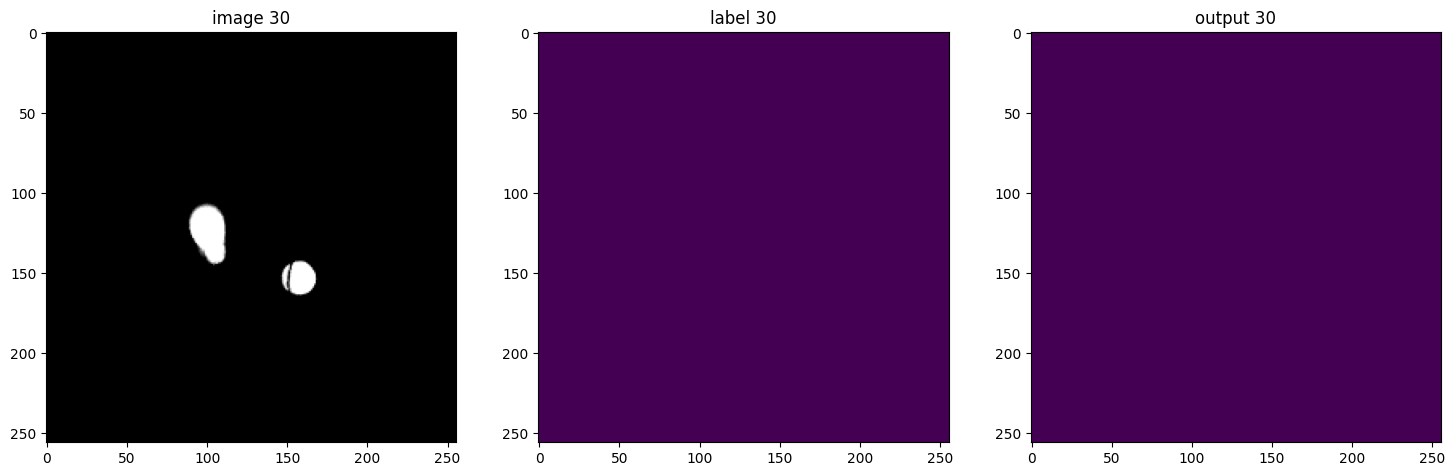

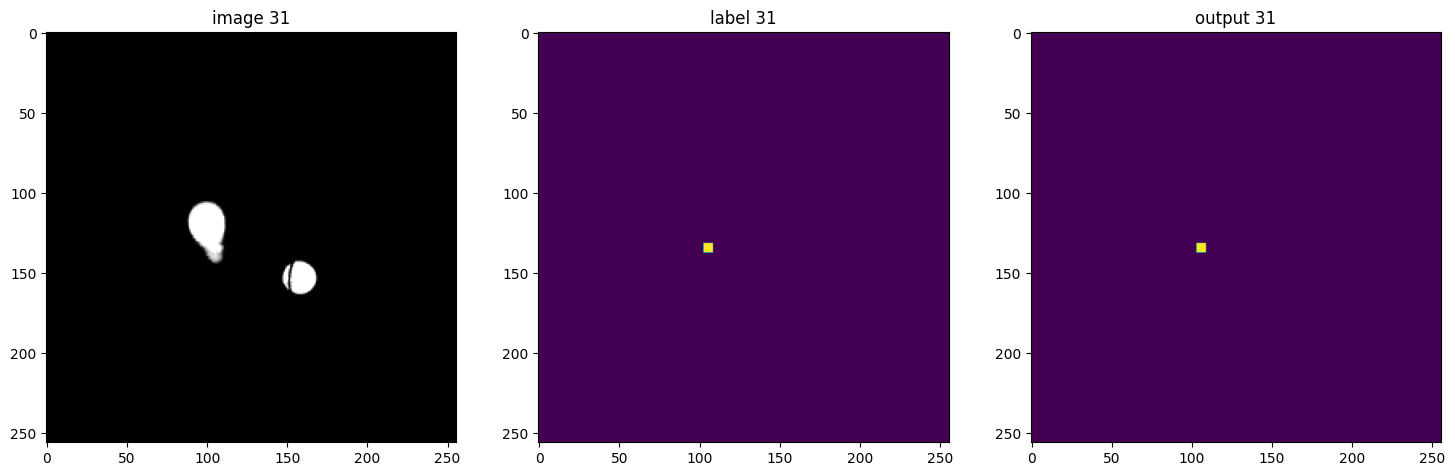

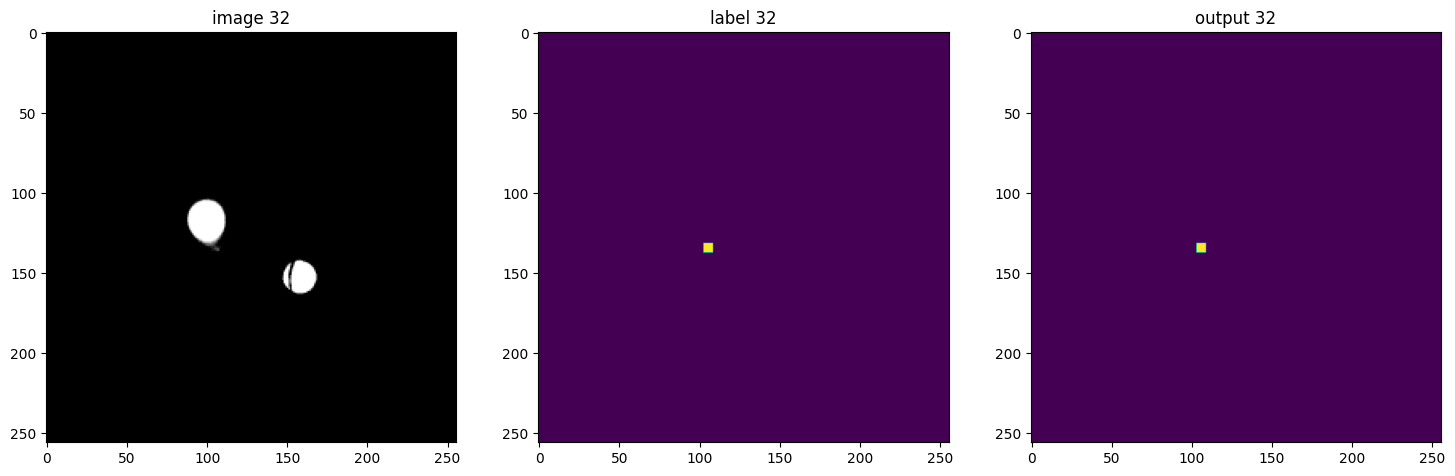

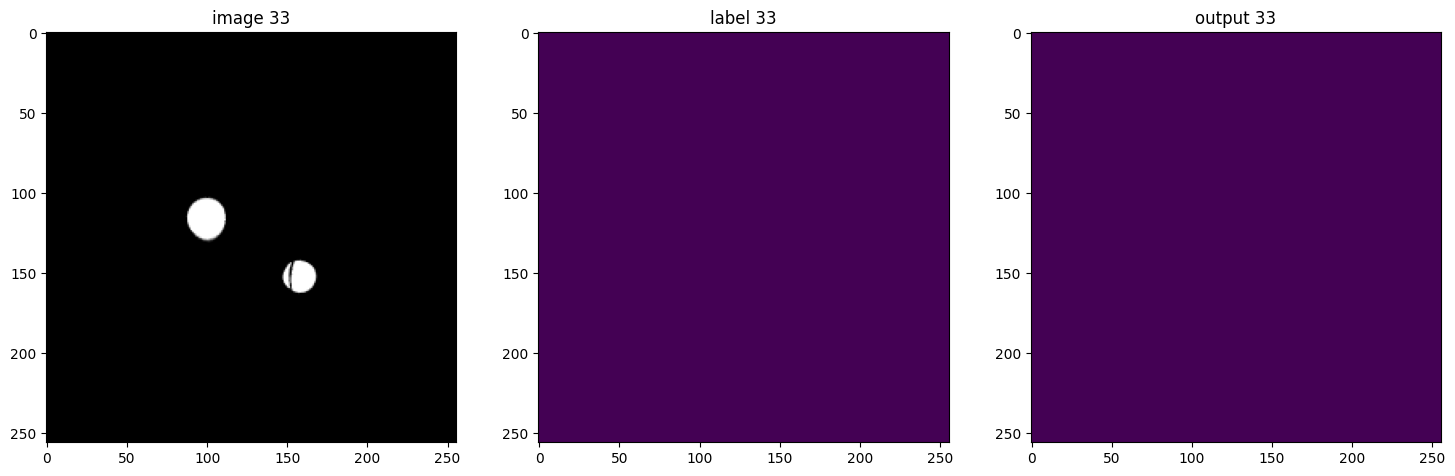

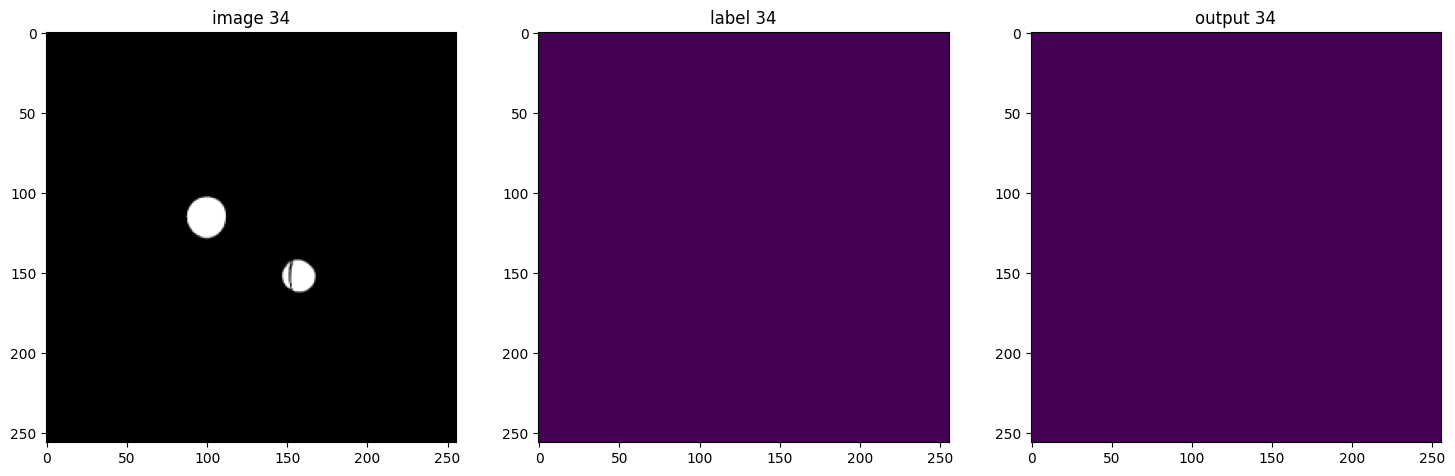

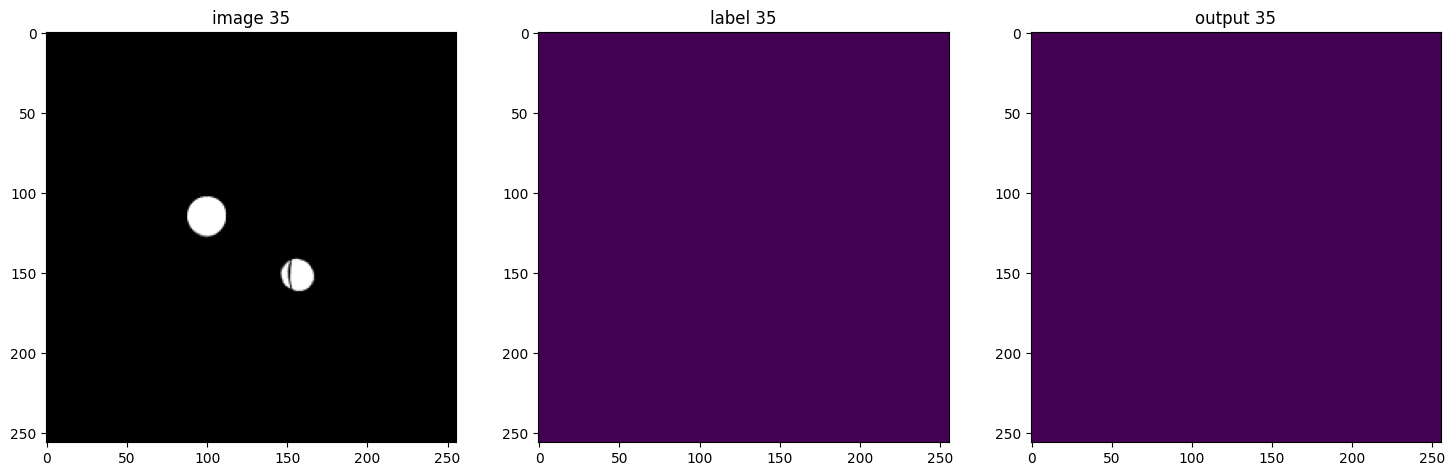

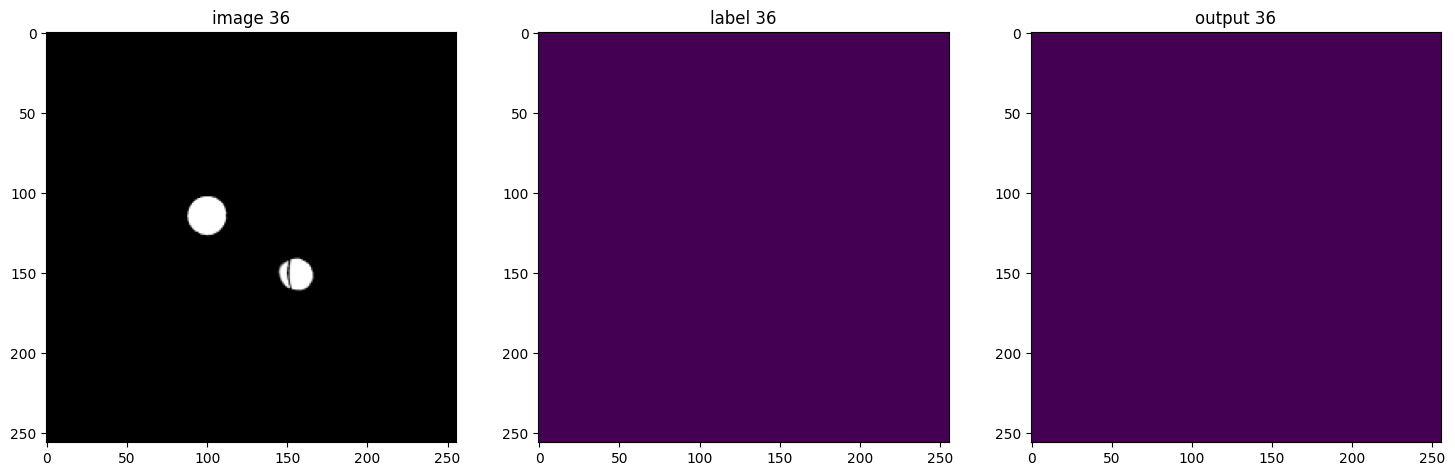

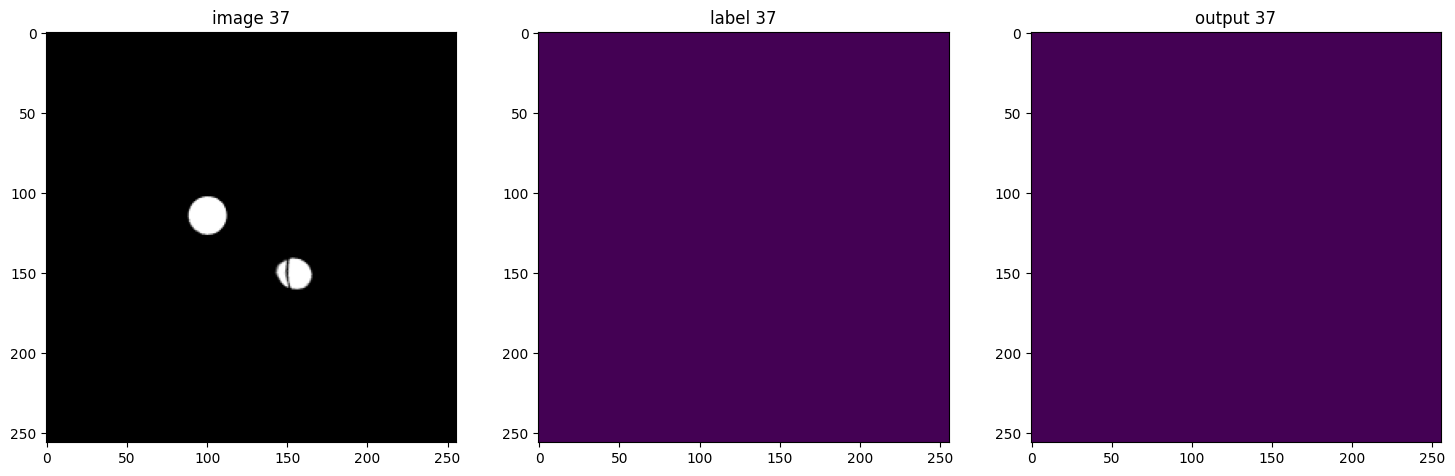

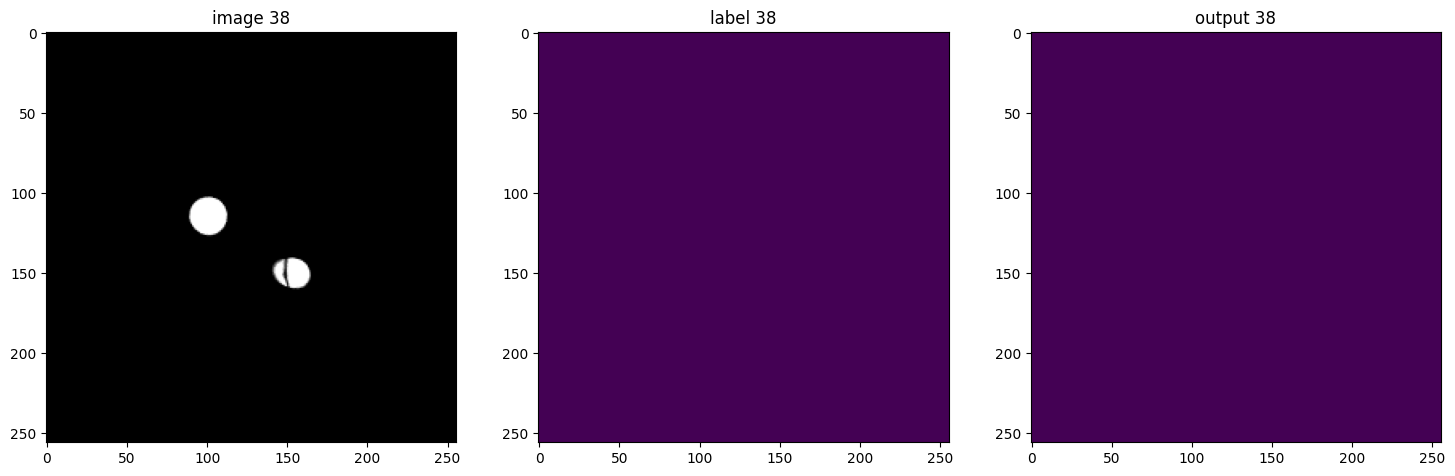

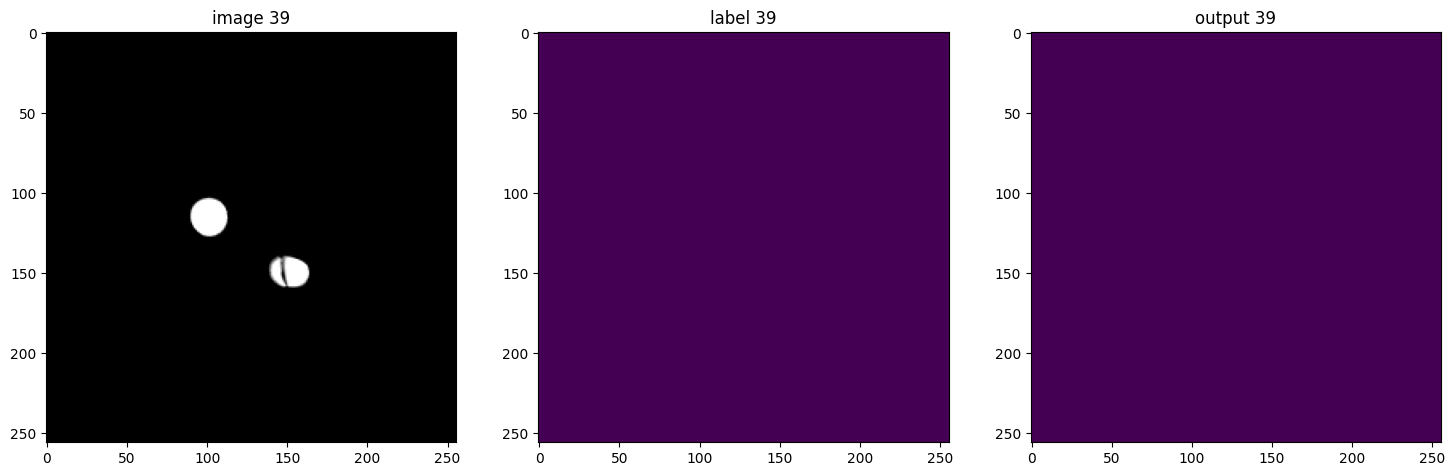

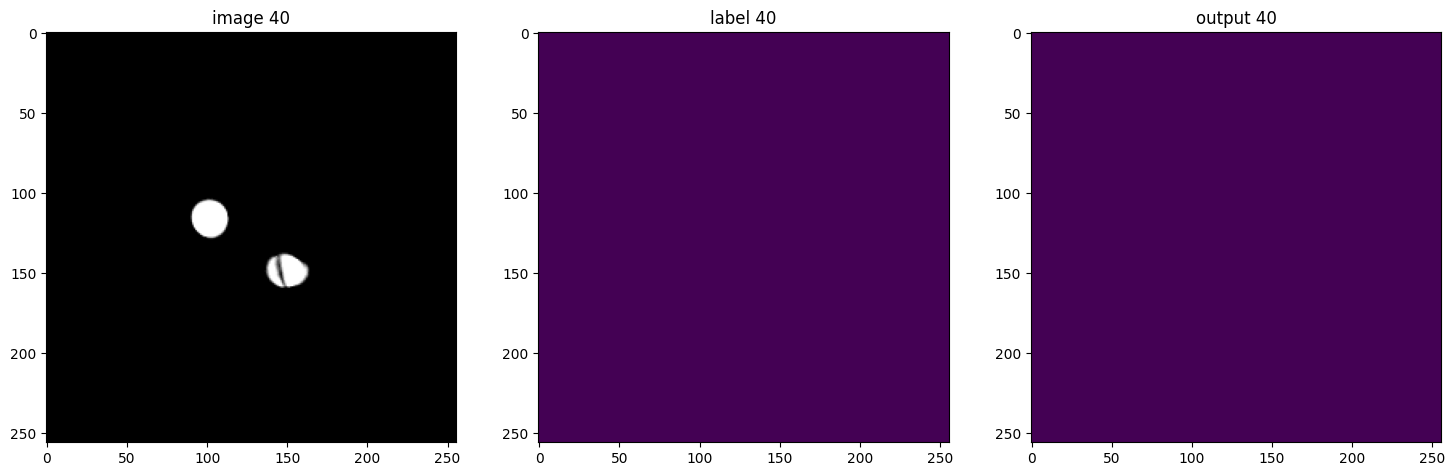

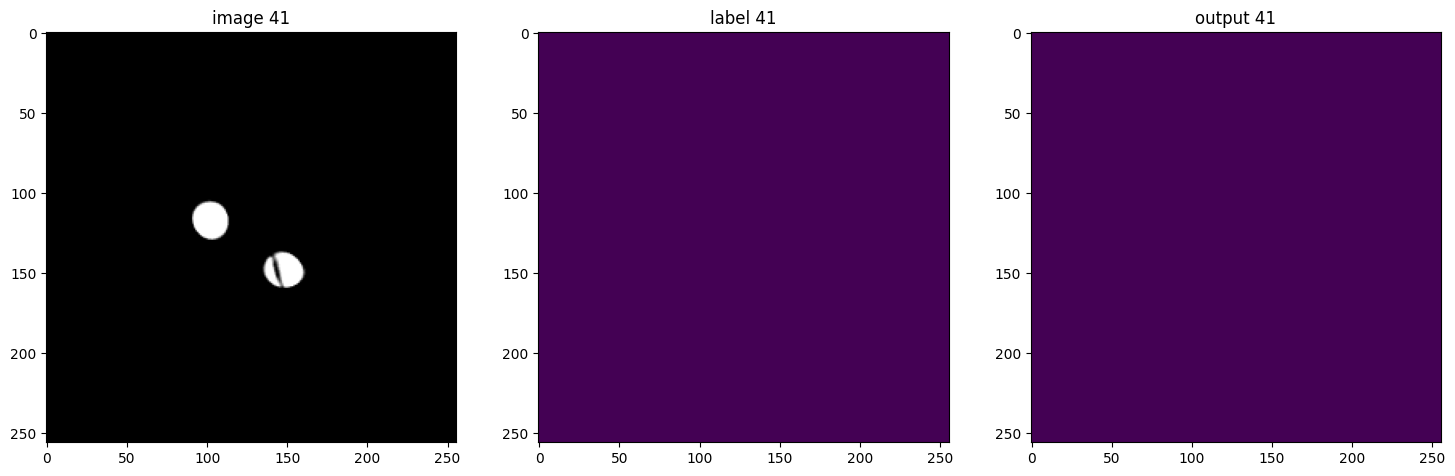

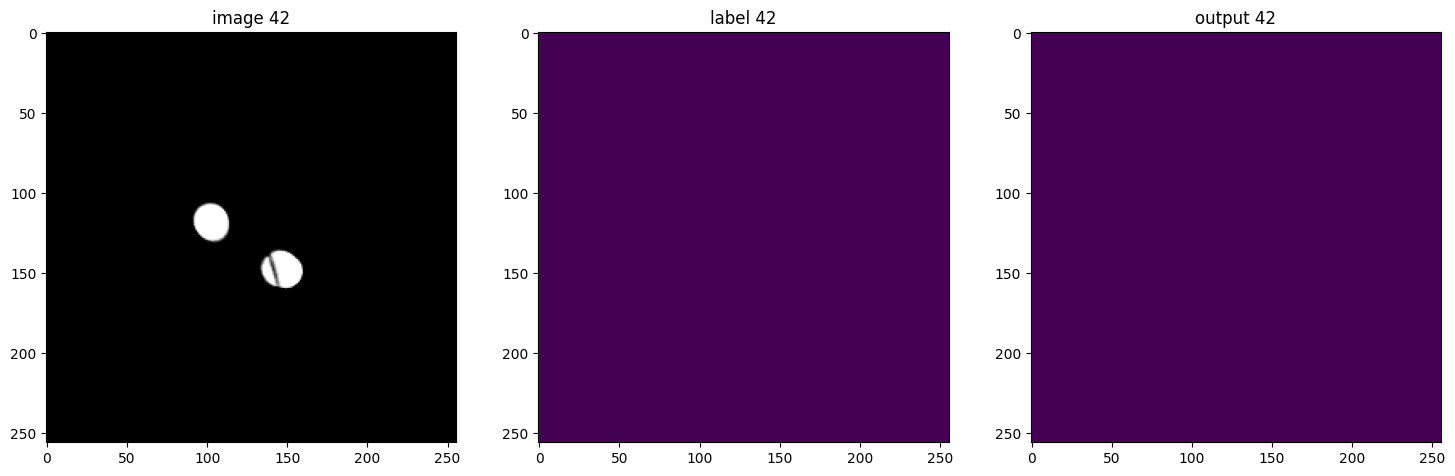

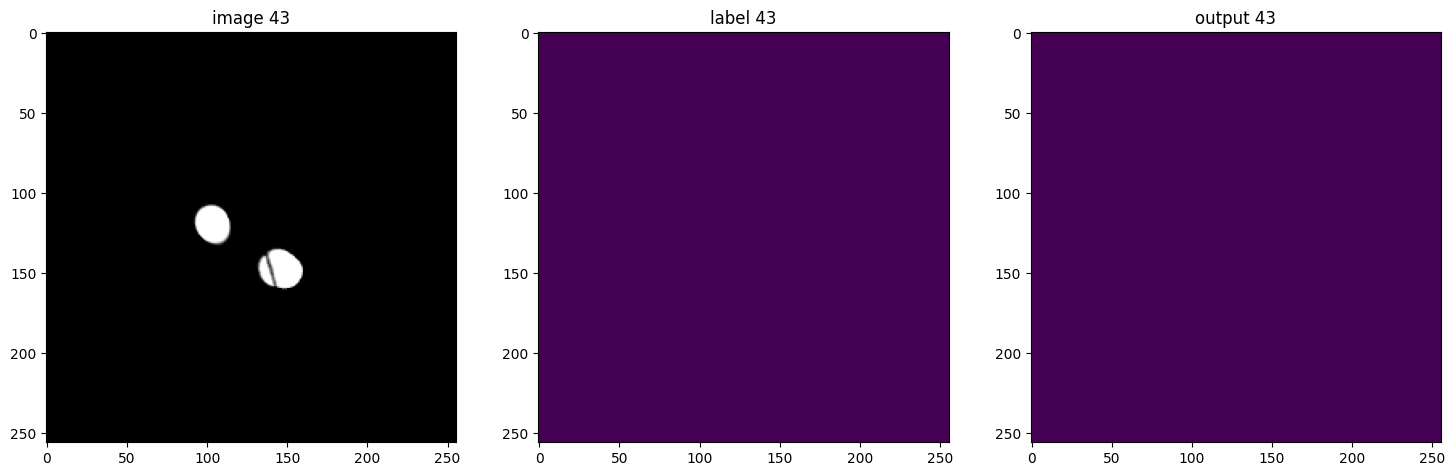

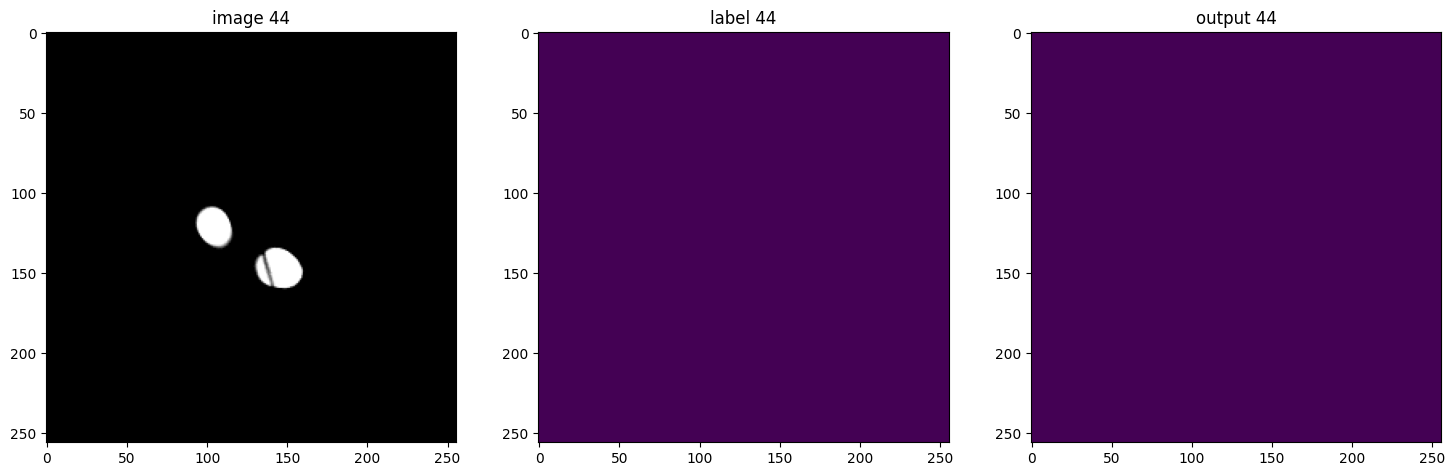

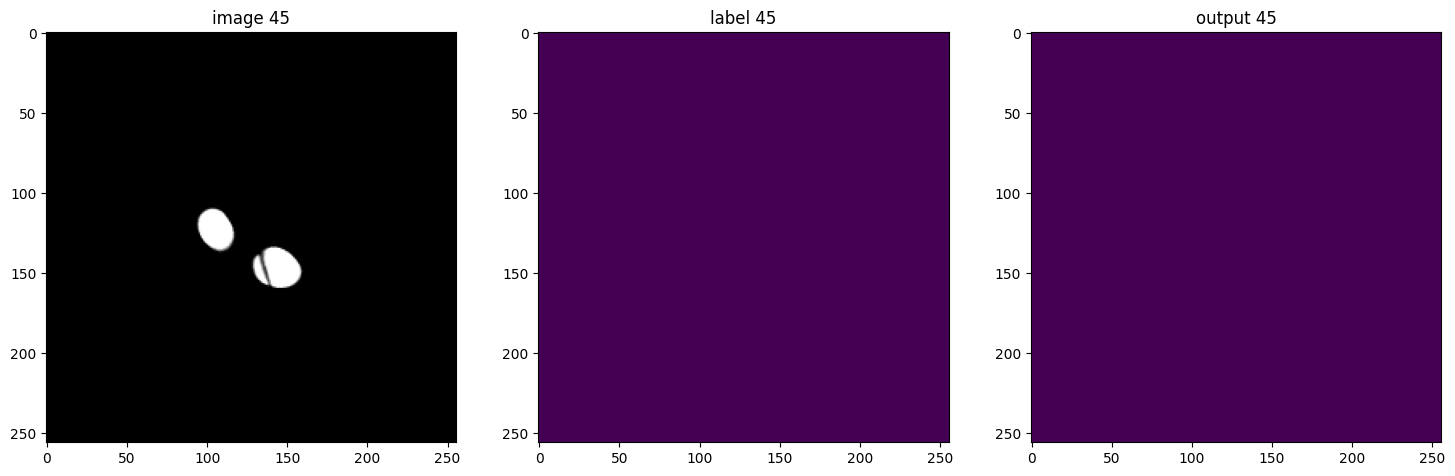

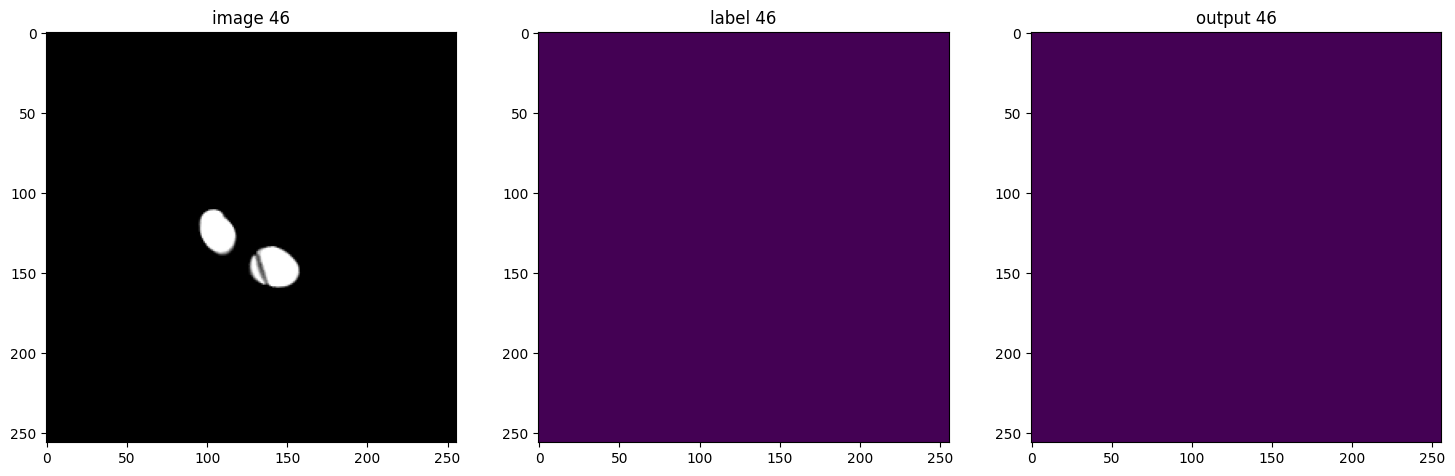

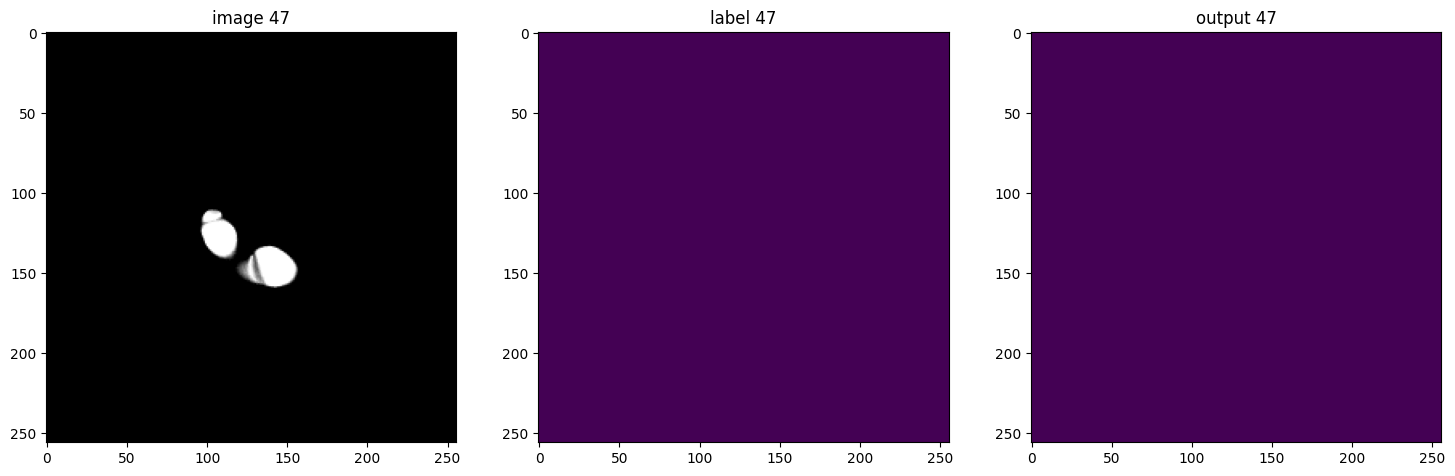

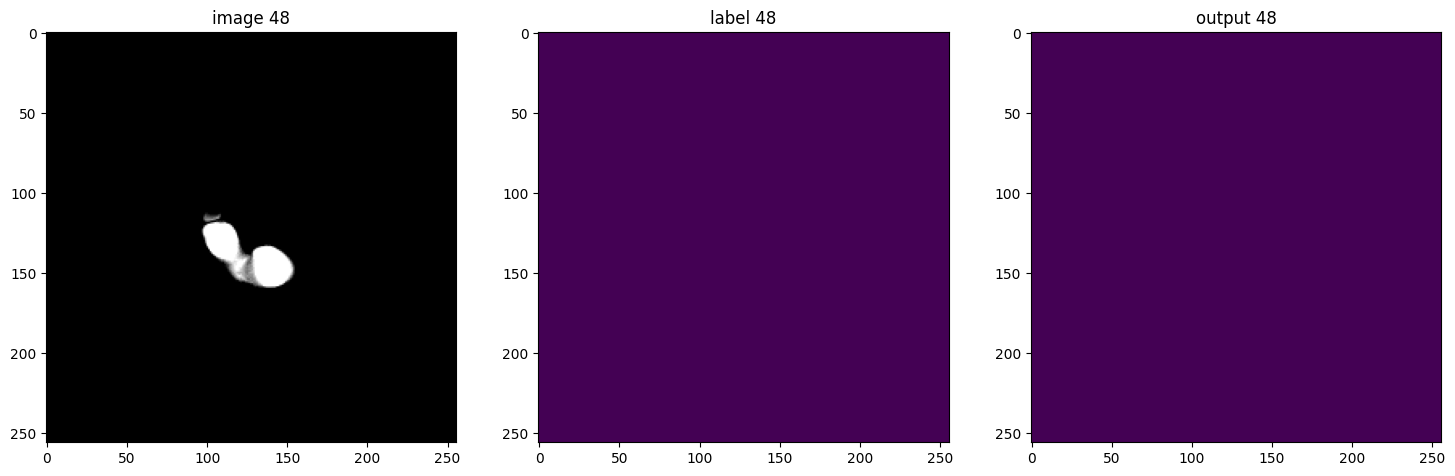

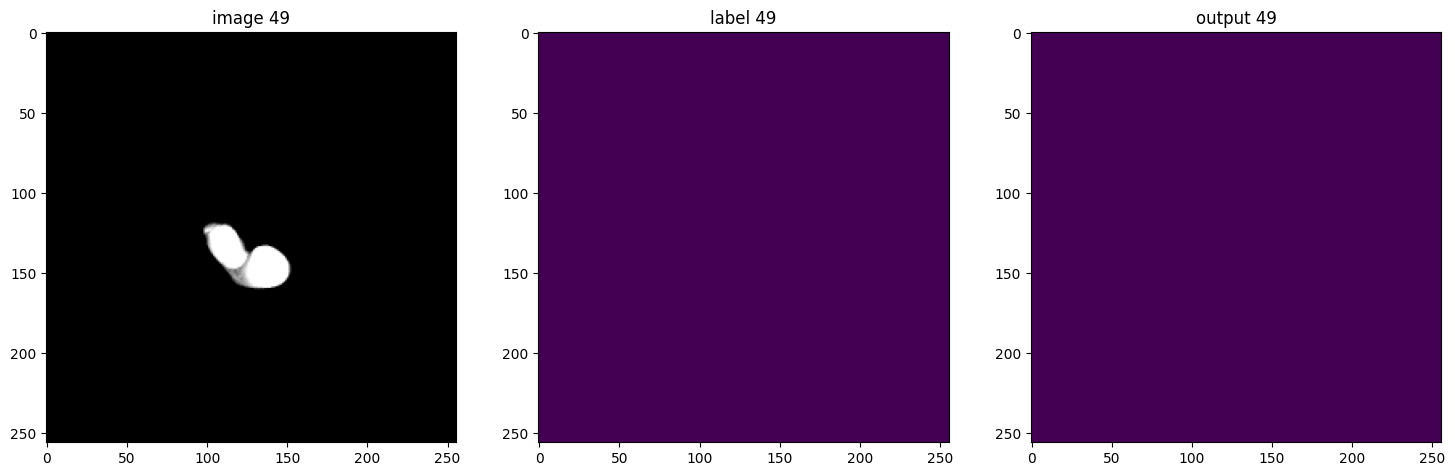

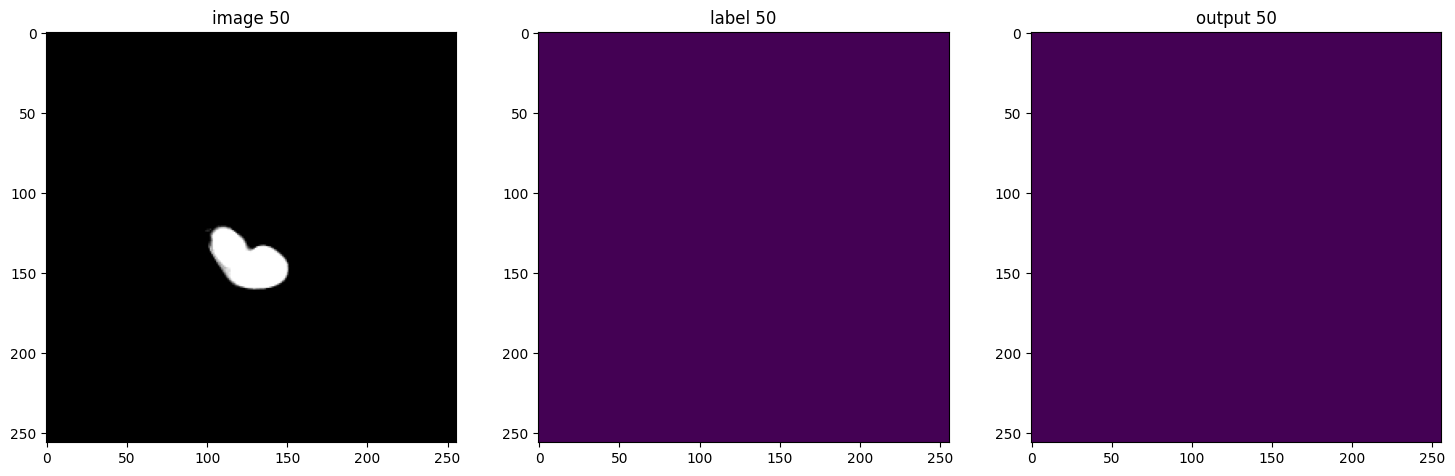

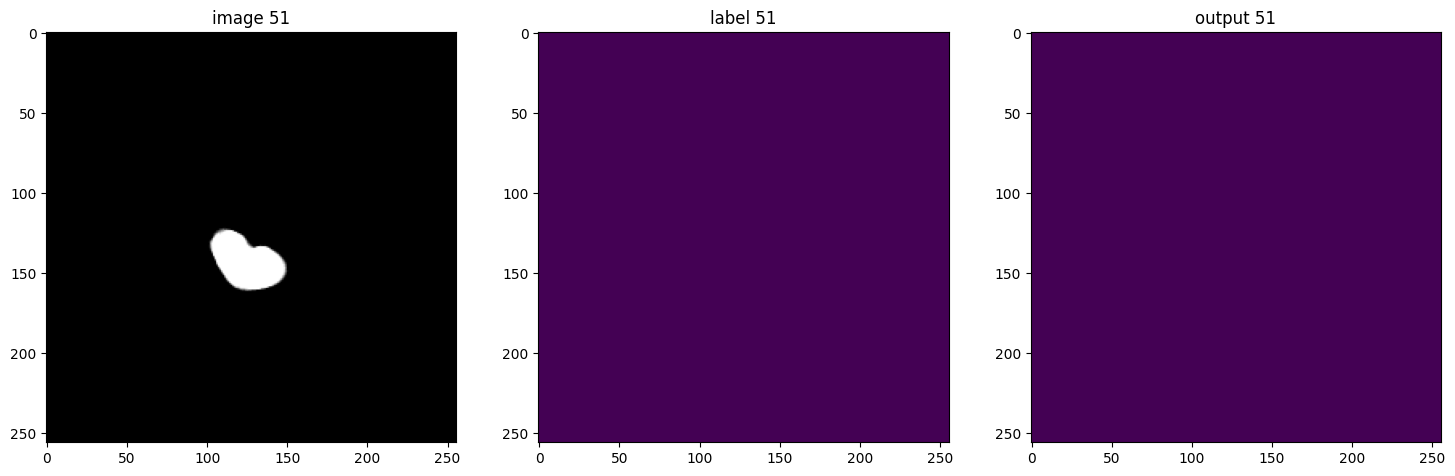

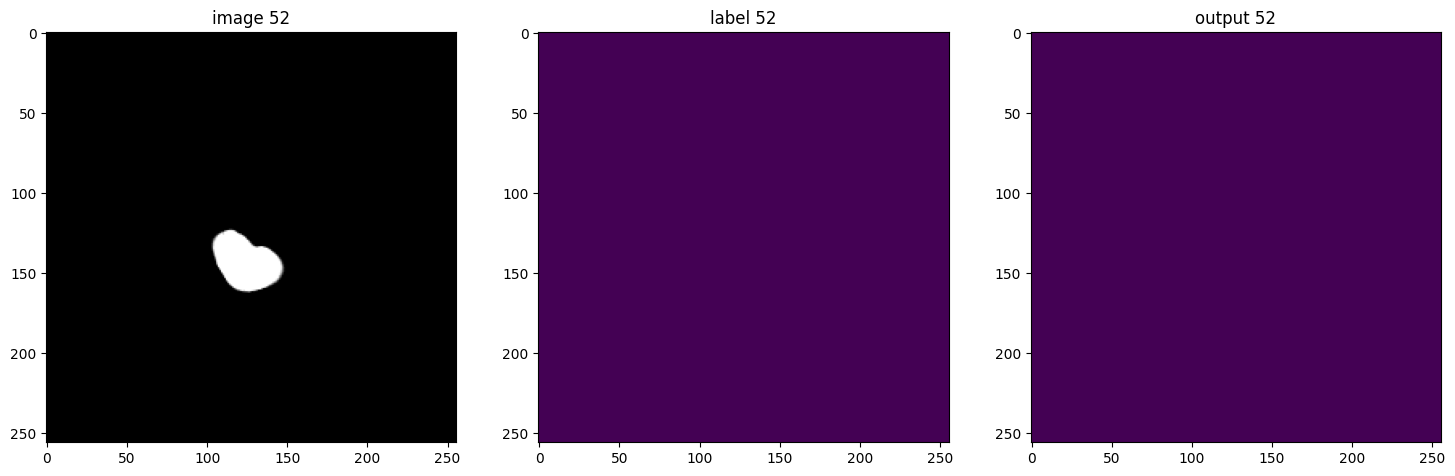

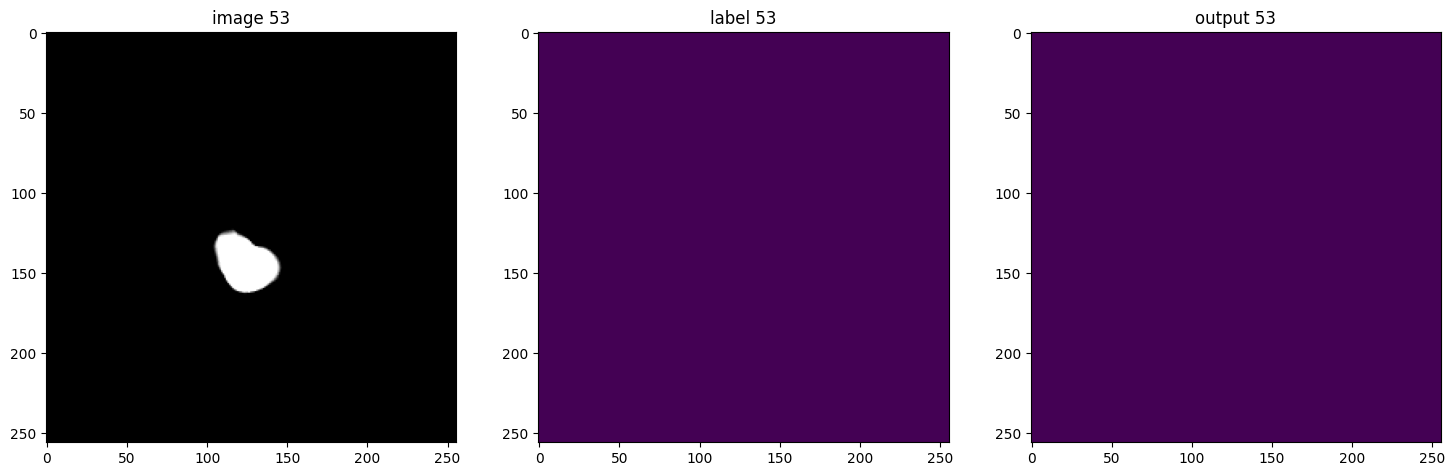

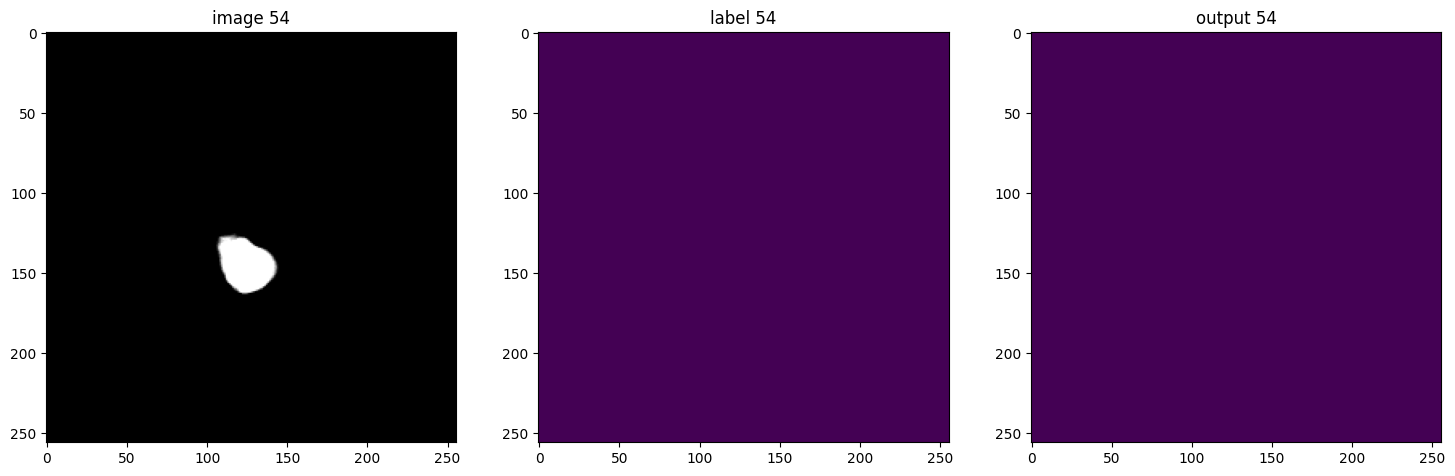

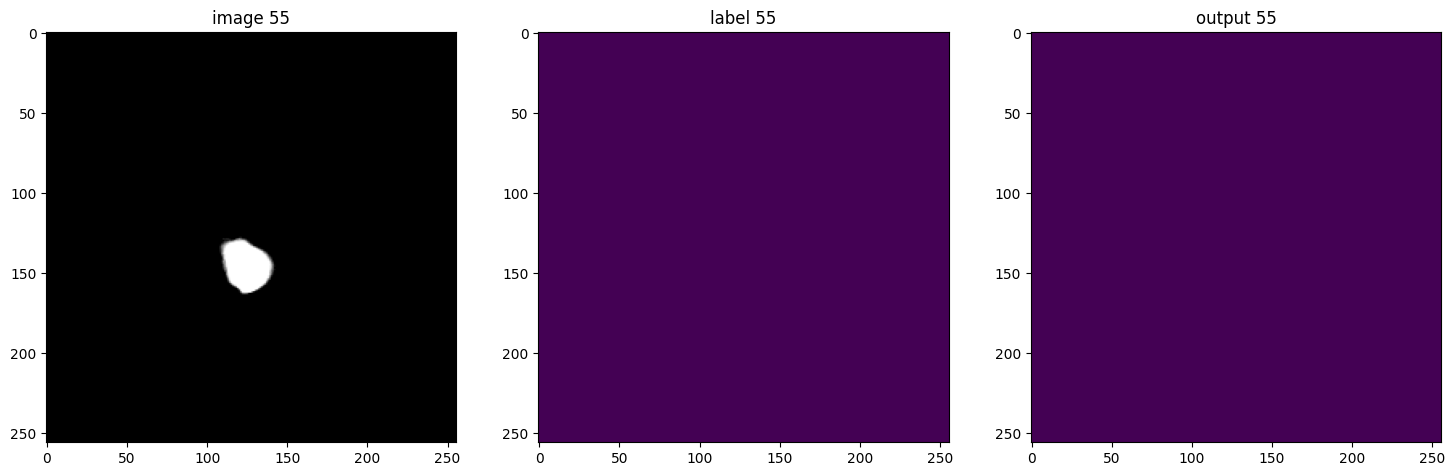

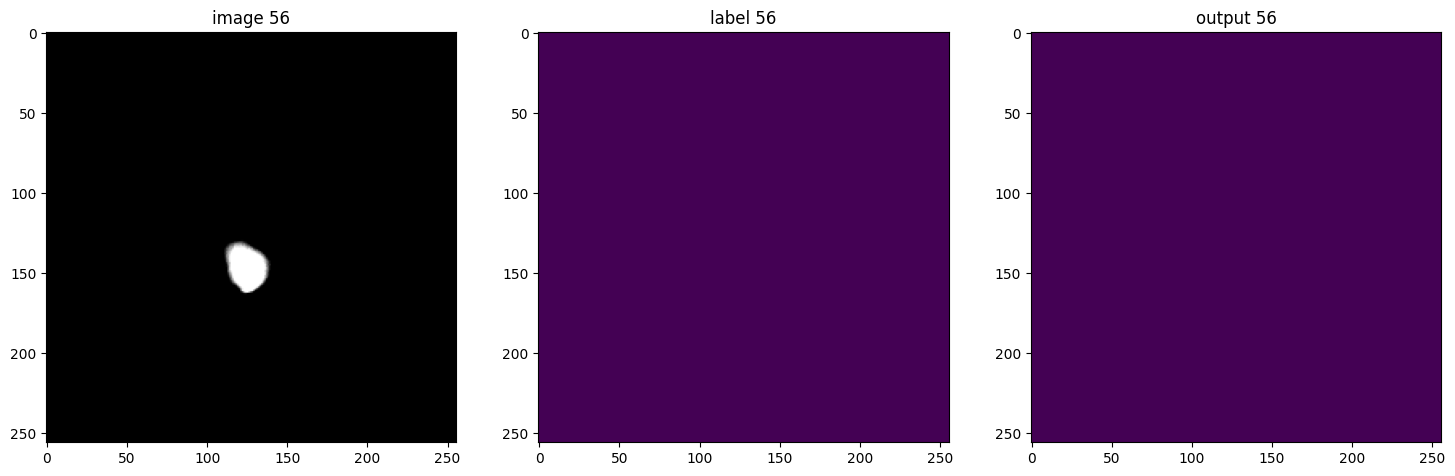

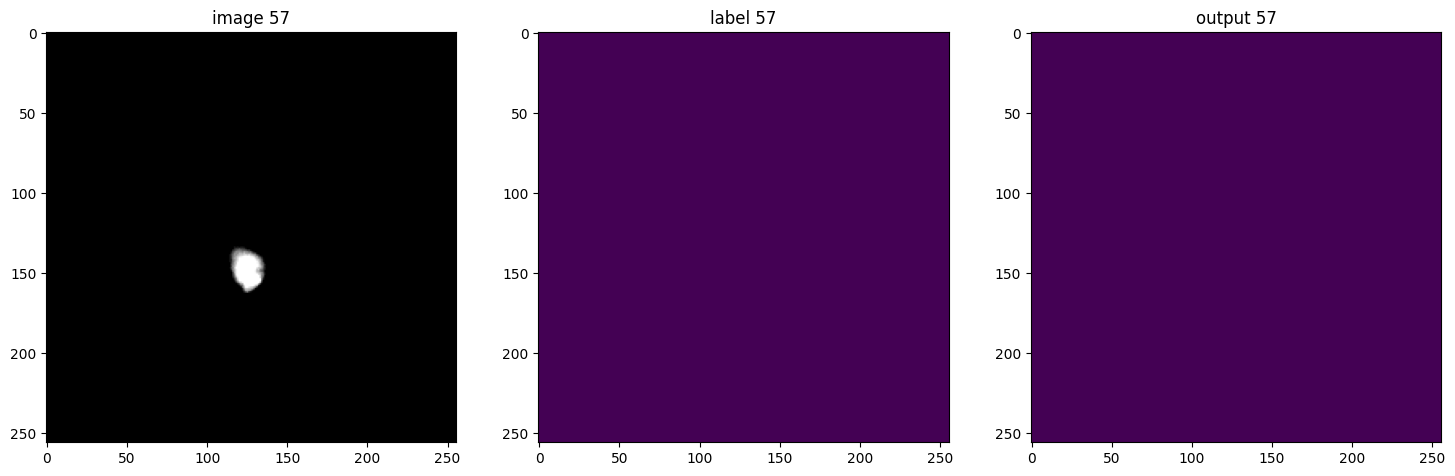

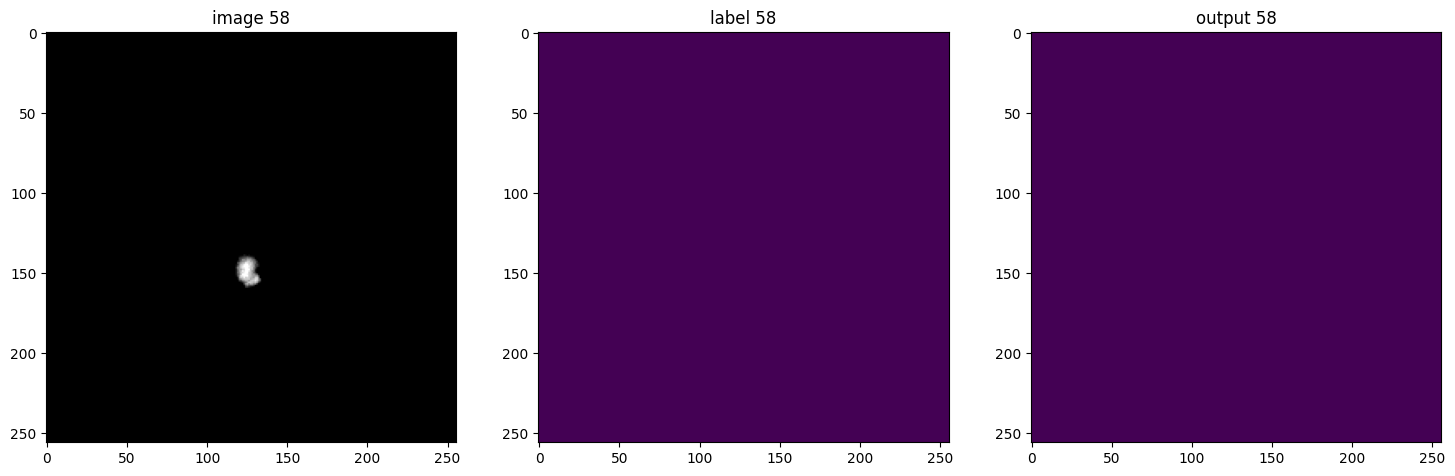

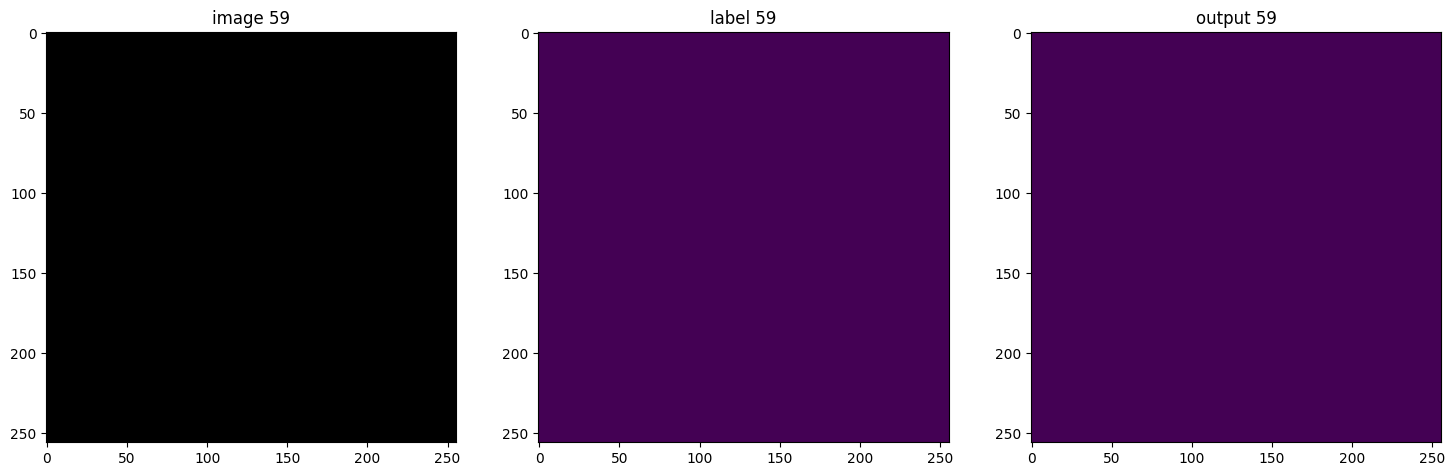

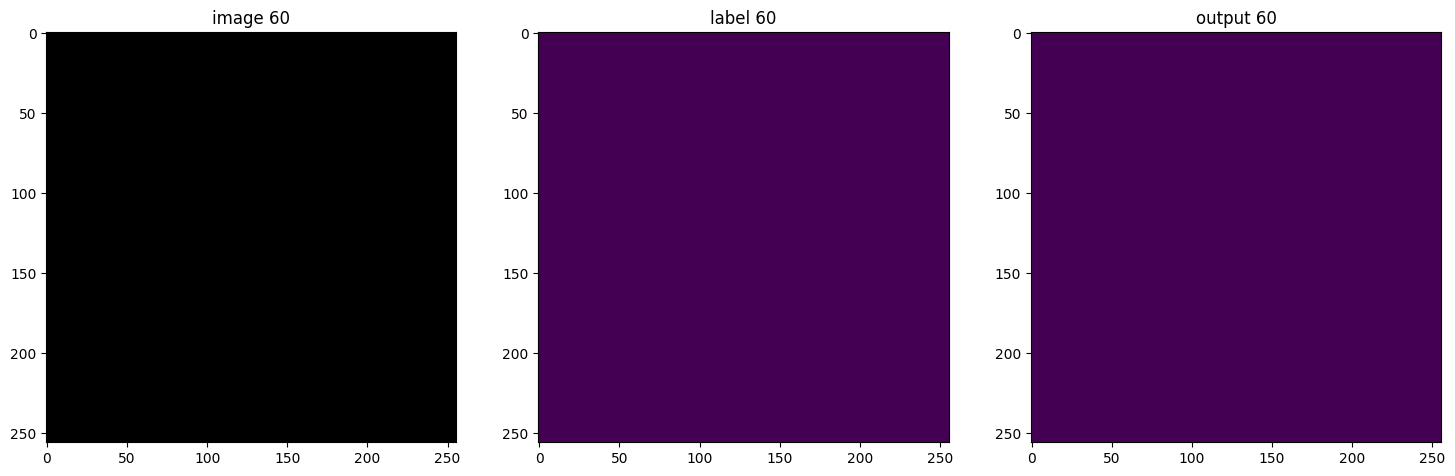

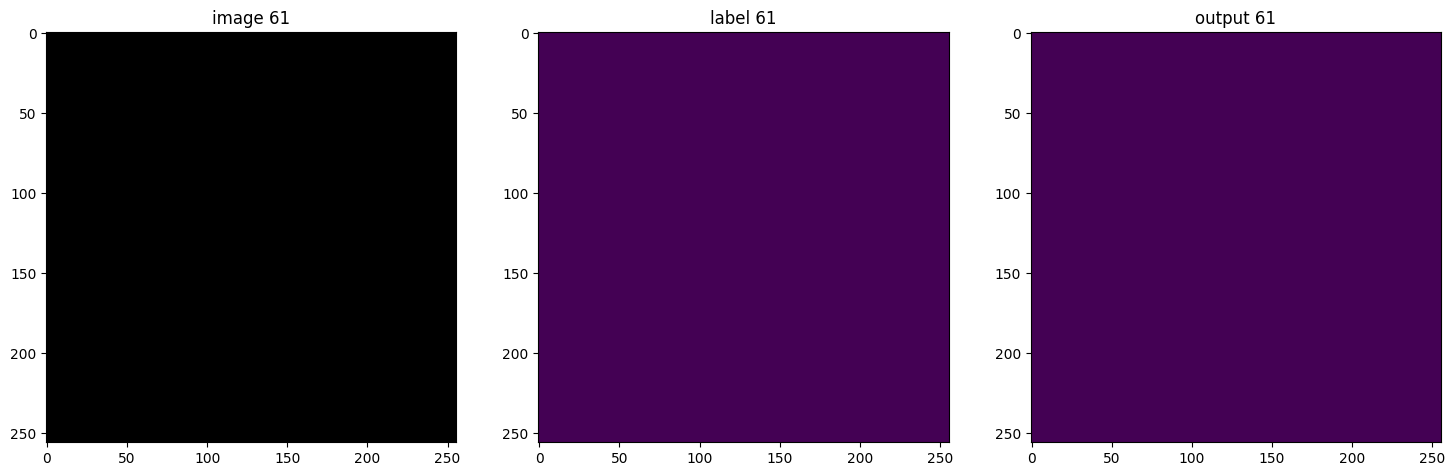

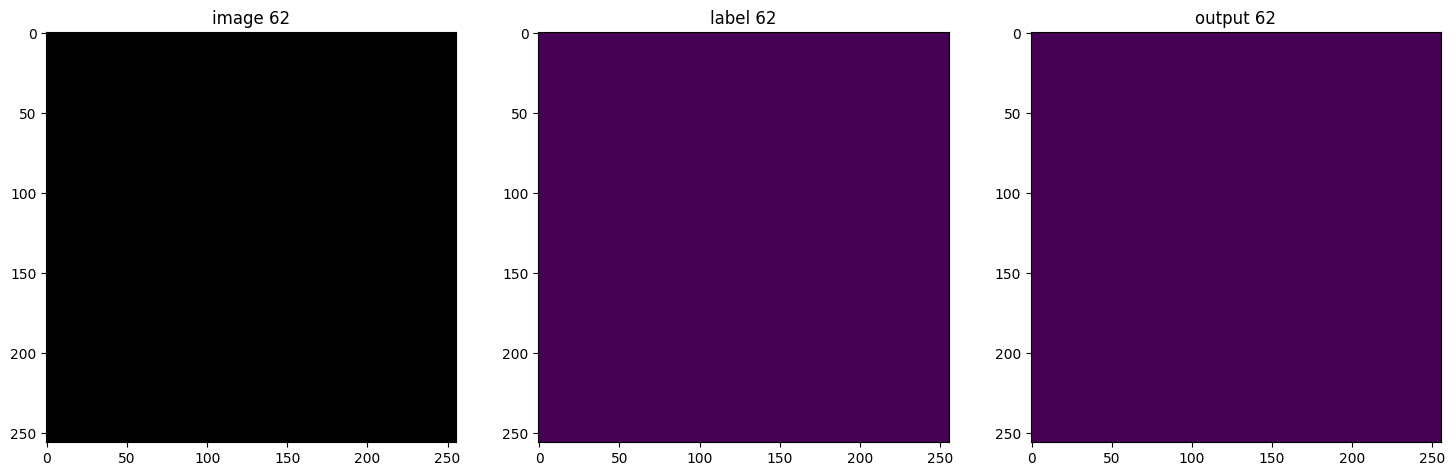

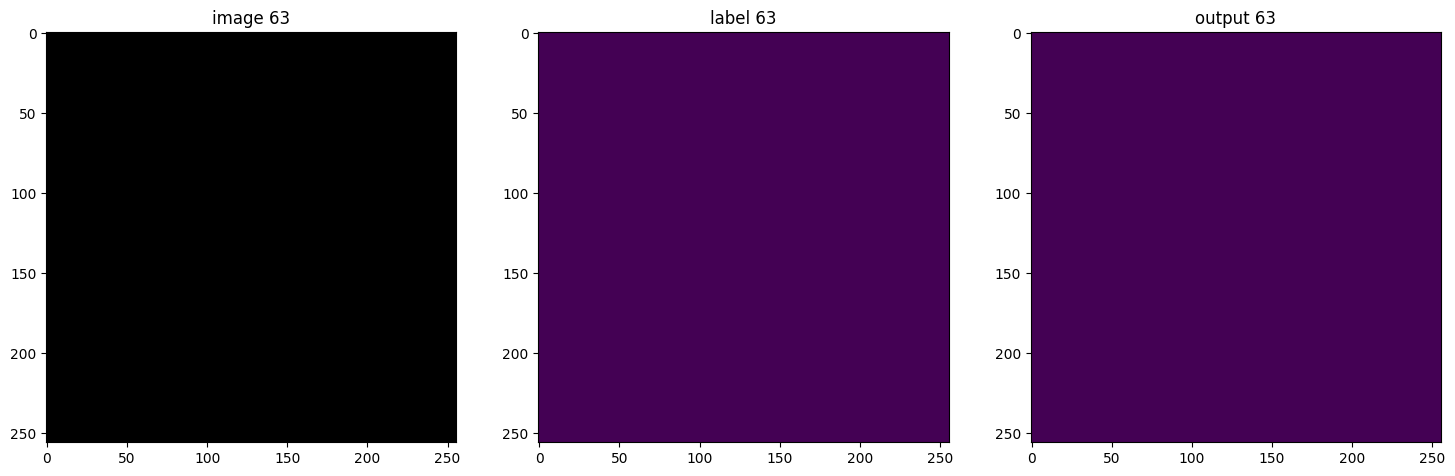

In [25]:
sw_batch_size = 4
roi_size = (256, 256, 64)
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['vol']

    test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.7
# adjust range according to third dimension of the roi_size
    for i in range(64):
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
        ## Save image
        plt.savefig(f"{path}/{i}.png")
        plt.show()